# Tabu Search

We will be implementing our second meta-heuristic algorithm for the Travelling Salesman Problem (TSP) called Tabu Search. This algorithm is memory-based and is an iterative approach to the problem which works by removing components and marking them as Tabu as it iterates over the solution thus creating a neighbourhood which is restricted to only use non-tabu components.



Pseudocode: (Tabu Search)

Algorithm - Tabu Search
Input: TabuList Size
Output: Sbest (Shortest cycle path)


1.  TabuList = ∅
2.  while (stopCondition())
3.    candidateList ← ∅
4.    for (Scandidate ∈ Sbestneighbourhood)
5.     if (containsAnyFeatures(Scandidate, TabuList))
6.       candidateList ← Scandidate
7.     end if
8.  end while
9.  Scandidate ← LocateBestCandidate(candidateList)
10. if(Cost(Scandidate)≤ Cost(Sbest))
11.  Sbest ← Scandidate
12.  TabuList ← FeatureDifferences(Scandidate, Sbest)
13.  while(TabuList > TabuListsize)
14.    DeleteFeature(TabuList)
15.  end while
16. end if
17. Return (Sbest)

(Brownlee, 2015)


References:

http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html (Accessed 26th March 2020)


Big O-Notation:






# Tabu Search

In [1]:
import networkx as graphs
import random
from random import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

class WeightedGraph:
    n = 0
    p = 0
    low_weight = 0
    up_weight = 0
    distmatrix = {}
    w_edges = []
    def __init__(self,n,p,low_weight,up_weight):
        """
        Variable n: number of nodes
        Variable p: The probability of two nodes becoming connected
        low/up weight: Possible weight values
        """
        self.n = n
        self.p = p
        self.low_weight= low_weight
        self.up_weight = up_weight
        
    def RandomWGraph(self):
        g = graphs.gnp_random_graph(self.n,self.p)
        m = g.number_of_edges()
        weights = [random.randint(self.low_weight, self.up_weight) for r in range(m)]
        #unweighted connections
        uw_edges = g.edges()
        # Create weighted graph edge list
        i=0
        w_edges = []
        ret_graph = graphs.Graph()
        for edge in uw_edges:
        #w_edges = [uw_edges[i][0], uw_edges[i][1], weights[i]]
        #w_edges+={(edge[0],edge[1]):weights[i]}
            ret_graph.add_edge(edge[0],edge[1],weight=weights[i])
            i =i +1
        #print(w_edges)
        #return graphs.Graph(w_edges, weighted = True,s=weights)
        return ret_graph

In [2]:
def graphdata(nodes, probability, min_weight, max_weight):
    linkset = []
    links = {}

    if min_weight>max_weight:
        print('Lower weight cannot be greater then upper weight for the weight range. ')
        sys.exit()
    if probability<0 or probability>1:
        print('Probability incorrect. Must be between 0 and 1. ')
        sys.exit()
    generated_data = WeightedGraph(nodes, probability, min_weight, max_weight)
    generated = generated_data.RandomWGraph()
    node_list=list(generated.nodes())
    weight_of_all_nodes=0
    for a in node_list:
        for b in node_list:
            if a==b:
                continue
            link = []
            link.append(a)
            link.append(b)
            weight_of_edge=generated.get_edge_data(a,b)['weight']
            link.append(weight_of_edge)
            linkset.append(link)
            print('%d %d %d' % (a,b,weight_of_edge))
            if weight_of_edge>weight_of_all_nodes:
                weight_of_all_nodes=weight_of_edge

    for link in linkset:
        try:
            linklist = links[str(link[0])]
            linklist.append(link[1:])
            links[str(link[0])] = linklist
        except:
            links[str(link[0])] = [link[1:]]

    return links, weight_of_all_nodes

In [3]:
def tabu_search(nodes, probability, min_weight, max_weight):
    global max_fitness, start_node
    graph, max_weight = graphdata(nodes, probability, min_weight, max_weight)

    ## Below, get the keys (node names) and shuffle them, and make start_node as start
    s0 = list(graph.keys())
    shuffle(s0)

    if int(s0[0]) != start_node:
        for i in range(len(s0)):
            if  int(s0[i]) == start_node:
                swap = s0[0]
                s0[0] = s0[i]
                s0[i] = swap
                break;

    # max_fitness will act like infinite fitness
    max_fitness = ((max_weight) * (len(s0)))+1
    sBest = s0
    vBest = (s0, graph)
    bestCandidate = s0
    tabuList = []
    tabuList.append(s0)
    stop = False
    best_keep_turn = 0


    while not stop :
        sNeighborhood = (bestCandidate)
        bestCandidate = sNeighborhood[0]
        for sCandidate in sNeighborhood:
            if (sCandidate not in tabuList) and (((sCandidate, graph) < (bestCandidate, graph))):
                bestCandidate = sCandidate


        tabuList.append(bestCandidate)
        if (len(tabuList) > maxTabuSize):
            tabuList.pop(0)

        if best_keep_turn == stoppingTurn:
            stop = True

        best_keep_turn += 1

   
    return sBest, vBest



## Tabu Search Takes edge-list in a given format:
#nodefrom nodeto weight
#0 1 5
#3 2 4
#1 0 3
#Undirectional edges should be written 2 times for both nodes.
maxTabuSize = 10000
neighborhood_size = 500
stoppingTurn = 500
max_fitness = 0
start_node = 0
solution, value = tabu_search(nodes=5, probability=1, min_weight=10, max_weight=20)

print(solution)
print('----> '.join(a for a in solution))
print('Shortest Distance Below:')
print(value)


0 1 19
0 2 17
0 3 10
0 4 10
1 0 19
1 2 19
1 3 13
1 4 10
2 0 17
2 1 19
2 3 11
2 4 17
3 0 10
3 1 13
3 2 11
3 4 12
4 0 10
4 1 10
4 2 17
4 3 12
['0', '4', '1', '2', '3']
0----> 4----> 1----> 2----> 3
Shortest Distance Below:
(['0', '4', '1', '2', '3'], {'0': [[1, 19], [2, 17], [3, 10], [4, 10]], '1': [[0, 19], [2, 19], [3, 13], [4, 10]], '2': [[0, 17], [1, 19], [3, 11], [4, 17]], '3': [[0, 10], [1, 13], [2, 11], [4, 12]], '4': [[0, 10], [1, 10], [2, 17], [3, 12]]})


# Results

In [6]:
pnts_n = []
pnts_t = []

n = 3
t0 = t1 = 0

while t1-t0<1:
    t0 = time()
    tabu_search(n, probability=1, min_weight=10, max_weight=20)
    t1 = time ()
    # record time
    print( f"{n}\t{t1-t0}" )
    pnts_n.append( n )
    pnts_t.append( t1-t0)
    n += 1

0 1 12
0 2 10
1 0 12
1 2 18
2 0 10
2 1 18
3	0.0
0 1 18
0 2 13
0 3 20
1 0 18
1 2 11
1 3 20
2 0 13
2 1 11
2 3 14
3 0 20
3 1 20
3 2 14
4	0.0
0 1 14
0 2 20
0 3 19
0 4 19
1 0 14
1 2 10
1 3 13
1 4 18
2 0 20
2 1 10
2 3 12
2 4 18
3 0 19
3 1 13
3 2 12
3 4 15
4 0 19
4 1 18
4 2 18
4 3 15
5	0.015645503997802734
0 1 12
0 2 14
0 3 12
0 4 18
0 5 17
1 0 12
1 2 10
1 3 19
1 4 18
1 5 17
2 0 14
2 1 10
2 3 14
2 4 11
2 5 17
3 0 12
3 1 19
3 2 14
3 4 11
3 5 20
4 0 18
4 1 18
4 2 11
4 3 11
4 5 12
5 0 17
5 1 17
5 2 17
5 3 20
5 4 12
6	0.0
0 1 13
0 2 14
0 3 14
0 4 14
0 5 20
0 6 19
1 0 13
1 2 16
1 3 20
1 4 14
1 5 17
1 6 17
2 0 14
2 1 16
2 3 19
2 4 14
2 5 11
2 6 12
3 0 14
3 1 20
3 2 19
3 4 10
3 5 10
3 6 15
4 0 14
4 1 14
4 2 14
4 3 10
4 5 13
4 6 17
5 0 20
5 1 17
5 2 11
5 3 10
5 4 13
5 6 10
6 0 19
6 1 17
6 2 12
6 3 15
6 4 17
6 5 10
7	0.0
0 1 16
0 2 20
0 3 17
0 4 16
0 5 16
0 6 15
0 7 11
1 0 16
1 2 12
1 3 13
1 4 18
1 5 20
1 6 14
1 7 13
2 0 20
2 1 12
2 3 12
2 4 19
2 5 14
2 6 11
2 7 20
3 0 17
3 1 13
3 2 12
3 4 16
3 5 13
3

13 11 11
13 12 15
13 14 12
13 15 10
13 16 15
14 0 15
14 1 11
14 2 14
14 3 15
14 4 14
14 5 10
14 6 12
14 7 16
14 8 20
14 9 18
14 10 16
14 11 16
14 12 19
14 13 12
14 15 20
14 16 17
15 0 12
15 1 20
15 2 13
15 3 19
15 4 17
15 5 11
15 6 11
15 7 15
15 8 16
15 9 12
15 10 17
15 11 11
15 12 14
15 13 10
15 14 20
15 16 12
16 0 20
16 1 12
16 2 17
16 3 19
16 4 15
16 5 16
16 6 15
16 7 10
16 8 18
16 9 15
16 10 13
16 11 20
16 12 17
16 13 15
16 14 17
16 15 12
17	0.06899404525756836
0 1 16
0 2 17
0 3 12
0 4 16
0 5 18
0 6 17
0 7 15
0 8 15
0 9 16
0 10 18
0 11 16
0 12 11
0 13 13
0 14 19
0 15 17
0 16 11
0 17 12
1 0 16
1 2 13
1 3 12
1 4 16
1 5 19
1 6 12
1 7 18
1 8 12
1 9 11
1 10 10
1 11 15
1 12 19
1 13 13
1 14 18
1 15 14
1 16 15
1 17 16
2 0 17
2 1 13
2 3 11
2 4 18
2 5 12
2 6 10
2 7 12
2 8 19
2 9 11
2 10 10
2 11 14
2 12 19
2 13 16
2 14 13
2 15 17
2 16 20
2 17 13
3 0 12
3 1 12
3 2 11
3 4 19
3 5 15
3 6 13
3 7 15
3 8 13
3 9 14
3 10 10
3 11 17
3 12 11
3 13 16
3 14 12
3 15 18
3 16 18
3 17 14
4 0 16
4 1 16
4 2 18
4

20 16 13
20 17 19
20 18 14
20 19 13
21	0.062468767166137695
0 1 12
0 2 19
0 3 16
0 4 20
0 5 17
0 6 15
0 7 16
0 8 12
0 9 17
0 10 15
0 11 10
0 12 14
0 13 20
0 14 12
0 15 15
0 16 18
0 17 17
0 18 16
0 19 17
0 20 15
0 21 17
1 0 12
1 2 17
1 3 20
1 4 13
1 5 11
1 6 13
1 7 18
1 8 12
1 9 13
1 10 19
1 11 17
1 12 19
1 13 16
1 14 11
1 15 15
1 16 14
1 17 19
1 18 17
1 19 18
1 20 10
1 21 20
2 0 19
2 1 17
2 3 17
2 4 13
2 5 13
2 6 15
2 7 16
2 8 12
2 9 11
2 10 18
2 11 20
2 12 11
2 13 10
2 14 19
2 15 19
2 16 14
2 17 12
2 18 11
2 19 16
2 20 16
2 21 18
3 0 16
3 1 20
3 2 17
3 4 13
3 5 10
3 6 15
3 7 18
3 8 19
3 9 11
3 10 12
3 11 13
3 12 18
3 13 15
3 14 14
3 15 13
3 16 18
3 17 16
3 18 10
3 19 14
3 20 18
3 21 20
4 0 20
4 1 13
4 2 13
4 3 13
4 5 10
4 6 18
4 7 13
4 8 12
4 9 14
4 10 10
4 11 10
4 12 18
4 13 20
4 14 18
4 15 19
4 16 16
4 17 15
4 18 13
4 19 12
4 20 18
4 21 11
5 0 17
5 1 11
5 2 13
5 3 10
5 4 10
5 6 13
5 7 13
5 8 18
5 9 18
5 10 20
5 11 12
5 12 15
5 13 19
5 14 13
5 15 18
5 16 17
5 17 12
5 18 12
5 19 13
5 

13 5 11
13 6 14
13 7 15
13 8 18
13 9 14
13 10 16
13 11 11
13 12 13
13 14 11
13 15 12
13 16 11
13 17 13
13 18 11
13 19 11
13 20 11
13 21 14
13 22 17
13 23 11
13 24 10
14 0 13
14 1 20
14 2 17
14 3 12
14 4 17
14 5 18
14 6 11
14 7 14
14 8 20
14 9 15
14 10 10
14 11 16
14 12 19
14 13 11
14 15 17
14 16 20
14 17 14
14 18 20
14 19 11
14 20 11
14 21 20
14 22 15
14 23 20
14 24 10
15 0 18
15 1 15
15 2 18
15 3 15
15 4 19
15 5 12
15 6 13
15 7 20
15 8 10
15 9 13
15 10 19
15 11 15
15 12 18
15 13 12
15 14 17
15 16 18
15 17 18
15 18 13
15 19 16
15 20 18
15 21 17
15 22 12
15 23 12
15 24 17
16 0 19
16 1 11
16 2 18
16 3 10
16 4 14
16 5 16
16 6 18
16 7 14
16 8 18
16 9 18
16 10 15
16 11 13
16 12 11
16 13 11
16 14 20
16 15 18
16 17 20
16 18 15
16 19 11
16 20 13
16 21 18
16 22 14
16 23 15
16 24 16
17 0 10
17 1 10
17 2 20
17 3 18
17 4 12
17 5 18
17 6 18
17 7 12
17 8 18
17 9 17
17 10 14
17 11 16
17 12 15
17 13 13
17 14 14
17 15 18
17 16 20
17 18 20
17 19 15
17 20 14
17 21 20
17 22 20
17 23 17
17 24 17
18 0 15
18

0 16 18
0 17 17
0 18 18
0 19 18
0 20 11
0 21 15
0 22 19
0 23 13
0 24 19
0 25 12
0 26 19
0 27 16
1 0 16
1 2 19
1 3 19
1 4 17
1 5 15
1 6 18
1 7 20
1 8 16
1 9 11
1 10 19
1 11 11
1 12 14
1 13 18
1 14 18
1 15 10
1 16 13
1 17 14
1 18 11
1 19 10
1 20 17
1 21 11
1 22 14
1 23 12
1 24 17
1 25 11
1 26 11
1 27 16
2 0 17
2 1 19
2 3 12
2 4 17
2 5 17
2 6 17
2 7 18
2 8 17
2 9 11
2 10 18
2 11 20
2 12 15
2 13 11
2 14 18
2 15 20
2 16 20
2 17 14
2 18 17
2 19 20
2 20 18
2 21 18
2 22 17
2 23 17
2 24 16
2 25 13
2 26 16
2 27 13
3 0 16
3 1 19
3 2 12
3 4 11
3 5 18
3 6 18
3 7 19
3 8 18
3 9 18
3 10 13
3 11 12
3 12 20
3 13 14
3 14 10
3 15 10
3 16 20
3 17 18
3 18 12
3 19 12
3 20 15
3 21 20
3 22 11
3 23 19
3 24 10
3 25 16
3 26 14
3 27 20
4 0 17
4 1 17
4 2 17
4 3 11
4 5 18
4 6 13
4 7 14
4 8 20
4 9 19
4 10 15
4 11 10
4 12 11
4 13 12
4 14 13
4 15 18
4 16 13
4 17 14
4 18 18
4 19 13
4 20 15
4 21 18
4 22 10
4 23 10
4 24 16
4 25 13
4 26 18
4 27 10
5 0 20
5 1 15
5 2 17
5 3 18
5 4 18
5 6 11
5 7 15
5 8 10
5 9 15
5 10 15
5 11 

29 8 10
29 9 11
29 10 16
29 11 12
29 12 14
29 13 13
29 14 18
29 15 20
29 16 19
29 17 18
29 18 18
29 19 16
29 20 20
29 21 16
29 22 17
29 23 10
29 24 10
29 25 18
29 26 19
29 27 13
29 28 10
30	0.11925482749938965
0 1 18
0 2 15
0 3 12
0 4 20
0 5 12
0 6 16
0 7 13
0 8 13
0 9 20
0 10 14
0 11 19
0 12 19
0 13 18
0 14 14
0 15 16
0 16 10
0 17 16
0 18 15
0 19 20
0 20 15
0 21 14
0 22 18
0 23 17
0 24 20
0 25 19
0 26 19
0 27 15
0 28 11
0 29 14
0 30 18
1 0 18
1 2 15
1 3 17
1 4 20
1 5 17
1 6 10
1 7 18
1 8 17
1 9 13
1 10 16
1 11 19
1 12 11
1 13 15
1 14 15
1 15 12
1 16 15
1 17 19
1 18 17
1 19 16
1 20 16
1 21 10
1 22 12
1 23 15
1 24 12
1 25 11
1 26 10
1 27 18
1 28 13
1 29 18
1 30 17
2 0 15
2 1 15
2 3 17
2 4 16
2 5 10
2 6 17
2 7 15
2 8 15
2 9 13
2 10 11
2 11 18
2 12 13
2 13 11
2 14 18
2 15 19
2 16 18
2 17 12
2 18 20
2 19 18
2 20 10
2 21 13
2 22 20
2 23 13
2 24 13
2 25 19
2 26 12
2 27 19
2 28 14
2 29 17
2 30 20
3 0 12
3 1 17
3 2 17
3 4 10
3 5 13
3 6 11
3 7 12
3 8 15
3 9 10
3 10 10
3 11 15
3 12 11
3 13 11
3 

6 3 11
6 4 11
6 5 20
6 7 15
6 8 14
6 9 15
6 10 10
6 11 13
6 12 11
6 13 11
6 14 13
6 15 18
6 16 20
6 17 19
6 18 11
6 19 10
6 20 12
6 21 18
6 22 18
6 23 12
6 24 18
6 25 18
6 26 20
6 27 13
6 28 12
6 29 18
6 30 15
6 31 17
6 32 11
7 0 16
7 1 13
7 2 17
7 3 12
7 4 18
7 5 15
7 6 15
7 8 20
7 9 12
7 10 18
7 11 17
7 12 13
7 13 14
7 14 17
7 15 20
7 16 18
7 17 18
7 18 12
7 19 11
7 20 16
7 21 17
7 22 20
7 23 18
7 24 16
7 25 15
7 26 13
7 27 20
7 28 19
7 29 11
7 30 16
7 31 13
7 32 10
8 0 17
8 1 17
8 2 10
8 3 12
8 4 15
8 5 12
8 6 14
8 7 20
8 9 19
8 10 17
8 11 18
8 12 14
8 13 17
8 14 11
8 15 19
8 16 11
8 17 11
8 18 10
8 19 17
8 20 16
8 21 15
8 22 18
8 23 20
8 24 18
8 25 14
8 26 10
8 27 17
8 28 17
8 29 18
8 30 12
8 31 11
8 32 16
9 0 15
9 1 14
9 2 14
9 3 10
9 4 17
9 5 17
9 6 15
9 7 12
9 8 19
9 10 15
9 11 19
9 12 14
9 13 14
9 14 12
9 15 15
9 16 12
9 17 20
9 18 16
9 19 20
9 20 16
9 21 20
9 22 14
9 23 13
9 24 14
9 25 16
9 26 10
9 27 14
9 28 20
9 29 15
9 30 17
9 31 13
9 32 18
10 0 18
10 1 13
10 2 12
10 3 10
1

29 32 12
29 33 16
30 0 10
30 1 18
30 2 18
30 3 20
30 4 11
30 5 15
30 6 18
30 7 20
30 8 12
30 9 10
30 10 13
30 11 20
30 12 13
30 13 18
30 14 14
30 15 15
30 16 10
30 17 12
30 18 11
30 19 17
30 20 20
30 21 15
30 22 18
30 23 12
30 24 20
30 25 19
30 26 20
30 27 10
30 28 15
30 29 13
30 31 13
30 32 15
30 33 12
31 0 15
31 1 14
31 2 14
31 3 17
31 4 20
31 5 17
31 6 12
31 7 16
31 8 18
31 9 12
31 10 20
31 11 20
31 12 14
31 13 19
31 14 12
31 15 18
31 16 16
31 17 17
31 18 18
31 19 11
31 20 17
31 21 12
31 22 18
31 23 18
31 24 15
31 25 12
31 26 14
31 27 18
31 28 17
31 29 19
31 30 13
31 32 10
31 33 16
32 0 20
32 1 11
32 2 19
32 3 11
32 4 12
32 5 20
32 6 10
32 7 16
32 8 13
32 9 17
32 10 18
32 11 17
32 12 17
32 13 13
32 14 20
32 15 10
32 16 14
32 17 18
32 18 19
32 19 15
32 20 17
32 21 16
32 22 19
32 23 15
32 24 11
32 25 14
32 26 18
32 27 14
32 28 12
32 29 12
32 30 15
32 31 10
32 33 19
33 0 17
33 1 20
33 2 11
33 3 12
33 4 11
33 5 13
33 6 11
33 7 18
33 8 14
33 9 12
33 10 10
33 11 11
33 12 12
33 13 17
33 14

22 6 20
22 7 11
22 8 12
22 9 11
22 10 12
22 11 10
22 12 10
22 13 14
22 14 16
22 15 15
22 16 20
22 17 14
22 18 11
22 19 12
22 20 11
22 21 10
22 23 14
22 24 12
22 25 15
22 26 13
22 27 20
22 28 11
22 29 17
22 30 12
22 31 16
22 32 15
22 33 18
22 34 10
22 35 11
23 0 18
23 1 14
23 2 12
23 3 14
23 4 10
23 5 12
23 6 17
23 7 18
23 8 16
23 9 10
23 10 13
23 11 17
23 12 11
23 13 20
23 14 13
23 15 11
23 16 20
23 17 15
23 18 16
23 19 12
23 20 19
23 21 14
23 22 14
23 24 18
23 25 20
23 26 17
23 27 16
23 28 16
23 29 10
23 30 10
23 31 19
23 32 20
23 33 20
23 34 14
23 35 15
24 0 15
24 1 19
24 2 14
24 3 20
24 4 10
24 5 19
24 6 18
24 7 14
24 8 17
24 9 15
24 10 15
24 11 15
24 12 19
24 13 18
24 14 10
24 15 17
24 16 12
24 17 17
24 18 15
24 19 12
24 20 17
24 21 12
24 22 12
24 23 18
24 25 18
24 26 12
24 27 20
24 28 12
24 29 16
24 30 16
24 31 16
24 32 20
24 33 16
24 34 14
24 35 15
25 0 19
25 1 16
25 2 20
25 3 13
25 4 15
25 5 17
25 6 16
25 7 13
25 8 15
25 9 17
25 10 20
25 11 10
25 12 17
25 13 16
25 14 15
25 15 19

21 13 13
21 14 17
21 15 10
21 16 15
21 17 10
21 18 10
21 19 12
21 20 19
21 22 20
21 23 20
21 24 15
21 25 15
21 26 20
21 27 14
21 28 17
21 29 19
21 30 19
21 31 16
21 32 12
21 33 13
21 34 11
21 35 13
21 36 11
22 0 18
22 1 10
22 2 16
22 3 12
22 4 20
22 5 16
22 6 10
22 7 18
22 8 15
22 9 15
22 10 16
22 11 16
22 12 12
22 13 18
22 14 13
22 15 15
22 16 16
22 17 15
22 18 12
22 19 18
22 20 13
22 21 20
22 23 11
22 24 19
22 25 18
22 26 16
22 27 20
22 28 13
22 29 14
22 30 13
22 31 17
22 32 10
22 33 11
22 34 20
22 35 19
22 36 20
23 0 18
23 1 19
23 2 10
23 3 14
23 4 11
23 5 13
23 6 15
23 7 18
23 8 17
23 9 11
23 10 17
23 11 19
23 12 14
23 13 16
23 14 16
23 15 17
23 16 10
23 17 12
23 18 20
23 19 12
23 20 15
23 21 20
23 22 11
23 24 19
23 25 13
23 26 14
23 27 12
23 28 13
23 29 18
23 30 19
23 31 18
23 32 19
23 33 11
23 34 16
23 35 18
23 36 13
24 0 20
24 1 13
24 2 11
24 3 18
24 4 17
24 5 11
24 6 11
24 7 12
24 8 11
24 9 10
24 10 19
24 11 15
24 12 16
24 13 18
24 14 19
24 15 12
24 16 16
24 17 11
24 18 19
24 1

16 36 11
16 37 18
17 0 19
17 1 10
17 2 15
17 3 18
17 4 13
17 5 10
17 6 14
17 7 14
17 8 15
17 9 15
17 10 13
17 11 16
17 12 17
17 13 10
17 14 15
17 15 19
17 16 10
17 18 11
17 19 18
17 20 16
17 21 14
17 22 17
17 23 11
17 24 13
17 25 20
17 26 18
17 27 10
17 28 17
17 29 15
17 30 20
17 31 14
17 32 18
17 33 19
17 34 16
17 35 11
17 36 12
17 37 10
18 0 17
18 1 14
18 2 20
18 3 17
18 4 11
18 5 10
18 6 13
18 7 11
18 8 11
18 9 10
18 10 16
18 11 19
18 12 19
18 13 11
18 14 11
18 15 10
18 16 11
18 17 11
18 19 16
18 20 10
18 21 12
18 22 17
18 23 19
18 24 20
18 25 10
18 26 19
18 27 11
18 28 11
18 29 11
18 30 11
18 31 17
18 32 20
18 33 17
18 34 13
18 35 10
18 36 20
18 37 20
19 0 18
19 1 17
19 2 20
19 3 20
19 4 13
19 5 12
19 6 14
19 7 17
19 8 15
19 9 19
19 10 11
19 11 14
19 12 15
19 13 11
19 14 14
19 15 19
19 16 13
19 17 18
19 18 16
19 20 13
19 21 16
19 22 20
19 23 14
19 24 15
19 25 11
19 26 16
19 27 10
19 28 12
19 29 12
19 30 10
19 31 17
19 32 18
19 33 15
19 34 10
19 35 17
19 36 11
19 37 10
20 0 20
20 1 

6 7 13
6 8 14
6 9 20
6 10 13
6 11 12
6 12 20
6 13 14
6 14 17
6 15 13
6 16 13
6 17 12
6 18 16
6 19 20
6 20 17
6 21 18
6 22 12
6 23 20
6 24 19
6 25 14
6 26 12
6 27 14
6 28 16
6 29 11
6 30 20
6 31 14
6 32 15
6 33 18
6 34 18
6 35 17
6 36 20
6 37 12
6 38 13
7 0 20
7 1 19
7 2 14
7 3 11
7 4 17
7 5 11
7 6 13
7 8 19
7 9 17
7 10 20
7 11 19
7 12 13
7 13 14
7 14 16
7 15 11
7 16 20
7 17 16
7 18 11
7 19 13
7 20 16
7 21 15
7 22 20
7 23 17
7 24 12
7 25 16
7 26 16
7 27 11
7 28 17
7 29 16
7 30 16
7 31 18
7 32 13
7 33 13
7 34 19
7 35 17
7 36 19
7 37 12
7 38 15
8 0 13
8 1 12
8 2 11
8 3 20
8 4 14
8 5 10
8 6 14
8 7 19
8 9 16
8 10 17
8 11 20
8 12 12
8 13 12
8 14 16
8 15 20
8 16 10
8 17 14
8 18 10
8 19 14
8 20 17
8 21 19
8 22 13
8 23 17
8 24 10
8 25 15
8 26 12
8 27 14
8 28 11
8 29 14
8 30 16
8 31 11
8 32 14
8 33 11
8 34 19
8 35 12
8 36 14
8 37 18
8 38 10
9 0 15
9 1 19
9 2 15
9 3 17
9 4 17
9 5 11
9 6 20
9 7 17
9 8 16
9 10 11
9 11 18
9 12 11
9 13 16
9 14 10
9 15 10
9 16 13
9 17 20
9 18 15
9 19 19
9 20 20
9 21 1

20 24 17
20 25 13
20 26 15
20 27 10
20 28 20
20 29 15
20 30 16
20 31 16
20 32 15
20 33 18
20 34 20
20 35 11
20 36 18
20 37 12
20 38 13
20 39 15
21 0 10
21 1 16
21 2 17
21 3 11
21 4 19
21 5 16
21 6 20
21 7 18
21 8 17
21 9 19
21 10 13
21 11 17
21 12 16
21 13 16
21 14 20
21 15 17
21 16 16
21 17 11
21 18 18
21 19 16
21 20 16
21 22 16
21 23 11
21 24 14
21 25 16
21 26 19
21 27 10
21 28 17
21 29 12
21 30 12
21 31 15
21 32 17
21 33 13
21 34 16
21 35 14
21 36 15
21 37 15
21 38 19
21 39 20
22 0 12
22 1 11
22 2 17
22 3 17
22 4 18
22 5 17
22 6 13
22 7 20
22 8 13
22 9 16
22 10 14
22 11 11
22 12 12
22 13 12
22 14 14
22 15 20
22 16 15
22 17 13
22 18 17
22 19 15
22 20 19
22 21 16
22 23 15
22 24 16
22 25 20
22 26 14
22 27 15
22 28 19
22 29 12
22 30 15
22 31 11
22 32 11
22 33 19
22 34 11
22 35 18
22 36 14
22 37 19
22 38 18
22 39 16
23 0 14
23 1 14
23 2 18
23 3 14
23 4 17
23 5 10
23 6 17
23 7 13
23 8 10
23 9 16
23 10 12
23 11 14
23 12 11
23 13 10
23 14 18
23 15 14
23 16 11
23 17 12
23 18 19
23 19 15
23 2

14 16 11
14 17 17
14 18 16
14 19 17
14 20 12
14 21 10
14 22 11
14 23 19
14 24 15
14 25 10
14 26 20
14 27 15
14 28 20
14 29 14
14 30 10
14 31 10
14 32 15
14 33 15
14 34 11
14 35 15
14 36 12
14 37 20
14 38 19
14 39 13
14 40 14
15 0 14
15 1 10
15 2 12
15 3 13
15 4 19
15 5 20
15 6 13
15 7 17
15 8 18
15 9 17
15 10 16
15 11 11
15 12 18
15 13 12
15 14 18
15 16 20
15 17 19
15 18 10
15 19 16
15 20 16
15 21 19
15 22 18
15 23 16
15 24 12
15 25 19
15 26 18
15 27 11
15 28 15
15 29 11
15 30 19
15 31 19
15 32 16
15 33 14
15 34 16
15 35 12
15 36 10
15 37 16
15 38 10
15 39 19
15 40 14
16 0 18
16 1 17
16 2 14
16 3 12
16 4 13
16 5 18
16 6 16
16 7 13
16 8 12
16 9 14
16 10 12
16 11 15
16 12 12
16 13 11
16 14 11
16 15 20
16 17 18
16 18 15
16 19 13
16 20 10
16 21 16
16 22 12
16 23 17
16 24 20
16 25 14
16 26 17
16 27 17
16 28 14
16 29 20
16 30 15
16 31 10
16 32 20
16 33 17
16 34 10
16 35 15
16 36 20
16 37 10
16 38 16
16 39 17
16 40 11
17 0 16
17 1 12
17 2 19
17 3 20
17 4 10
17 5 14
17 6 16
17 7 14
17 8 15
17 

2 8 17
2 9 15
2 10 13
2 11 13
2 12 18
2 13 13
2 14 15
2 15 10
2 16 17
2 17 13
2 18 14
2 19 13
2 20 20
2 21 10
2 22 12
2 23 17
2 24 14
2 25 18
2 26 10
2 27 10
2 28 14
2 29 16
2 30 10
2 31 16
2 32 11
2 33 19
2 34 15
2 35 18
2 36 18
2 37 10
2 38 16
2 39 16
2 40 20
2 41 16
3 0 14
3 1 14
3 2 12
3 4 12
3 5 17
3 6 10
3 7 18
3 8 17
3 9 11
3 10 16
3 11 14
3 12 15
3 13 16
3 14 19
3 15 16
3 16 17
3 17 17
3 18 12
3 19 19
3 20 10
3 21 14
3 22 12
3 23 12
3 24 20
3 25 17
3 26 17
3 27 18
3 28 12
3 29 20
3 30 20
3 31 13
3 32 19
3 33 15
3 34 11
3 35 16
3 36 11
3 37 20
3 38 13
3 39 18
3 40 16
3 41 10
4 0 13
4 1 11
4 2 13
4 3 12
4 5 20
4 6 17
4 7 16
4 8 16
4 9 10
4 10 14
4 11 13
4 12 14
4 13 13
4 14 17
4 15 20
4 16 19
4 17 11
4 18 14
4 19 16
4 20 11
4 21 19
4 22 13
4 23 12
4 24 18
4 25 20
4 26 13
4 27 10
4 28 19
4 29 18
4 30 19
4 31 14
4 32 13
4 33 19
4 34 11
4 35 11
4 36 19
4 37 11
4 38 18
4 39 18
4 40 18
4 41 13
5 0 14
5 1 10
5 2 13
5 3 17
5 4 20
5 6 11
5 7 14
5 8 18
5 9 14
5 10 15
5 11 12
5 12 15
5 13 

7 34 18
7 35 16
7 36 18
7 37 13
7 38 10
7 39 18
7 40 13
7 41 11
7 42 17
8 0 12
8 1 15
8 2 11
8 3 16
8 4 20
8 5 19
8 6 19
8 7 20
8 9 17
8 10 20
8 11 11
8 12 14
8 13 15
8 14 19
8 15 12
8 16 16
8 17 13
8 18 18
8 19 18
8 20 13
8 21 11
8 22 11
8 23 15
8 24 13
8 25 12
8 26 19
8 27 17
8 28 17
8 29 18
8 30 20
8 31 15
8 32 11
8 33 14
8 34 15
8 35 15
8 36 14
8 37 11
8 38 15
8 39 11
8 40 11
8 41 12
8 42 14
9 0 18
9 1 11
9 2 15
9 3 12
9 4 14
9 5 17
9 6 10
9 7 11
9 8 17
9 10 20
9 11 11
9 12 18
9 13 19
9 14 14
9 15 12
9 16 17
9 17 17
9 18 15
9 19 13
9 20 20
9 21 15
9 22 19
9 23 19
9 24 17
9 25 18
9 26 15
9 27 19
9 28 11
9 29 19
9 30 19
9 31 19
9 32 20
9 33 12
9 34 16
9 35 13
9 36 15
9 37 12
9 38 16
9 39 10
9 40 20
9 41 10
9 42 10
10 0 11
10 1 11
10 2 15
10 3 19
10 4 13
10 5 18
10 6 15
10 7 20
10 8 20
10 9 20
10 11 19
10 12 14
10 13 15
10 14 10
10 15 20
10 16 17
10 17 17
10 18 16
10 19 16
10 20 18
10 21 20
10 22 16
10 23 20
10 24 17
10 25 19
10 26 14
10 27 18
10 28 12
10 29 19
10 30 10
10 31 11
10 32

43	0.21761322021484375
0 1 12
0 2 13
0 3 11
0 4 15
0 5 13
0 6 15
0 7 19
0 8 14
0 9 12
0 10 13
0 11 12
0 12 11
0 13 20
0 14 11
0 15 12
0 16 18
0 17 18
0 18 13
0 19 18
0 20 12
0 21 12
0 22 13
0 23 16
0 24 16
0 25 12
0 26 20
0 27 19
0 28 11
0 29 11
0 30 18
0 31 18
0 32 10
0 33 16
0 34 19
0 35 20
0 36 16
0 37 18
0 38 20
0 39 13
0 40 17
0 41 17
0 42 20
0 43 14
1 0 12
1 2 17
1 3 14
1 4 10
1 5 10
1 6 13
1 7 14
1 8 12
1 9 11
1 10 13
1 11 17
1 12 13
1 13 20
1 14 12
1 15 13
1 16 17
1 17 16
1 18 13
1 19 16
1 20 14
1 21 15
1 22 18
1 23 12
1 24 17
1 25 19
1 26 14
1 27 11
1 28 10
1 29 20
1 30 19
1 31 13
1 32 14
1 33 18
1 34 18
1 35 13
1 36 13
1 37 12
1 38 16
1 39 17
1 40 11
1 41 11
1 42 16
1 43 19
2 0 13
2 1 17
2 3 10
2 4 20
2 5 15
2 6 15
2 7 17
2 8 19
2 9 20
2 10 17
2 11 13
2 12 16
2 13 17
2 14 17
2 15 10
2 16 20
2 17 13
2 18 17
2 19 17
2 20 12
2 21 14
2 22 13
2 23 14
2 24 16
2 25 15
2 26 12
2 27 13
2 28 20
2 29 15
2 30 16
2 31 15
2 32 10
2 33 16
2 34 16
2 35 13
2 36 10
2 37 20
2 38 13
2 39 18
2 40

4 42 15
4 43 17
4 44 11
5 0 15
5 1 19
5 2 15
5 3 14
5 4 15
5 6 10
5 7 18
5 8 19
5 9 12
5 10 13
5 11 10
5 12 11
5 13 12
5 14 14
5 15 17
5 16 15
5 17 10
5 18 13
5 19 16
5 20 14
5 21 16
5 22 16
5 23 16
5 24 20
5 25 12
5 26 19
5 27 12
5 28 10
5 29 12
5 30 20
5 31 12
5 32 18
5 33 17
5 34 13
5 35 10
5 36 19
5 37 16
5 38 16
5 39 19
5 40 16
5 41 19
5 42 20
5 43 11
5 44 18
6 0 11
6 1 19
6 2 17
6 3 14
6 4 12
6 5 10
6 7 13
6 8 20
6 9 20
6 10 18
6 11 14
6 12 20
6 13 12
6 14 17
6 15 18
6 16 10
6 17 16
6 18 15
6 19 16
6 20 11
6 21 18
6 22 15
6 23 19
6 24 19
6 25 18
6 26 16
6 27 10
6 28 17
6 29 17
6 30 10
6 31 15
6 32 19
6 33 18
6 34 11
6 35 10
6 36 20
6 37 11
6 38 11
6 39 11
6 40 16
6 41 14
6 42 13
6 43 19
6 44 19
7 0 17
7 1 20
7 2 20
7 3 12
7 4 10
7 5 18
7 6 13
7 8 15
7 9 15
7 10 13
7 11 20
7 12 15
7 13 16
7 14 16
7 15 12
7 16 12
7 17 20
7 18 16
7 19 13
7 20 14
7 21 20
7 22 18
7 23 13
7 24 12
7 25 11
7 26 18
7 27 12
7 28 17
7 29 14
7 30 15
7 31 15
7 32 18
7 33 20
7 34 10
7 35 13
7 36 11
7 37 13
7 3

43 37 14
43 38 16
43 39 15
43 40 17
43 41 12
43 42 15
43 44 10
44 0 10
44 1 20
44 2 17
44 3 14
44 4 11
44 5 18
44 6 19
44 7 15
44 8 19
44 9 12
44 10 11
44 11 20
44 12 14
44 13 19
44 14 19
44 15 11
44 16 19
44 17 17
44 18 19
44 19 15
44 20 10
44 21 11
44 22 17
44 23 14
44 24 16
44 25 18
44 26 16
44 27 10
44 28 16
44 29 16
44 30 16
44 31 12
44 32 11
44 33 10
44 34 20
44 35 12
44 36 19
44 37 16
44 38 15
44 39 12
44 40 20
44 41 12
44 42 16
44 43 10
45	0.22217154502868652
0 1 12
0 2 13
0 3 14
0 4 17
0 5 19
0 6 14
0 7 11
0 8 16
0 9 15
0 10 10
0 11 20
0 12 19
0 13 13
0 14 15
0 15 17
0 16 14
0 17 17
0 18 10
0 19 20
0 20 11
0 21 16
0 22 19
0 23 15
0 24 16
0 25 10
0 26 10
0 27 18
0 28 19
0 29 17
0 30 10
0 31 13
0 32 11
0 33 13
0 34 19
0 35 18
0 36 16
0 37 12
0 38 12
0 39 20
0 40 13
0 41 16
0 42 10
0 43 11
0 44 14
0 45 12
1 0 12
1 2 17
1 3 15
1 4 14
1 5 18
1 6 12
1 7 19
1 8 17
1 9 14
1 10 13
1 11 10
1 12 11
1 13 19
1 14 19
1 15 12
1 16 17
1 17 18
1 18 15
1 19 16
1 20 17
1 21 12
1 22 18
1 23 11
1 

37 16 13
37 17 16
37 18 17
37 19 11
37 20 16
37 21 15
37 22 13
37 23 11
37 24 20
37 25 19
37 26 14
37 27 19
37 28 18
37 29 14
37 30 11
37 31 14
37 32 13
37 33 10
37 34 15
37 35 12
37 36 14
37 38 12
37 39 14
37 40 16
37 41 13
37 42 11
37 43 19
37 44 10
37 45 19
38 0 12
38 1 10
38 2 20
38 3 17
38 4 10
38 5 17
38 6 18
38 7 14
38 8 14
38 9 10
38 10 20
38 11 14
38 12 11
38 13 12
38 14 20
38 15 20
38 16 20
38 17 18
38 18 13
38 19 15
38 20 20
38 21 16
38 22 14
38 23 15
38 24 14
38 25 10
38 26 20
38 27 13
38 28 10
38 29 20
38 30 11
38 31 19
38 32 18
38 33 11
38 34 12
38 35 13
38 36 20
38 37 12
38 39 20
38 40 13
38 41 19
38 42 18
38 43 14
38 44 12
38 45 19
39 0 20
39 1 17
39 2 20
39 3 11
39 4 16
39 5 13
39 6 19
39 7 15
39 8 11
39 9 19
39 10 15
39 11 14
39 12 18
39 13 15
39 14 14
39 15 20
39 16 19
39 17 20
39 18 13
39 19 20
39 20 14
39 21 10
39 22 12
39 23 15
39 24 13
39 25 20
39 26 13
39 27 18
39 28 11
39 29 15
39 30 16
39 31 17
39 32 11
39 33 13
39 34 11
39 35 16
39 36 16
39 37 14
39 38 20
39 

24 5 20
24 6 14
24 7 15
24 8 10
24 9 14
24 10 12
24 11 17
24 12 12
24 13 12
24 14 10
24 15 20
24 16 13
24 17 13
24 18 17
24 19 12
24 20 19
24 21 10
24 22 14
24 23 18
24 25 16
24 26 12
24 27 10
24 28 12
24 29 12
24 30 13
24 31 11
24 32 19
24 33 12
24 34 15
24 35 10
24 36 20
24 37 13
24 38 20
24 39 12
24 40 16
24 41 20
24 42 20
24 43 14
24 44 13
24 45 14
24 46 11
25 0 19
25 1 11
25 2 14
25 3 14
25 4 12
25 5 20
25 6 15
25 7 12
25 8 16
25 9 17
25 10 17
25 11 10
25 12 12
25 13 16
25 14 14
25 15 17
25 16 17
25 17 18
25 18 16
25 19 16
25 20 19
25 21 15
25 22 15
25 23 18
25 24 16
25 26 11
25 27 18
25 28 13
25 29 20
25 30 13
25 31 15
25 32 10
25 33 16
25 34 13
25 35 11
25 36 18
25 37 11
25 38 10
25 39 20
25 40 17
25 41 13
25 42 19
25 43 13
25 44 18
25 45 13
25 46 18
26 0 10
26 1 19
26 2 16
26 3 15
26 4 18
26 5 20
26 6 18
26 7 13
26 8 19
26 9 20
26 10 10
26 11 13
26 12 12
26 13 13
26 14 20
26 15 17
26 16 17
26 17 11
26 18 18
26 19 13
26 20 15
26 21 19
26 22 18
26 23 19
26 24 12
26 25 11
26 27 16

14 32 13
14 33 10
14 34 13
14 35 18
14 36 16
14 37 13
14 38 13
14 39 16
14 40 18
14 41 14
14 42 19
14 43 19
14 44 12
14 45 17
14 46 11
14 47 13
15 0 20
15 1 19
15 2 14
15 3 13
15 4 12
15 5 19
15 6 19
15 7 13
15 8 14
15 9 10
15 10 11
15 11 14
15 12 18
15 13 10
15 14 18
15 16 12
15 17 15
15 18 14
15 19 16
15 20 17
15 21 17
15 22 18
15 23 12
15 24 17
15 25 13
15 26 20
15 27 20
15 28 17
15 29 10
15 30 19
15 31 10
15 32 20
15 33 15
15 34 13
15 35 20
15 36 11
15 37 19
15 38 11
15 39 15
15 40 14
15 41 15
15 42 19
15 43 19
15 44 10
15 45 17
15 46 17
15 47 14
16 0 19
16 1 19
16 2 13
16 3 18
16 4 11
16 5 14
16 6 19
16 7 20
16 8 20
16 9 15
16 10 13
16 11 11
16 12 11
16 13 20
16 14 18
16 15 12
16 17 17
16 18 13
16 19 13
16 20 20
16 21 13
16 22 12
16 23 11
16 24 15
16 25 18
16 26 15
16 27 11
16 28 17
16 29 16
16 30 12
16 31 14
16 32 19
16 33 11
16 34 12
16 35 20
16 36 18
16 37 18
16 38 14
16 39 19
16 40 17
16 41 20
16 42 11
16 43 18
16 44 17
16 45 18
16 46 12
16 47 17
17 0 15
17 1 10
17 2 19
17 3 1

14 17 12
14 18 17
14 19 18
14 20 14
14 21 18
14 22 20
14 23 12
14 24 18
14 25 13
14 26 17
14 27 16
14 28 16
14 29 10
14 30 15
14 31 10
14 32 11
14 33 20
14 34 17
14 35 15
14 36 17
14 37 16
14 38 10
14 39 10
14 40 20
14 41 16
14 42 20
14 43 11
14 44 10
14 45 18
14 46 19
14 47 18
14 48 14
15 0 18
15 1 17
15 2 20
15 3 10
15 4 14
15 5 19
15 6 16
15 7 16
15 8 12
15 9 15
15 10 18
15 11 17
15 12 13
15 13 20
15 14 18
15 16 11
15 17 11
15 18 19
15 19 18
15 20 17
15 21 15
15 22 12
15 23 17
15 24 13
15 25 18
15 26 17
15 27 19
15 28 17
15 29 17
15 30 12
15 31 17
15 32 15
15 33 10
15 34 16
15 35 16
15 36 12
15 37 15
15 38 11
15 39 17
15 40 13
15 41 12
15 42 19
15 43 10
15 44 15
15 45 13
15 46 19
15 47 20
15 48 14
16 0 15
16 1 16
16 2 10
16 3 18
16 4 17
16 5 20
16 6 11
16 7 10
16 8 10
16 9 10
16 10 12
16 11 19
16 12 20
16 13 10
16 14 20
16 15 11
16 17 13
16 18 16
16 19 11
16 20 17
16 21 10
16 22 11
16 23 19
16 24 13
16 25 11
16 26 15
16 27 12
16 28 17
16 29 20
16 30 20
16 31 15
16 32 17
16 33 15
16 

47 9 13
47 10 16
47 11 17
47 12 11
47 13 16
47 14 18
47 15 20
47 16 16
47 17 13
47 18 12
47 19 17
47 20 14
47 21 14
47 22 13
47 23 12
47 24 16
47 25 13
47 26 15
47 27 14
47 28 10
47 29 16
47 30 14
47 31 18
47 32 10
47 33 11
47 34 15
47 35 12
47 36 15
47 37 20
47 38 15
47 39 11
47 40 13
47 41 15
47 42 16
47 43 16
47 44 10
47 45 20
47 46 16
47 48 16
48 0 19
48 1 12
48 2 10
48 3 12
48 4 16
48 5 17
48 6 11
48 7 16
48 8 12
48 9 20
48 10 19
48 11 14
48 12 13
48 13 11
48 14 14
48 15 14
48 16 20
48 17 15
48 18 10
48 19 20
48 20 17
48 21 11
48 22 13
48 23 18
48 24 15
48 25 19
48 26 14
48 27 12
48 28 16
48 29 10
48 30 12
48 31 19
48 32 17
48 33 19
48 34 19
48 35 20
48 36 12
48 37 16
48 38 10
48 39 19
48 40 16
48 41 20
48 42 17
48 43 20
48 44 17
48 45 17
48 46 16
48 47 16
49	0.3783140182495117
0 1 17
0 2 12
0 3 15
0 4 10
0 5 14
0 6 15
0 7 20
0 8 12
0 9 18
0 10 11
0 11 17
0 12 16
0 13 15
0 14 10
0 15 12
0 16 18
0 17 18
0 18 11
0 19 13
0 20 20
0 21 16
0 22 16
0 23 11
0 24 16
0 25 19
0 26 15
0 27 16

47 31 19
47 32 16
47 33 11
47 34 14
47 35 11
47 36 13
47 37 16
47 38 13
47 39 16
47 40 14
47 41 13
47 42 20
47 43 19
47 44 18
47 45 18
47 46 16
47 48 16
47 49 20
48 0 18
48 1 13
48 2 17
48 3 14
48 4 19
48 5 19
48 6 13
48 7 10
48 8 13
48 9 11
48 10 14
48 11 14
48 12 15
48 13 15
48 14 18
48 15 19
48 16 16
48 17 10
48 18 13
48 19 10
48 20 17
48 21 19
48 22 20
48 23 15
48 24 14
48 25 15
48 26 12
48 27 13
48 28 13
48 29 17
48 30 10
48 31 16
48 32 20
48 33 12
48 34 19
48 35 15
48 36 13
48 37 15
48 38 18
48 39 13
48 40 19
48 41 15
48 42 17
48 43 12
48 44 13
48 45 17
48 46 15
48 47 16
48 49 10
49 0 17
49 1 12
49 2 19
49 3 12
49 4 15
49 5 11
49 6 20
49 7 18
49 8 14
49 9 14
49 10 18
49 11 13
49 12 20
49 13 15
49 14 19
49 15 16
49 16 12
49 17 12
49 18 17
49 19 16
49 20 16
49 21 20
49 22 12
49 23 16
49 24 12
49 25 18
49 26 13
49 27 17
49 28 11
49 29 12
49 30 13
49 31 15
49 32 11
49 33 15
49 34 15
49 35 14
49 36 20
49 37 12
49 38 14
49 39 10
49 40 19
49 41 15
49 42 13
49 43 15
49 44 15
49 45 14
49 

27 4 15
27 5 10
27 6 20
27 7 12
27 8 16
27 9 14
27 10 14
27 11 10
27 12 14
27 13 10
27 14 13
27 15 12
27 16 16
27 17 16
27 18 17
27 19 15
27 20 15
27 21 18
27 22 14
27 23 12
27 24 16
27 25 10
27 26 20
27 28 18
27 29 17
27 30 11
27 31 20
27 32 19
27 33 16
27 34 12
27 35 16
27 36 12
27 37 12
27 38 14
27 39 10
27 40 19
27 41 11
27 42 11
27 43 13
27 44 12
27 45 13
27 46 18
27 47 15
27 48 10
27 49 19
27 50 17
28 0 18
28 1 13
28 2 12
28 3 19
28 4 11
28 5 18
28 6 12
28 7 11
28 8 14
28 9 19
28 10 18
28 11 13
28 12 20
28 13 10
28 14 15
28 15 10
28 16 12
28 17 15
28 18 16
28 19 11
28 20 12
28 21 10
28 22 16
28 23 17
28 24 12
28 25 12
28 26 14
28 27 18
28 29 19
28 30 13
28 31 14
28 32 19
28 33 20
28 34 12
28 35 16
28 36 20
28 37 10
28 38 12
28 39 20
28 40 15
28 41 18
28 42 15
28 43 10
28 44 11
28 45 19
28 46 10
28 47 12
28 48 12
28 49 19
28 50 20
29 0 20
29 1 12
29 2 13
29 3 19
29 4 12
29 5 17
29 6 14
29 7 15
29 8 20
29 9 20
29 10 13
29 11 16
29 12 13
29 13 18
29 14 18
29 15 20
29 16 13
29 17 18


17 39 19
17 40 17
17 41 10
17 42 10
17 43 10
17 44 19
17 45 15
17 46 17
17 47 18
17 48 14
17 49 20
17 50 10
17 51 18
18 0 10
18 1 10
18 2 18
18 3 13
18 4 10
18 5 14
18 6 14
18 7 11
18 8 20
18 9 20
18 10 11
18 11 17
18 12 15
18 13 10
18 14 19
18 15 15
18 16 18
18 17 15
18 19 10
18 20 13
18 21 16
18 22 14
18 23 18
18 24 14
18 25 19
18 26 17
18 27 16
18 28 11
18 29 17
18 30 17
18 31 11
18 32 12
18 33 10
18 34 19
18 35 11
18 36 14
18 37 10
18 38 15
18 39 10
18 40 20
18 41 18
18 42 11
18 43 10
18 44 12
18 45 11
18 46 20
18 47 11
18 48 17
18 49 18
18 50 10
18 51 20
19 0 11
19 1 14
19 2 12
19 3 10
19 4 13
19 5 14
19 6 15
19 7 12
19 8 12
19 9 12
19 10 17
19 11 11
19 12 16
19 13 17
19 14 13
19 15 19
19 16 20
19 17 19
19 18 10
19 20 10
19 21 16
19 22 15
19 23 15
19 24 20
19 25 19
19 26 12
19 27 18
19 28 19
19 29 12
19 30 10
19 31 19
19 32 17
19 33 10
19 34 18
19 35 11
19 36 13
19 37 13
19 38 15
19 39 15
19 40 17
19 41 16
19 42 19
19 43 15
19 44 12
19 45 12
19 46 19
19 47 15
19 48 12
19 49 17
19 

39 49 19
39 50 18
39 51 10
40 0 20
40 1 14
40 2 20
40 3 14
40 4 10
40 5 20
40 6 15
40 7 13
40 8 16
40 9 17
40 10 13
40 11 13
40 12 16
40 13 14
40 14 15
40 15 17
40 16 10
40 17 17
40 18 20
40 19 17
40 20 17
40 21 18
40 22 17
40 23 16
40 24 17
40 25 10
40 26 16
40 27 13
40 28 11
40 29 18
40 30 17
40 31 16
40 32 17
40 33 14
40 34 17
40 35 12
40 36 11
40 37 17
40 38 10
40 39 17
40 41 17
40 42 20
40 43 10
40 44 17
40 45 10
40 46 13
40 47 12
40 48 20
40 49 12
40 50 11
40 51 10
41 0 19
41 1 16
41 2 14
41 3 10
41 4 17
41 5 15
41 6 11
41 7 13
41 8 11
41 9 14
41 10 10
41 11 15
41 12 19
41 13 11
41 14 11
41 15 12
41 16 20
41 17 10
41 18 18
41 19 16
41 20 14
41 21 12
41 22 12
41 23 20
41 24 11
41 25 12
41 26 17
41 27 15
41 28 13
41 29 12
41 30 20
41 31 17
41 32 18
41 33 10
41 34 10
41 35 15
41 36 14
41 37 16
41 38 17
41 39 13
41 40 17
41 42 10
41 43 15
41 44 11
41 45 20
41 46 19
41 47 20
41 48 17
41 49 19
41 50 18
41 51 20
42 0 10
42 1 11
42 2 10
42 3 18
42 4 10
42 5 13
42 6 10
42 7 13
42 8 18
42 

23 50 17
23 51 11
23 52 19
24 0 11
24 1 14
24 2 12
24 3 17
24 4 13
24 5 19
24 6 15
24 7 10
24 8 11
24 9 16
24 10 12
24 11 20
24 12 14
24 13 15
24 14 17
24 15 14
24 16 15
24 17 12
24 18 15
24 19 15
24 20 13
24 21 16
24 22 14
24 23 15
24 25 19
24 26 17
24 27 12
24 28 16
24 29 15
24 30 17
24 31 18
24 32 13
24 33 19
24 34 19
24 35 14
24 36 12
24 37 17
24 38 15
24 39 15
24 40 17
24 41 14
24 42 19
24 43 13
24 44 14
24 45 18
24 46 15
24 47 18
24 48 14
24 49 20
24 50 10
24 51 19
24 52 11
25 0 14
25 1 10
25 2 16
25 3 15
25 4 11
25 5 14
25 6 20
25 7 12
25 8 17
25 9 15
25 10 20
25 11 15
25 12 16
25 13 18
25 14 15
25 15 16
25 16 13
25 17 14
25 18 19
25 19 18
25 20 20
25 21 17
25 22 19
25 23 20
25 24 19
25 26 14
25 27 20
25 28 14
25 29 18
25 30 14
25 31 20
25 32 14
25 33 15
25 34 19
25 35 11
25 36 11
25 37 18
25 38 11
25 39 16
25 40 16
25 41 12
25 42 13
25 43 16
25 44 10
25 45 19
25 46 19
25 47 20
25 48 18
25 49 13
25 50 18
25 51 16
25 52 18
26 0 11
26 1 15
26 2 11
26 3 10
26 4 10
26 5 13
26 6 19
2

7 40 20
7 41 15
7 42 13
7 43 15
7 44 15
7 45 18
7 46 10
7 47 19
7 48 10
7 49 12
7 50 14
7 51 11
7 52 15
7 53 18
8 0 16
8 1 13
8 2 16
8 3 17
8 4 20
8 5 20
8 6 14
8 7 11
8 9 15
8 10 13
8 11 15
8 12 18
8 13 10
8 14 10
8 15 11
8 16 18
8 17 14
8 18 12
8 19 10
8 20 11
8 21 14
8 22 15
8 23 14
8 24 17
8 25 15
8 26 12
8 27 17
8 28 18
8 29 20
8 30 18
8 31 15
8 32 10
8 33 15
8 34 20
8 35 14
8 36 18
8 37 19
8 38 12
8 39 14
8 40 10
8 41 16
8 42 18
8 43 18
8 44 14
8 45 12
8 46 16
8 47 10
8 48 13
8 49 18
8 50 12
8 51 18
8 52 20
8 53 11
9 0 15
9 1 14
9 2 12
9 3 18
9 4 16
9 5 17
9 6 12
9 7 19
9 8 15
9 10 19
9 11 10
9 12 12
9 13 18
9 14 19
9 15 10
9 16 20
9 17 16
9 18 13
9 19 17
9 20 10
9 21 15
9 22 10
9 23 13
9 24 16
9 25 14
9 26 13
9 27 10
9 28 20
9 29 20
9 30 11
9 31 12
9 32 18
9 33 20
9 34 12
9 35 17
9 36 14
9 37 14
9 38 11
9 39 14
9 40 18
9 41 18
9 42 17
9 43 20
9 44 11
9 45 11
9 46 12
9 47 19
9 48 20
9 49 20
9 50 14
9 51 17
9 52 18
9 53 15
10 0 17
10 1 12
10 2 10
10 3 10
10 4 12
10 5 20
10 6 13
10

45 50 17
45 51 10
45 52 11
45 53 10
46 0 20
46 1 15
46 2 20
46 3 20
46 4 15
46 5 14
46 6 12
46 7 10
46 8 16
46 9 12
46 10 11
46 11 18
46 12 13
46 13 15
46 14 19
46 15 12
46 16 20
46 17 12
46 18 15
46 19 14
46 20 12
46 21 11
46 22 15
46 23 10
46 24 17
46 25 12
46 26 12
46 27 10
46 28 11
46 29 16
46 30 20
46 31 15
46 32 17
46 33 17
46 34 11
46 35 14
46 36 15
46 37 20
46 38 20
46 39 13
46 40 10
46 41 17
46 42 18
46 43 14
46 44 19
46 45 18
46 47 13
46 48 10
46 49 11
46 50 19
46 51 10
46 52 14
46 53 13
47 0 15
47 1 15
47 2 14
47 3 18
47 4 10
47 5 16
47 6 16
47 7 19
47 8 10
47 9 19
47 10 11
47 11 13
47 12 17
47 13 15
47 14 20
47 15 16
47 16 19
47 17 14
47 18 16
47 19 13
47 20 12
47 21 15
47 22 17
47 23 11
47 24 10
47 25 12
47 26 16
47 27 18
47 28 20
47 29 20
47 30 10
47 31 18
47 32 17
47 33 13
47 34 16
47 35 17
47 36 10
47 37 18
47 38 12
47 39 11
47 40 13
47 41 14
47 42 14
47 43 14
47 44 13
47 45 14
47 46 13
47 48 17
47 49 13
47 50 11
47 51 16
47 52 16
47 53 19
48 0 16
48 1 19
48 2 18
48 3 1

22 12 12
22 13 15
22 14 11
22 15 14
22 16 10
22 17 15
22 18 20
22 19 12
22 20 16
22 21 15
22 23 20
22 24 10
22 25 13
22 26 11
22 27 20
22 28 11
22 29 16
22 30 10
22 31 19
22 32 10
22 33 16
22 34 14
22 35 14
22 36 20
22 37 18
22 38 10
22 39 18
22 40 20
22 41 15
22 42 20
22 43 13
22 44 20
22 45 18
22 46 18
22 47 15
22 48 19
22 49 14
22 50 15
22 51 20
22 52 11
22 53 10
22 54 17
23 0 19
23 1 14
23 2 17
23 3 19
23 4 16
23 5 20
23 6 20
23 7 12
23 8 18
23 9 11
23 10 18
23 11 19
23 12 12
23 13 12
23 14 20
23 15 10
23 16 13
23 17 20
23 18 10
23 19 11
23 20 11
23 21 10
23 22 20
23 24 18
23 25 11
23 26 10
23 27 14
23 28 12
23 29 16
23 30 18
23 31 20
23 32 10
23 33 19
23 34 19
23 35 14
23 36 17
23 37 15
23 38 18
23 39 11
23 40 10
23 41 19
23 42 15
23 43 14
23 44 11
23 45 16
23 46 17
23 47 10
23 48 16
23 49 18
23 50 13
23 51 20
23 52 16
23 53 19
23 54 12
24 0 10
24 1 18
24 2 18
24 3 14
24 4 17
24 5 15
24 6 14
24 7 12
24 8 10
24 9 13
24 10 15
24 11 12
24 12 18
24 13 19
24 14 15
24 15 10
24 16 13
24 

51 5 17
51 6 10
51 7 19
51 8 16
51 9 12
51 10 13
51 11 19
51 12 12
51 13 11
51 14 12
51 15 17
51 16 12
51 17 17
51 18 15
51 19 15
51 20 20
51 21 18
51 22 20
51 23 20
51 24 18
51 25 20
51 26 11
51 27 18
51 28 18
51 29 13
51 30 20
51 31 12
51 32 10
51 33 20
51 34 11
51 35 20
51 36 13
51 37 16
51 38 16
51 39 18
51 40 17
51 41 16
51 42 12
51 43 18
51 44 13
51 45 17
51 46 18
51 47 14
51 48 12
51 49 18
51 50 15
51 52 11
51 53 19
51 54 11
52 0 17
52 1 18
52 2 14
52 3 17
52 4 14
52 5 18
52 6 15
52 7 19
52 8 11
52 9 17
52 10 10
52 11 17
52 12 13
52 13 16
52 14 13
52 15 19
52 16 18
52 17 20
52 18 17
52 19 18
52 20 13
52 21 15
52 22 11
52 23 16
52 24 20
52 25 18
52 26 18
52 27 15
52 28 15
52 29 20
52 30 16
52 31 10
52 32 11
52 33 20
52 34 19
52 35 14
52 36 18
52 37 10
52 38 19
52 39 12
52 40 18
52 41 12
52 42 20
52 43 11
52 44 14
52 45 20
52 46 13
52 47 15
52 48 17
52 49 13
52 50 12
52 51 11
52 53 15
52 54 18
53 0 12
53 1 17
53 2 13
53 3 14
53 4 13
53 5 15
53 6 14
53 7 19
53 8 10
53 9 17
53 10 16

24 39 11
24 40 14
24 41 13
24 42 11
24 43 10
24 44 13
24 45 10
24 46 10
24 47 17
24 48 12
24 49 19
24 50 15
24 51 17
24 52 13
24 53 19
24 54 17
24 55 17
25 0 20
25 1 18
25 2 12
25 3 20
25 4 10
25 5 12
25 6 19
25 7 20
25 8 11
25 9 19
25 10 20
25 11 18
25 12 10
25 13 20
25 14 19
25 15 19
25 16 13
25 17 20
25 18 10
25 19 18
25 20 14
25 21 17
25 22 16
25 23 10
25 24 14
25 26 14
25 27 18
25 28 14
25 29 17
25 30 18
25 31 16
25 32 20
25 33 13
25 34 16
25 35 13
25 36 15
25 37 16
25 38 15
25 39 15
25 40 12
25 41 16
25 42 13
25 43 10
25 44 15
25 45 12
25 46 14
25 47 14
25 48 14
25 49 11
25 50 17
25 51 10
25 52 19
25 53 19
25 54 10
25 55 13
26 0 19
26 1 11
26 2 13
26 3 17
26 4 14
26 5 11
26 6 19
26 7 11
26 8 16
26 9 15
26 10 14
26 11 11
26 12 19
26 13 19
26 14 10
26 15 13
26 16 10
26 17 11
26 18 14
26 19 14
26 20 17
26 21 16
26 22 15
26 23 15
26 24 10
26 25 14
26 27 14
26 28 16
26 29 12
26 30 10
26 31 19
26 32 14
26 33 17
26 34 14
26 35 16
26 36 11
26 37 19
26 38 10
26 39 20
26 40 10
26 41 13
26 

52 11 19
52 12 17
52 13 14
52 14 15
52 15 15
52 16 11
52 17 19
52 18 19
52 19 18
52 20 20
52 21 20
52 22 14
52 23 12
52 24 13
52 25 19
52 26 14
52 27 14
52 28 13
52 29 20
52 30 15
52 31 15
52 32 15
52 33 15
52 34 10
52 35 18
52 36 13
52 37 12
52 38 16
52 39 12
52 40 10
52 41 10
52 42 18
52 43 13
52 44 11
52 45 20
52 46 20
52 47 20
52 48 11
52 49 17
52 50 17
52 51 15
52 53 11
52 54 20
52 55 18
53 0 16
53 1 19
53 2 17
53 3 14
53 4 20
53 5 16
53 6 14
53 7 13
53 8 11
53 9 17
53 10 12
53 11 19
53 12 16
53 13 20
53 14 13
53 15 19
53 16 15
53 17 13
53 18 11
53 19 11
53 20 12
53 21 17
53 22 12
53 23 18
53 24 19
53 25 19
53 26 15
53 27 16
53 28 20
53 29 15
53 30 14
53 31 16
53 32 13
53 33 18
53 34 20
53 35 12
53 36 20
53 37 20
53 38 15
53 39 20
53 40 13
53 41 10
53 42 10
53 43 11
53 44 20
53 45 18
53 46 18
53 47 19
53 48 11
53 49 10
53 50 15
53 51 16
53 52 11
53 54 20
53 55 14
54 0 19
54 1 12
54 2 16
54 3 18
54 4 11
54 5 16
54 6 10
54 7 11
54 8 20
54 9 11
54 10 14
54 11 15
54 12 14
54 13 19
54 

16 39 19
16 40 20
16 41 12
16 42 11
16 43 17
16 44 19
16 45 10
16 46 15
16 47 16
16 48 12
16 49 18
16 50 19
16 51 12
16 52 20
16 53 10
16 54 11
16 55 12
16 56 13
17 0 10
17 1 15
17 2 15
17 3 19
17 4 13
17 5 10
17 6 18
17 7 17
17 8 14
17 9 16
17 10 19
17 11 12
17 12 10
17 13 19
17 14 16
17 15 11
17 16 17
17 18 16
17 19 16
17 20 12
17 21 19
17 22 16
17 23 12
17 24 20
17 25 20
17 26 15
17 27 15
17 28 15
17 29 19
17 30 12
17 31 13
17 32 14
17 33 11
17 34 16
17 35 19
17 36 19
17 37 15
17 38 10
17 39 18
17 40 11
17 41 10
17 42 13
17 43 20
17 44 17
17 45 19
17 46 11
17 47 20
17 48 13
17 49 18
17 50 17
17 51 10
17 52 12
17 53 12
17 54 16
17 55 11
17 56 15
18 0 18
18 1 11
18 2 18
18 3 17
18 4 13
18 5 19
18 6 20
18 7 11
18 8 19
18 9 10
18 10 20
18 11 16
18 12 12
18 13 14
18 14 10
18 15 14
18 16 15
18 17 16
18 19 11
18 20 14
18 21 18
18 22 19
18 23 18
18 24 20
18 25 16
18 26 17
18 27 14
18 28 14
18 29 17
18 30 16
18 31 19
18 32 19
18 33 13
18 34 20
18 35 15
18 36 14
18 37 12
18 38 12
18 39 18
18 

38 22 19
38 23 20
38 24 10
38 25 19
38 26 15
38 27 14
38 28 15
38 29 18
38 30 11
38 31 16
38 32 13
38 33 17
38 34 19
38 35 10
38 36 11
38 37 10
38 39 19
38 40 14
38 41 18
38 42 19
38 43 17
38 44 10
38 45 12
38 46 13
38 47 20
38 48 13
38 49 18
38 50 18
38 51 12
38 52 14
38 53 17
38 54 12
38 55 17
38 56 18
39 0 20
39 1 19
39 2 17
39 3 13
39 4 11
39 5 10
39 6 18
39 7 12
39 8 11
39 9 12
39 10 13
39 11 15
39 12 13
39 13 14
39 14 10
39 15 20
39 16 19
39 17 18
39 18 18
39 19 11
39 20 14
39 21 13
39 22 15
39 23 18
39 24 14
39 25 13
39 26 19
39 27 11
39 28 20
39 29 10
39 30 18
39 31 14
39 32 16
39 33 20
39 34 20
39 35 13
39 36 14
39 37 14
39 38 19
39 40 18
39 41 16
39 42 14
39 43 19
39 44 10
39 45 11
39 46 20
39 47 16
39 48 12
39 49 12
39 50 12
39 51 13
39 52 18
39 53 15
39 54 11
39 55 15
39 56 11
40 0 15
40 1 19
40 2 18
40 3 18
40 4 20
40 5 14
40 6 17
40 7 11
40 8 13
40 9 10
40 10 17
40 11 11
40 12 15
40 13 16
40 14 16
40 15 20
40 16 20
40 17 11
40 18 20
40 19 13
40 20 10
40 21 16
40 22 16
40 

0 27 19
0 28 12
0 29 14
0 30 19
0 31 13
0 32 11
0 33 14
0 34 12
0 35 13
0 36 17
0 37 13
0 38 15
0 39 17
0 40 11
0 41 11
0 42 18
0 43 15
0 44 18
0 45 13
0 46 10
0 47 11
0 48 15
0 49 11
0 50 15
0 51 10
0 52 11
0 53 12
0 54 11
0 55 18
0 56 19
0 57 19
1 0 20
1 2 15
1 3 19
1 4 10
1 5 11
1 6 14
1 7 18
1 8 10
1 9 12
1 10 18
1 11 11
1 12 15
1 13 10
1 14 16
1 15 11
1 16 18
1 17 18
1 18 10
1 19 13
1 20 12
1 21 17
1 22 11
1 23 19
1 24 19
1 25 19
1 26 15
1 27 13
1 28 16
1 29 16
1 30 10
1 31 17
1 32 18
1 33 18
1 34 17
1 35 14
1 36 15
1 37 18
1 38 20
1 39 10
1 40 15
1 41 12
1 42 11
1 43 18
1 44 19
1 45 13
1 46 17
1 47 20
1 48 10
1 49 19
1 50 16
1 51 19
1 52 18
1 53 19
1 54 12
1 55 15
1 56 19
1 57 12
2 0 12
2 1 15
2 3 11
2 4 14
2 5 16
2 6 10
2 7 13
2 8 15
2 9 13
2 10 11
2 11 19
2 12 18
2 13 17
2 14 12
2 15 20
2 16 12
2 17 14
2 18 12
2 19 11
2 20 10
2 21 20
2 22 19
2 23 13
2 24 15
2 25 15
2 26 11
2 27 11
2 28 15
2 29 15
2 30 19
2 31 18
2 32 13
2 33 16
2 34 10
2 35 15
2 36 16
2 37 17
2 38 19
2 39 15
2 

26 23 13
26 24 10
26 25 16
26 27 17
26 28 17
26 29 17
26 30 14
26 31 16
26 32 20
26 33 17
26 34 12
26 35 16
26 36 20
26 37 17
26 38 18
26 39 10
26 40 13
26 41 13
26 42 18
26 43 14
26 44 11
26 45 19
26 46 14
26 47 16
26 48 14
26 49 17
26 50 17
26 51 19
26 52 12
26 53 10
26 54 19
26 55 13
26 56 12
26 57 13
27 0 19
27 1 13
27 2 11
27 3 14
27 4 11
27 5 10
27 6 15
27 7 20
27 8 11
27 9 12
27 10 13
27 11 10
27 12 15
27 13 12
27 14 10
27 15 17
27 16 20
27 17 10
27 18 13
27 19 11
27 20 18
27 21 16
27 22 12
27 23 13
27 24 12
27 25 19
27 26 17
27 28 20
27 29 15
27 30 13
27 31 10
27 32 10
27 33 16
27 34 14
27 35 10
27 36 18
27 37 17
27 38 19
27 39 20
27 40 15
27 41 15
27 42 19
27 43 15
27 44 14
27 45 20
27 46 17
27 47 20
27 48 15
27 49 20
27 50 10
27 51 18
27 52 13
27 53 15
27 54 15
27 55 19
27 56 10
27 57 16
28 0 12
28 1 16
28 2 15
28 3 12
28 4 19
28 5 11
28 6 17
28 7 16
28 8 18
28 9 12
28 10 19
28 11 16
28 12 19
28 13 16
28 14 14
28 15 11
28 16 15
28 17 19
28 18 10
28 19 18
28 20 10
28 21 11
28 

50 46 10
50 47 20
50 48 14
50 49 17
50 51 15
50 52 10
50 53 14
50 54 18
50 55 15
50 56 13
50 57 15
51 0 10
51 1 19
51 2 10
51 3 17
51 4 17
51 5 20
51 6 16
51 7 18
51 8 12
51 9 17
51 10 11
51 11 13
51 12 20
51 13 13
51 14 12
51 15 15
51 16 15
51 17 11
51 18 15
51 19 14
51 20 10
51 21 16
51 22 20
51 23 13
51 24 12
51 25 13
51 26 19
51 27 18
51 28 18
51 29 20
51 30 17
51 31 18
51 32 18
51 33 12
51 34 18
51 35 18
51 36 10
51 37 10
51 38 20
51 39 10
51 40 20
51 41 17
51 42 14
51 43 17
51 44 11
51 45 14
51 46 17
51 47 11
51 48 20
51 49 13
51 50 15
51 52 17
51 53 12
51 54 15
51 55 16
51 56 10
51 57 19
52 0 11
52 1 18
52 2 19
52 3 16
52 4 12
52 5 16
52 6 18
52 7 17
52 8 16
52 9 20
52 10 19
52 11 20
52 12 18
52 13 19
52 14 12
52 15 14
52 16 10
52 17 18
52 18 12
52 19 16
52 20 17
52 21 19
52 22 18
52 23 11
52 24 17
52 25 10
52 26 12
52 27 13
52 28 16
52 29 19
52 30 15
52 31 20
52 32 18
52 33 14
52 34 13
52 35 18
52 36 12
52 37 13
52 38 10
52 39 17
52 40 12
52 41 20
52 42 12
52 43 17
52 44 18
52 

16 11 12
16 12 18
16 13 17
16 14 20
16 15 16
16 17 10
16 18 16
16 19 16
16 20 12
16 21 14
16 22 16
16 23 17
16 24 16
16 25 15
16 26 16
16 27 17
16 28 15
16 29 20
16 30 10
16 31 10
16 32 19
16 33 16
16 34 14
16 35 17
16 36 12
16 37 20
16 38 11
16 39 19
16 40 10
16 41 19
16 42 18
16 43 20
16 44 11
16 45 10
16 46 14
16 47 13
16 48 12
16 49 13
16 50 17
16 51 20
16 52 19
16 53 20
16 54 10
16 55 10
16 56 14
16 57 16
16 58 19
17 0 12
17 1 15
17 2 14
17 3 19
17 4 13
17 5 17
17 6 19
17 7 18
17 8 13
17 9 14
17 10 12
17 11 14
17 12 12
17 13 15
17 14 12
17 15 18
17 16 10
17 18 15
17 19 14
17 20 14
17 21 12
17 22 16
17 23 18
17 24 13
17 25 14
17 26 13
17 27 13
17 28 13
17 29 12
17 30 16
17 31 18
17 32 13
17 33 11
17 34 17
17 35 11
17 36 20
17 37 10
17 38 19
17 39 14
17 40 17
17 41 19
17 42 13
17 43 14
17 44 10
17 45 20
17 46 15
17 47 10
17 48 10
17 49 11
17 50 19
17 51 14
17 52 12
17 53 19
17 54 20
17 55 17
17 56 20
17 57 15
17 58 11
18 0 15
18 1 12
18 2 19
18 3 15
18 4 18
18 5 10
18 6 16
18 7 15
1

49 24 13
49 25 13
49 26 17
49 27 20
49 28 11
49 29 12
49 30 15
49 31 12
49 32 15
49 33 12
49 34 10
49 35 12
49 36 20
49 37 11
49 38 18
49 39 17
49 40 15
49 41 10
49 42 13
49 43 13
49 44 15
49 45 17
49 46 15
49 47 15
49 48 13
49 50 14
49 51 20
49 52 11
49 53 14
49 54 18
49 55 20
49 56 10
49 57 13
49 58 16
50 0 15
50 1 16
50 2 18
50 3 18
50 4 11
50 5 20
50 6 20
50 7 10
50 8 10
50 9 17
50 10 14
50 11 11
50 12 10
50 13 19
50 14 17
50 15 14
50 16 17
50 17 19
50 18 11
50 19 11
50 20 12
50 21 12
50 22 11
50 23 18
50 24 17
50 25 11
50 26 16
50 27 17
50 28 17
50 29 18
50 30 15
50 31 16
50 32 10
50 33 12
50 34 13
50 35 20
50 36 10
50 37 19
50 38 19
50 39 10
50 40 11
50 41 14
50 42 11
50 43 10
50 44 15
50 45 16
50 46 13
50 47 14
50 48 16
50 49 14
50 51 15
50 52 10
50 53 11
50 54 18
50 55 15
50 56 16
50 57 10
50 58 13
51 0 15
51 1 12
51 2 13
51 3 19
51 4 15
51 5 16
51 6 16
51 7 19
51 8 18
51 9 15
51 10 14
51 11 19
51 12 15
51 13 12
51 14 11
51 15 11
51 16 20
51 17 14
51 18 19
51 19 19
51 20 11
51 

12 24 12
12 25 13
12 26 18
12 27 18
12 28 15
12 29 10
12 30 12
12 31 10
12 32 18
12 33 17
12 34 12
12 35 15
12 36 18
12 37 14
12 38 15
12 39 12
12 40 20
12 41 13
12 42 15
12 43 18
12 44 13
12 45 17
12 46 17
12 47 19
12 48 20
12 49 12
12 50 15
12 51 18
12 52 15
12 53 13
12 54 20
12 55 19
12 56 12
12 57 11
12 58 11
12 59 13
13 0 18
13 1 14
13 2 19
13 3 19
13 4 14
13 5 13
13 6 14
13 7 17
13 8 13
13 9 13
13 10 18
13 11 12
13 12 17
13 14 14
13 15 13
13 16 13
13 17 17
13 18 17
13 19 16
13 20 12
13 21 12
13 22 13
13 23 16
13 24 20
13 25 16
13 26 10
13 27 13
13 28 15
13 29 20
13 30 19
13 31 13
13 32 20
13 33 19
13 34 11
13 35 18
13 36 19
13 37 12
13 38 10
13 39 20
13 40 15
13 41 20
13 42 14
13 43 14
13 44 19
13 45 19
13 46 19
13 47 15
13 48 16
13 49 12
13 50 17
13 51 17
13 52 14
13 53 10
13 54 14
13 55 12
13 56 11
13 57 15
13 58 15
13 59 13
14 0 16
14 1 20
14 2 13
14 3 18
14 4 11
14 5 13
14 6 13
14 7 16
14 8 16
14 9 19
14 10 16
14 11 18
14 12 10
14 13 14
14 15 19
14 16 18
14 17 17
14 18 17
14 

40 23 17
40 24 14
40 25 11
40 26 15
40 27 15
40 28 12
40 29 10
40 30 17
40 31 20
40 32 11
40 33 10
40 34 20
40 35 11
40 36 18
40 37 18
40 38 11
40 39 19
40 41 15
40 42 20
40 43 10
40 44 20
40 45 14
40 46 11
40 47 15
40 48 14
40 49 14
40 50 14
40 51 16
40 52 17
40 53 18
40 54 15
40 55 19
40 56 16
40 57 18
40 58 15
40 59 14
41 0 10
41 1 19
41 2 14
41 3 19
41 4 17
41 5 11
41 6 17
41 7 18
41 8 14
41 9 17
41 10 13
41 11 12
41 12 13
41 13 20
41 14 11
41 15 15
41 16 19
41 17 13
41 18 12
41 19 15
41 20 14
41 21 13
41 22 15
41 23 20
41 24 19
41 25 16
41 26 16
41 27 20
41 28 12
41 29 17
41 30 12
41 31 20
41 32 13
41 33 20
41 34 17
41 35 16
41 36 17
41 37 10
41 38 11
41 39 19
41 40 15
41 42 11
41 43 13
41 44 17
41 45 12
41 46 16
41 47 17
41 48 12
41 49 19
41 50 20
41 51 13
41 52 13
41 53 20
41 54 19
41 55 16
41 56 12
41 57 10
41 58 12
41 59 20
42 0 19
42 1 12
42 2 19
42 3 20
42 4 12
42 5 13
42 6 18
42 7 11
42 8 10
42 9 17
42 10 20
42 11 17
42 12 15
42 13 14
42 14 20
42 15 19
42 16 10
42 17 15
42 

2 48 16
2 49 19
2 50 18
2 51 10
2 52 19
2 53 14
2 54 18
2 55 17
2 56 17
2 57 18
2 58 10
2 59 13
2 60 13
3 0 19
3 1 18
3 2 11
3 4 18
3 5 10
3 6 15
3 7 13
3 8 12
3 9 15
3 10 13
3 11 14
3 12 11
3 13 15
3 14 19
3 15 17
3 16 18
3 17 18
3 18 13
3 19 17
3 20 18
3 21 19
3 22 20
3 23 19
3 24 19
3 25 19
3 26 11
3 27 10
3 28 15
3 29 12
3 30 10
3 31 12
3 32 11
3 33 19
3 34 17
3 35 13
3 36 19
3 37 18
3 38 15
3 39 11
3 40 12
3 41 12
3 42 10
3 43 14
3 44 20
3 45 19
3 46 19
3 47 13
3 48 10
3 49 15
3 50 11
3 51 18
3 52 20
3 53 18
3 54 15
3 55 18
3 56 14
3 57 14
3 58 16
3 59 13
3 60 18
4 0 20
4 1 15
4 2 10
4 3 18
4 5 15
4 6 10
4 7 17
4 8 19
4 9 18
4 10 10
4 11 12
4 12 11
4 13 17
4 14 20
4 15 20
4 16 16
4 17 20
4 18 16
4 19 12
4 20 15
4 21 11
4 22 14
4 23 18
4 24 20
4 25 12
4 26 10
4 27 14
4 28 10
4 29 11
4 30 20
4 31 20
4 32 20
4 33 19
4 34 12
4 35 10
4 36 12
4 37 10
4 38 12
4 39 10
4 40 11
4 41 19
4 42 20
4 43 20
4 44 10
4 45 19
4 46 12
4 47 12
4 48 11
4 49 17
4 50 20
4 51 17
4 52 14
4 53 16
4 54 20
4 

26 27 20
26 28 12
26 29 11
26 30 16
26 31 17
26 32 13
26 33 16
26 34 19
26 35 20
26 36 15
26 37 14
26 38 11
26 39 11
26 40 14
26 41 14
26 42 15
26 43 16
26 44 10
26 45 17
26 46 15
26 47 11
26 48 18
26 49 18
26 50 19
26 51 13
26 52 15
26 53 11
26 54 15
26 55 10
26 56 14
26 57 14
26 58 11
26 59 14
26 60 17
27 0 15
27 1 14
27 2 20
27 3 10
27 4 14
27 5 19
27 6 14
27 7 18
27 8 13
27 9 13
27 10 13
27 11 13
27 12 12
27 13 15
27 14 17
27 15 13
27 16 20
27 17 13
27 18 17
27 19 16
27 20 14
27 21 19
27 22 14
27 23 16
27 24 16
27 25 17
27 26 20
27 28 17
27 29 17
27 30 12
27 31 15
27 32 18
27 33 16
27 34 17
27 35 14
27 36 18
27 37 17
27 38 17
27 39 19
27 40 10
27 41 19
27 42 16
27 43 18
27 44 17
27 45 13
27 46 13
27 47 19
27 48 16
27 49 19
27 50 16
27 51 18
27 52 19
27 53 13
27 54 11
27 55 16
27 56 12
27 57 18
27 58 14
27 59 13
27 60 17
28 0 19
28 1 10
28 2 17
28 3 15
28 4 10
28 5 19
28 6 16
28 7 20
28 8 11
28 9 12
28 10 16
28 11 10
28 12 13
28 13 13
28 14 15
28 15 13
28 16 12
28 17 17
28 18 17
28 

58 32 14
58 33 15
58 34 13
58 35 12
58 36 17
58 37 10
58 38 20
58 39 18
58 40 10
58 41 10
58 42 20
58 43 11
58 44 17
58 45 15
58 46 13
58 47 20
58 48 16
58 49 17
58 50 18
58 51 16
58 52 18
58 53 13
58 54 12
58 55 17
58 56 13
58 57 10
58 59 19
58 60 13
59 0 20
59 1 17
59 2 13
59 3 13
59 4 19
59 5 12
59 6 13
59 7 15
59 8 18
59 9 11
59 10 17
59 11 12
59 12 20
59 13 10
59 14 19
59 15 19
59 16 16
59 17 19
59 18 10
59 19 14
59 20 16
59 21 19
59 22 19
59 23 14
59 24 13
59 25 12
59 26 14
59 27 13
59 28 14
59 29 10
59 30 18
59 31 16
59 32 11
59 33 14
59 34 20
59 35 20
59 36 18
59 37 10
59 38 19
59 39 20
59 40 20
59 41 15
59 42 12
59 43 10
59 44 12
59 45 16
59 46 14
59 47 10
59 48 13
59 49 18
59 50 16
59 51 14
59 52 18
59 53 13
59 54 18
59 55 15
59 56 17
59 57 12
59 58 19
59 60 15
60 0 12
60 1 15
60 2 13
60 3 18
60 4 10
60 5 17
60 6 13
60 7 20
60 8 10
60 9 14
60 10 18
60 11 16
60 12 14
60 13 16
60 14 13
60 15 16
60 16 16
60 17 19
60 18 16
60 19 12
60 20 18
60 21 18
60 22 18
60 23 20
60 24 12
60 

19 4 10
19 5 12
19 6 17
19 7 15
19 8 13
19 9 20
19 10 20
19 11 11
19 12 15
19 13 18
19 14 13
19 15 20
19 16 19
19 17 19
19 18 20
19 20 20
19 21 15
19 22 11
19 23 16
19 24 20
19 25 10
19 26 11
19 27 15
19 28 17
19 29 14
19 30 20
19 31 20
19 32 11
19 33 12
19 34 19
19 35 15
19 36 14
19 37 17
19 38 17
19 39 19
19 40 12
19 41 11
19 42 11
19 43 12
19 44 11
19 45 10
19 46 10
19 47 11
19 48 18
19 49 18
19 50 14
19 51 13
19 52 19
19 53 10
19 54 12
19 55 10
19 56 19
19 57 10
19 58 11
19 59 20
19 60 17
19 61 10
20 0 17
20 1 18
20 2 16
20 3 17
20 4 14
20 5 11
20 6 11
20 7 14
20 8 15
20 9 12
20 10 18
20 11 14
20 12 16
20 13 16
20 14 10
20 15 15
20 16 13
20 17 11
20 18 20
20 19 20
20 21 10
20 22 10
20 23 10
20 24 14
20 25 15
20 26 17
20 27 16
20 28 10
20 29 11
20 30 17
20 31 15
20 32 14
20 33 19
20 34 12
20 35 15
20 36 12
20 37 14
20 38 20
20 39 20
20 40 11
20 41 20
20 42 13
20 43 10
20 44 12
20 45 18
20 46 11
20 47 19
20 48 10
20 49 16
20 50 16
20 51 20
20 52 11
20 53 17
20 54 15
20 55 16
20 56 16

41 21 17
41 22 17
41 23 16
41 24 12
41 25 11
41 26 14
41 27 18
41 28 19
41 29 10
41 30 12
41 31 14
41 32 19
41 33 17
41 34 18
41 35 11
41 36 16
41 37 13
41 38 10
41 39 14
41 40 15
41 42 12
41 43 19
41 44 15
41 45 16
41 46 18
41 47 10
41 48 19
41 49 19
41 50 10
41 51 13
41 52 20
41 53 11
41 54 18
41 55 14
41 56 19
41 57 17
41 58 13
41 59 18
41 60 14
41 61 18
42 0 15
42 1 14
42 2 11
42 3 15
42 4 12
42 5 20
42 6 14
42 7 20
42 8 16
42 9 14
42 10 20
42 11 18
42 12 14
42 13 17
42 14 18
42 15 15
42 16 16
42 17 12
42 18 20
42 19 11
42 20 13
42 21 10
42 22 12
42 23 13
42 24 11
42 25 15
42 26 12
42 27 12
42 28 10
42 29 18
42 30 16
42 31 19
42 32 20
42 33 14
42 34 20
42 35 13
42 36 15
42 37 15
42 38 16
42 39 15
42 40 17
42 41 12
42 43 17
42 44 20
42 45 20
42 46 11
42 47 19
42 48 19
42 49 11
42 50 14
42 51 13
42 52 20
42 53 14
42 54 20
42 55 20
42 56 19
42 57 19
42 58 12
42 59 18
42 60 12
42 61 15
43 0 20
43 1 18
43 2 18
43 3 11
43 4 12
43 5 10
43 6 10
43 7 13
43 8 14
43 9 17
43 10 16
43 11 19
43 

0 1 17
0 2 16
0 3 11
0 4 18
0 5 15
0 6 17
0 7 19
0 8 11
0 9 13
0 10 17
0 11 18
0 12 16
0 13 12
0 14 13
0 15 15
0 16 10
0 17 13
0 18 17
0 19 13
0 20 11
0 21 19
0 22 20
0 23 16
0 24 11
0 25 14
0 26 12
0 27 15
0 28 19
0 29 17
0 30 12
0 31 20
0 32 10
0 33 13
0 34 13
0 35 11
0 36 12
0 37 11
0 38 10
0 39 19
0 40 13
0 41 11
0 42 14
0 43 20
0 44 14
0 45 15
0 46 18
0 47 17
0 48 11
0 49 18
0 50 15
0 51 17
0 52 10
0 53 17
0 54 14
0 55 12
0 56 20
0 57 19
0 58 20
0 59 18
0 60 15
0 61 19
0 62 15
1 0 17
1 2 20
1 3 12
1 4 17
1 5 13
1 6 17
1 7 15
1 8 11
1 9 20
1 10 12
1 11 17
1 12 20
1 13 18
1 14 10
1 15 16
1 16 15
1 17 11
1 18 15
1 19 17
1 20 16
1 21 14
1 22 11
1 23 15
1 24 14
1 25 17
1 26 18
1 27 14
1 28 16
1 29 15
1 30 13
1 31 10
1 32 15
1 33 13
1 34 15
1 35 17
1 36 10
1 37 15
1 38 20
1 39 17
1 40 15
1 41 14
1 42 13
1 43 13
1 44 19
1 45 19
1 46 17
1 47 18
1 48 12
1 49 19
1 50 17
1 51 15
1 52 19
1 53 17
1 54 19
1 55 11
1 56 20
1 57 11
1 58 15
1 59 18
1 60 15
1 61 18
1 62 18
2 0 16
2 1 20
2 3 16
2 4 1

19 8 10
19 9 17
19 10 16
19 11 13
19 12 15
19 13 20
19 14 10
19 15 14
19 16 13
19 17 11
19 18 12
19 20 14
19 21 16
19 22 17
19 23 13
19 24 14
19 25 10
19 26 19
19 27 10
19 28 13
19 29 14
19 30 12
19 31 10
19 32 14
19 33 17
19 34 16
19 35 15
19 36 17
19 37 20
19 38 20
19 39 19
19 40 20
19 41 16
19 42 16
19 43 16
19 44 16
19 45 13
19 46 20
19 47 13
19 48 12
19 49 11
19 50 10
19 51 10
19 52 12
19 53 15
19 54 17
19 55 14
19 56 14
19 57 15
19 58 17
19 59 14
19 60 16
19 61 20
19 62 10
20 0 11
20 1 16
20 2 19
20 3 15
20 4 17
20 5 13
20 6 17
20 7 10
20 8 12
20 9 10
20 10 14
20 11 15
20 12 13
20 13 20
20 14 17
20 15 18
20 16 14
20 17 19
20 18 13
20 19 14
20 21 14
20 22 15
20 23 15
20 24 14
20 25 15
20 26 17
20 27 20
20 28 11
20 29 15
20 30 18
20 31 15
20 32 12
20 33 11
20 34 12
20 35 11
20 36 14
20 37 19
20 38 18
20 39 14
20 40 15
20 41 12
20 42 10
20 43 16
20 44 18
20 45 17
20 46 18
20 47 10
20 48 17
20 49 17
20 50 12
20 51 11
20 52 10
20 53 18
20 54 20
20 55 17
20 56 10
20 57 19
20 58 12
20 5

53 21 10
53 22 20
53 23 19
53 24 10
53 25 20
53 26 13
53 27 10
53 28 11
53 29 15
53 30 19
53 31 14
53 32 13
53 33 19
53 34 10
53 35 15
53 36 18
53 37 10
53 38 17
53 39 11
53 40 16
53 41 12
53 42 14
53 43 10
53 44 16
53 45 16
53 46 18
53 47 16
53 48 13
53 49 20
53 50 19
53 51 11
53 52 12
53 54 19
53 55 18
53 56 13
53 57 16
53 58 12
53 59 15
53 60 19
53 61 11
53 62 18
54 0 14
54 1 19
54 2 11
54 3 18
54 4 20
54 5 10
54 6 20
54 7 19
54 8 15
54 9 18
54 10 14
54 11 20
54 12 14
54 13 10
54 14 16
54 15 18
54 16 10
54 17 19
54 18 11
54 19 17
54 20 20
54 21 20
54 22 18
54 23 14
54 24 14
54 25 15
54 26 11
54 27 11
54 28 10
54 29 14
54 30 17
54 31 15
54 32 15
54 33 11
54 34 20
54 35 20
54 36 14
54 37 15
54 38 20
54 39 13
54 40 20
54 41 18
54 42 15
54 43 15
54 44 17
54 45 20
54 46 20
54 47 10
54 48 15
54 49 19
54 50 20
54 51 18
54 52 14
54 53 19
54 55 20
54 56 20
54 57 20
54 58 19
54 59 15
54 60 13
54 61 12
54 62 14
55 0 12
55 1 11
55 2 17
55 3 12
55 4 17
55 5 18
55 6 18
55 7 16
55 8 14
55 9 20
55 

15 36 10
15 37 14
15 38 11
15 39 14
15 40 19
15 41 11
15 42 18
15 43 15
15 44 20
15 45 14
15 46 20
15 47 17
15 48 19
15 49 17
15 50 19
15 51 19
15 52 12
15 53 11
15 54 10
15 55 15
15 56 13
15 57 12
15 58 11
15 59 16
15 60 14
15 61 11
15 62 13
15 63 18
16 0 16
16 1 19
16 2 10
16 3 17
16 4 18
16 5 16
16 6 19
16 7 11
16 8 20
16 9 16
16 10 10
16 11 13
16 12 13
16 13 15
16 14 10
16 15 14
16 17 11
16 18 11
16 19 18
16 20 20
16 21 15
16 22 19
16 23 19
16 24 17
16 25 11
16 26 15
16 27 12
16 28 18
16 29 20
16 30 14
16 31 10
16 32 18
16 33 12
16 34 10
16 35 13
16 36 17
16 37 11
16 38 14
16 39 10
16 40 10
16 41 11
16 42 14
16 43 14
16 44 18
16 45 12
16 46 12
16 47 19
16 48 14
16 49 10
16 50 12
16 51 17
16 52 20
16 53 11
16 54 16
16 55 16
16 56 11
16 57 11
16 58 16
16 59 14
16 60 14
16 61 11
16 62 12
16 63 10
17 0 14
17 1 12
17 2 12
17 3 13
17 4 14
17 5 20
17 6 14
17 7 20
17 8 17
17 9 10
17 10 11
17 11 20
17 12 10
17 13 20
17 14 20
17 15 11
17 16 11
17 18 20
17 19 14
17 20 12
17 21 19
17 22 20
17 

48 26 14
48 27 16
48 28 18
48 29 11
48 30 15
48 31 14
48 32 18
48 33 17
48 34 14
48 35 17
48 36 13
48 37 19
48 38 16
48 39 12
48 40 16
48 41 11
48 42 10
48 43 13
48 44 12
48 45 11
48 46 18
48 47 15
48 49 16
48 50 11
48 51 15
48 52 16
48 53 20
48 54 20
48 55 15
48 56 14
48 57 12
48 58 14
48 59 18
48 60 19
48 61 16
48 62 19
48 63 19
49 0 16
49 1 10
49 2 11
49 3 20
49 4 15
49 5 20
49 6 12
49 7 12
49 8 11
49 9 12
49 10 13
49 11 18
49 12 16
49 13 16
49 14 19
49 15 17
49 16 10
49 17 12
49 18 20
49 19 14
49 20 17
49 21 18
49 22 12
49 23 15
49 24 16
49 25 16
49 26 10
49 27 12
49 28 17
49 29 12
49 30 10
49 31 17
49 32 19
49 33 14
49 34 14
49 35 17
49 36 15
49 37 20
49 38 15
49 39 13
49 40 14
49 41 13
49 42 18
49 43 19
49 44 10
49 45 13
49 46 16
49 47 16
49 48 16
49 50 10
49 51 12
49 52 16
49 53 17
49 54 18
49 55 16
49 56 11
49 57 19
49 58 10
49 59 18
49 60 13
49 61 14
49 62 14
49 63 19
50 0 14
50 1 10
50 2 12
50 3 15
50 4 15
50 5 19
50 6 18
50 7 14
50 8 19
50 9 11
50 10 15
50 11 20
50 12 17
50 

8 60 20
8 61 11
8 62 16
8 63 16
8 64 16
9 0 18
9 1 19
9 2 18
9 3 14
9 4 11
9 5 11
9 6 20
9 7 10
9 8 14
9 10 20
9 11 19
9 12 14
9 13 19
9 14 13
9 15 20
9 16 18
9 17 19
9 18 17
9 19 14
9 20 11
9 21 11
9 22 20
9 23 16
9 24 10
9 25 19
9 26 10
9 27 17
9 28 11
9 29 19
9 30 18
9 31 10
9 32 15
9 33 14
9 34 15
9 35 14
9 36 17
9 37 18
9 38 20
9 39 16
9 40 11
9 41 19
9 42 13
9 43 17
9 44 17
9 45 20
9 46 11
9 47 19
9 48 10
9 49 15
9 50 15
9 51 13
9 52 14
9 53 17
9 54 18
9 55 17
9 56 15
9 57 17
9 58 17
9 59 15
9 60 12
9 61 13
9 62 14
9 63 19
9 64 12
10 0 15
10 1 17
10 2 12
10 3 14
10 4 16
10 5 15
10 6 14
10 7 18
10 8 17
10 9 20
10 11 10
10 12 13
10 13 11
10 14 16
10 15 15
10 16 20
10 17 19
10 18 14
10 19 18
10 20 19
10 21 19
10 22 10
10 23 15
10 24 12
10 25 15
10 26 16
10 27 17
10 28 12
10 29 13
10 30 16
10 31 20
10 32 12
10 33 15
10 34 10
10 35 16
10 36 20
10 37 11
10 38 13
10 39 16
10 40 16
10 41 12
10 42 12
10 43 20
10 44 18
10 45 17
10 46 10
10 47 13
10 48 10
10 49 11
10 50 18
10 51 16
10 52 16

27 30 20
27 31 11
27 32 12
27 33 19
27 34 13
27 35 13
27 36 19
27 37 11
27 38 16
27 39 15
27 40 17
27 41 10
27 42 15
27 43 18
27 44 20
27 45 10
27 46 16
27 47 12
27 48 17
27 49 12
27 50 12
27 51 16
27 52 20
27 53 15
27 54 17
27 55 16
27 56 10
27 57 14
27 58 20
27 59 19
27 60 15
27 61 15
27 62 17
27 63 10
27 64 13
28 0 13
28 1 16
28 2 11
28 3 19
28 4 10
28 5 17
28 6 19
28 7 12
28 8 18
28 9 11
28 10 12
28 11 10
28 12 16
28 13 17
28 14 12
28 15 11
28 16 10
28 17 10
28 18 18
28 19 10
28 20 18
28 21 11
28 22 14
28 23 12
28 24 12
28 25 12
28 26 18
28 27 15
28 29 17
28 30 16
28 31 18
28 32 10
28 33 12
28 34 18
28 35 10
28 36 19
28 37 11
28 38 18
28 39 12
28 40 15
28 41 17
28 42 19
28 43 13
28 44 13
28 45 20
28 46 20
28 47 15
28 48 17
28 49 15
28 50 11
28 51 15
28 52 17
28 53 16
28 54 19
28 55 11
28 56 19
28 57 17
28 58 12
28 59 11
28 60 17
28 61 20
28 62 17
28 63 18
28 64 11
29 0 18
29 1 12
29 2 16
29 3 17
29 4 15
29 5 13
29 6 15
29 7 11
29 8 12
29 9 19
29 10 13
29 11 13
29 12 10
29 13 18
29 

52 53 15
52 54 19
52 55 13
52 56 19
52 57 19
52 58 11
52 59 20
52 60 10
52 61 11
52 62 17
52 63 17
52 64 17
53 0 15
53 1 11
53 2 19
53 3 18
53 4 20
53 5 14
53 6 20
53 7 17
53 8 15
53 9 17
53 10 11
53 11 19
53 12 12
53 13 17
53 14 17
53 15 13
53 16 16
53 17 14
53 18 15
53 19 14
53 20 10
53 21 18
53 22 15
53 23 16
53 24 12
53 25 13
53 26 11
53 27 15
53 28 16
53 29 17
53 30 18
53 31 11
53 32 14
53 33 16
53 34 16
53 35 15
53 36 15
53 37 12
53 38 14
53 39 15
53 40 16
53 41 17
53 42 12
53 43 10
53 44 11
53 45 19
53 46 19
53 47 16
53 48 13
53 49 17
53 50 20
53 51 15
53 52 15
53 54 14
53 55 18
53 56 10
53 57 14
53 58 15
53 59 10
53 60 16
53 61 10
53 62 11
53 63 18
53 64 12
54 0 19
54 1 20
54 2 20
54 3 20
54 4 11
54 5 15
54 6 19
54 7 13
54 8 10
54 9 18
54 10 15
54 11 16
54 12 13
54 13 13
54 14 12
54 15 13
54 16 12
54 17 19
54 18 14
54 19 16
54 20 14
54 21 18
54 22 11
54 23 17
54 24 20
54 25 17
54 26 14
54 27 17
54 28 19
54 29 19
54 30 17
54 31 15
54 32 15
54 33 15
54 34 16
54 35 10
54 36 14
54 

7 52 16
7 53 20
7 54 20
7 55 15
7 56 11
7 57 14
7 58 14
7 59 18
7 60 12
7 61 13
7 62 18
7 63 10
7 64 15
7 65 14
8 0 13
8 1 11
8 2 16
8 3 13
8 4 20
8 5 15
8 6 16
8 7 13
8 9 11
8 10 19
8 11 17
8 12 18
8 13 16
8 14 14
8 15 19
8 16 18
8 17 11
8 18 17
8 19 16
8 20 13
8 21 19
8 22 11
8 23 17
8 24 12
8 25 14
8 26 17
8 27 13
8 28 12
8 29 18
8 30 19
8 31 16
8 32 11
8 33 16
8 34 13
8 35 20
8 36 10
8 37 13
8 38 11
8 39 10
8 40 13
8 41 15
8 42 16
8 43 12
8 44 19
8 45 14
8 46 18
8 47 14
8 48 11
8 49 14
8 50 12
8 51 15
8 52 20
8 53 17
8 54 10
8 55 11
8 56 10
8 57 19
8 58 13
8 59 14
8 60 10
8 61 15
8 62 19
8 63 19
8 64 19
8 65 11
9 0 17
9 1 16
9 2 13
9 3 10
9 4 14
9 5 16
9 6 14
9 7 20
9 8 11
9 10 20
9 11 15
9 12 15
9 13 19
9 14 19
9 15 20
9 16 10
9 17 16
9 18 19
9 19 13
9 20 17
9 21 11
9 22 14
9 23 15
9 24 17
9 25 10
9 26 16
9 27 17
9 28 10
9 29 19
9 30 14
9 31 10
9 32 18
9 33 20
9 34 20
9 35 13
9 36 13
9 37 15
9 38 20
9 39 10
9 40 10
9 41 14
9 42 20
9 43 11
9 44 12
9 45 12
9 46 10
9 47 14
9 48 17
9 

25 10 15
25 11 11
25 12 16
25 13 10
25 14 17
25 15 18
25 16 12
25 17 11
25 18 14
25 19 20
25 20 17
25 21 13
25 22 20
25 23 13
25 24 14
25 26 14
25 27 13
25 28 11
25 29 12
25 30 20
25 31 20
25 32 11
25 33 10
25 34 10
25 35 16
25 36 12
25 37 19
25 38 18
25 39 15
25 40 10
25 41 13
25 42 18
25 43 13
25 44 18
25 45 15
25 46 15
25 47 18
25 48 12
25 49 11
25 50 10
25 51 13
25 52 19
25 53 18
25 54 14
25 55 19
25 56 20
25 57 10
25 58 17
25 59 16
25 60 15
25 61 12
25 62 15
25 63 16
25 64 14
25 65 18
26 0 11
26 1 15
26 2 19
26 3 12
26 4 10
26 5 18
26 6 10
26 7 19
26 8 17
26 9 16
26 10 19
26 11 15
26 12 10
26 13 13
26 14 11
26 15 20
26 16 14
26 17 19
26 18 10
26 19 13
26 20 12
26 21 10
26 22 18
26 23 14
26 24 17
26 25 14
26 27 18
26 28 10
26 29 17
26 30 20
26 31 14
26 32 12
26 33 20
26 34 10
26 35 16
26 36 18
26 37 13
26 38 16
26 39 12
26 40 16
26 41 12
26 42 17
26 43 15
26 44 20
26 45 18
26 46 14
26 47 17
26 48 18
26 49 12
26 50 20
26 51 14
26 52 18
26 53 13
26 54 13
26 55 10
26 56 11
26 57 14
26

50 64 20
50 65 19
51 0 13
51 1 13
51 2 16
51 3 19
51 4 16
51 5 14
51 6 14
51 7 19
51 8 15
51 9 15
51 10 17
51 11 13
51 12 16
51 13 12
51 14 18
51 15 10
51 16 10
51 17 13
51 18 20
51 19 15
51 20 10
51 21 15
51 22 12
51 23 12
51 24 13
51 25 13
51 26 14
51 27 13
51 28 20
51 29 15
51 30 14
51 31 12
51 32 16
51 33 13
51 34 15
51 35 12
51 36 11
51 37 13
51 38 17
51 39 20
51 40 14
51 41 10
51 42 19
51 43 20
51 44 13
51 45 19
51 46 14
51 47 14
51 48 17
51 49 16
51 50 17
51 52 11
51 53 14
51 54 20
51 55 14
51 56 10
51 57 20
51 58 16
51 59 11
51 60 12
51 61 14
51 62 16
51 63 11
51 64 11
51 65 13
52 0 12
52 1 19
52 2 10
52 3 12
52 4 15
52 5 15
52 6 20
52 7 16
52 8 20
52 9 18
52 10 17
52 11 15
52 12 18
52 13 16
52 14 11
52 15 17
52 16 11
52 17 15
52 18 14
52 19 12
52 20 17
52 21 11
52 22 15
52 23 13
52 24 19
52 25 19
52 26 18
52 27 18
52 28 18
52 29 17
52 30 17
52 31 14
52 32 17
52 33 14
52 34 20
52 35 18
52 36 16
52 37 16
52 38 15
52 39 10
52 40 20
52 41 14
52 42 12
52 43 15
52 44 16
52 45 16
52 

4 23 18
4 24 15
4 25 20
4 26 11
4 27 17
4 28 18
4 29 13
4 30 13
4 31 10
4 32 20
4 33 18
4 34 20
4 35 13
4 36 13
4 37 16
4 38 20
4 39 17
4 40 20
4 41 10
4 42 18
4 43 14
4 44 18
4 45 14
4 46 16
4 47 12
4 48 20
4 49 13
4 50 16
4 51 11
4 52 14
4 53 12
4 54 15
4 55 11
4 56 10
4 57 17
4 58 10
4 59 14
4 60 18
4 61 20
4 62 14
4 63 13
4 64 15
4 65 16
4 66 20
5 0 10
5 1 11
5 2 18
5 3 13
5 4 12
5 6 10
5 7 11
5 8 19
5 9 16
5 10 11
5 11 13
5 12 15
5 13 12
5 14 17
5 15 16
5 16 20
5 17 18
5 18 15
5 19 19
5 20 13
5 21 16
5 22 11
5 23 18
5 24 19
5 25 10
5 26 12
5 27 13
5 28 13
5 29 12
5 30 16
5 31 20
5 32 12
5 33 19
5 34 12
5 35 20
5 36 17
5 37 15
5 38 19
5 39 15
5 40 13
5 41 10
5 42 15
5 43 20
5 44 12
5 45 20
5 46 20
5 47 20
5 48 11
5 49 10
5 50 20
5 51 14
5 52 18
5 53 11
5 54 11
5 55 19
5 56 14
5 57 10
5 58 15
5 59 15
5 60 12
5 61 16
5 62 17
5 63 15
5 64 12
5 65 11
5 66 19
6 0 20
6 1 10
6 2 12
6 3 12
6 4 13
6 5 10
6 7 20
6 8 18
6 9 15
6 10 13
6 11 12
6 12 13
6 13 19
6 14 15
6 15 20
6 16 15
6 17 17
6 

25 39 18
25 40 18
25 41 16
25 42 12
25 43 20
25 44 20
25 45 12
25 46 19
25 47 12
25 48 20
25 49 19
25 50 10
25 51 11
25 52 14
25 53 20
25 54 16
25 55 20
25 56 13
25 57 18
25 58 11
25 59 14
25 60 12
25 61 15
25 62 16
25 63 16
25 64 12
25 65 10
25 66 15
26 0 16
26 1 18
26 2 14
26 3 20
26 4 11
26 5 12
26 6 14
26 7 12
26 8 15
26 9 20
26 10 11
26 11 16
26 12 15
26 13 13
26 14 11
26 15 19
26 16 13
26 17 18
26 18 15
26 19 11
26 20 12
26 21 12
26 22 12
26 23 11
26 24 19
26 25 14
26 27 13
26 28 20
26 29 14
26 30 16
26 31 18
26 32 19
26 33 10
26 34 14
26 35 20
26 36 15
26 37 10
26 38 10
26 39 13
26 40 19
26 41 20
26 42 10
26 43 20
26 44 17
26 45 12
26 46 16
26 47 11
26 48 14
26 49 15
26 50 13
26 51 10
26 52 19
26 53 12
26 54 15
26 55 18
26 56 11
26 57 20
26 58 15
26 59 13
26 60 12
26 61 11
26 62 16
26 63 18
26 64 20
26 65 12
26 66 20
27 0 20
27 1 20
27 2 13
27 3 18
27 4 17
27 5 13
27 6 14
27 7 12
27 8 14
27 9 19
27 10 20
27 11 18
27 12 15
27 13 16
27 14 17
27 15 16
27 16 12
27 17 20
27 18 16
27 

55 1 18
55 2 12
55 3 12
55 4 11
55 5 19
55 6 19
55 7 11
55 8 13
55 9 11
55 10 17
55 11 19
55 12 20
55 13 19
55 14 14
55 15 12
55 16 12
55 17 17
55 18 14
55 19 12
55 20 18
55 21 18
55 22 16
55 23 11
55 24 13
55 25 20
55 26 18
55 27 19
55 28 11
55 29 12
55 30 20
55 31 18
55 32 10
55 33 18
55 34 15
55 35 15
55 36 14
55 37 12
55 38 11
55 39 11
55 40 10
55 41 14
55 42 14
55 43 12
55 44 16
55 45 13
55 46 19
55 47 18
55 48 11
55 49 18
55 50 20
55 51 18
55 52 19
55 53 13
55 54 10
55 56 14
55 57 20
55 58 13
55 59 14
55 60 12
55 61 13
55 62 13
55 63 19
55 64 12
55 65 12
55 66 10
56 0 10
56 1 14
56 2 16
56 3 13
56 4 10
56 5 14
56 6 12
56 7 11
56 8 16
56 9 18
56 10 17
56 11 20
56 12 15
56 13 13
56 14 10
56 15 17
56 16 18
56 17 20
56 18 16
56 19 19
56 20 10
56 21 12
56 22 11
56 23 17
56 24 10
56 25 13
56 26 11
56 27 15
56 28 19
56 29 17
56 30 15
56 31 15
56 32 20
56 33 17
56 34 19
56 35 19
56 36 18
56 37 12
56 38 10
56 39 20
56 40 13
56 41 12
56 42 17
56 43 10
56 44 18
56 45 10
56 46 15
56 47 13
56

9 21 12
9 22 14
9 23 12
9 24 10
9 25 20
9 26 16
9 27 12
9 28 17
9 29 12
9 30 18
9 31 10
9 32 17
9 33 18
9 34 15
9 35 14
9 36 14
9 37 13
9 38 14
9 39 11
9 40 13
9 41 17
9 42 16
9 43 16
9 44 17
9 45 12
9 46 20
9 47 20
9 48 18
9 49 11
9 50 16
9 51 17
9 52 19
9 53 17
9 54 12
9 55 11
9 56 10
9 57 14
9 58 19
9 59 18
9 60 14
9 61 12
9 62 12
9 63 10
9 64 16
9 65 13
9 66 10
9 67 10
10 0 18
10 1 19
10 2 18
10 3 12
10 4 16
10 5 14
10 6 14
10 7 18
10 8 12
10 9 15
10 11 14
10 12 19
10 13 10
10 14 18
10 15 19
10 16 17
10 17 10
10 18 11
10 19 13
10 20 18
10 21 18
10 22 17
10 23 18
10 24 10
10 25 16
10 26 13
10 27 14
10 28 19
10 29 12
10 30 11
10 31 13
10 32 10
10 33 12
10 34 12
10 35 10
10 36 16
10 37 19
10 38 18
10 39 18
10 40 15
10 41 14
10 42 17
10 43 19
10 44 16
10 45 17
10 46 12
10 47 10
10 48 18
10 49 18
10 50 11
10 51 18
10 52 17
10 53 10
10 54 19
10 55 14
10 56 16
10 57 13
10 58 18
10 59 17
10 60 13
10 61 17
10 62 19
10 63 14
10 64 18
10 65 12
10 66 15
10 67 13
11 0 12
11 1 15
11 2 15
11 3 19

31 14 10
31 15 12
31 16 10
31 17 15
31 18 16
31 19 14
31 20 11
31 21 11
31 22 10
31 23 19
31 24 13
31 25 19
31 26 18
31 27 12
31 28 16
31 29 17
31 30 11
31 32 15
31 33 15
31 34 14
31 35 14
31 36 13
31 37 20
31 38 14
31 39 16
31 40 13
31 41 14
31 42 17
31 43 11
31 44 15
31 45 11
31 46 18
31 47 19
31 48 14
31 49 14
31 50 16
31 51 10
31 52 19
31 53 15
31 54 10
31 55 20
31 56 20
31 57 13
31 58 16
31 59 11
31 60 14
31 61 19
31 62 17
31 63 14
31 64 19
31 65 19
31 66 10
31 67 11
32 0 15
32 1 19
32 2 17
32 3 17
32 4 13
32 5 14
32 6 10
32 7 13
32 8 16
32 9 17
32 10 10
32 11 13
32 12 10
32 13 16
32 14 11
32 15 19
32 16 17
32 17 15
32 18 12
32 19 11
32 20 13
32 21 10
32 22 18
32 23 16
32 24 19
32 25 18
32 26 12
32 27 16
32 28 20
32 29 16
32 30 16
32 31 15
32 33 10
32 34 10
32 35 10
32 36 17
32 37 14
32 38 14
32 39 18
32 40 15
32 41 13
32 42 15
32 43 14
32 44 16
32 45 15
32 46 17
32 47 12
32 48 10
32 49 18
32 50 16
32 51 17
32 52 19
32 53 16
32 54 11
32 55 20
32 56 17
32 57 16
32 58 17
32 59 16
32

61 24 16
61 25 10
61 26 13
61 27 12
61 28 14
61 29 10
61 30 17
61 31 19
61 32 12
61 33 11
61 34 11
61 35 10
61 36 12
61 37 17
61 38 10
61 39 11
61 40 13
61 41 17
61 42 19
61 43 18
61 44 18
61 45 20
61 46 20
61 47 18
61 48 10
61 49 18
61 50 17
61 51 19
61 52 14
61 53 13
61 54 18
61 55 13
61 56 14
61 57 16
61 58 14
61 59 15
61 60 12
61 62 13
61 63 10
61 64 17
61 65 13
61 66 11
61 67 19
62 0 16
62 1 20
62 2 11
62 3 15
62 4 15
62 5 20
62 6 10
62 7 20
62 8 16
62 9 12
62 10 19
62 11 19
62 12 18
62 13 19
62 14 14
62 15 12
62 16 13
62 17 14
62 18 10
62 19 13
62 20 10
62 21 17
62 22 19
62 23 18
62 24 20
62 25 17
62 26 11
62 27 15
62 28 16
62 29 11
62 30 10
62 31 17
62 32 14
62 33 18
62 34 19
62 35 20
62 36 18
62 37 13
62 38 14
62 39 18
62 40 14
62 41 16
62 42 17
62 43 18
62 44 20
62 45 13
62 46 20
62 47 10
62 48 11
62 49 17
62 50 10
62 51 13
62 52 10
62 53 20
62 54 19
62 55 12
62 56 13
62 57 13
62 58 12
62 59 15
62 60 13
62 61 13
62 63 11
62 64 11
62 65 17
62 66 20
62 67 17
63 0 13
63 1 20
63 2

9 35 20
9 36 15
9 37 10
9 38 10
9 39 19
9 40 20
9 41 17
9 42 14
9 43 11
9 44 18
9 45 11
9 46 14
9 47 12
9 48 18
9 49 17
9 50 14
9 51 13
9 52 19
9 53 12
9 54 11
9 55 15
9 56 17
9 57 13
9 58 13
9 59 13
9 60 14
9 61 19
9 62 10
9 63 18
9 64 13
9 65 16
9 66 13
9 67 20
9 68 15
10 0 18
10 1 14
10 2 20
10 3 12
10 4 14
10 5 20
10 6 13
10 7 10
10 8 16
10 9 15
10 11 19
10 12 20
10 13 15
10 14 15
10 15 17
10 16 15
10 17 20
10 18 20
10 19 14
10 20 18
10 21 20
10 22 11
10 23 10
10 24 16
10 25 19
10 26 12
10 27 19
10 28 16
10 29 16
10 30 18
10 31 12
10 32 11
10 33 20
10 34 17
10 35 20
10 36 18
10 37 15
10 38 15
10 39 15
10 40 17
10 41 13
10 42 17
10 43 13
10 44 19
10 45 13
10 46 13
10 47 19
10 48 11
10 49 13
10 50 20
10 51 13
10 52 10
10 53 14
10 54 19
10 55 10
10 56 18
10 57 16
10 58 11
10 59 19
10 60 20
10 61 12
10 62 15
10 63 15
10 64 20
10 65 16
10 66 12
10 67 18
10 68 12
11 0 11
11 1 14
11 2 14
11 3 18
11 4 20
11 5 17
11 6 13
11 7 13
11 8 20
11 9 15
11 10 19
11 12 17
11 13 15
11 14 14
11 15 20
1

37 50 11
37 51 18
37 52 16
37 53 11
37 54 11
37 55 15
37 56 11
37 57 12
37 58 15
37 59 15
37 60 14
37 61 19
37 62 14
37 63 13
37 64 17
37 65 11
37 66 20
37 67 13
37 68 18
38 0 19
38 1 18
38 2 11
38 3 17
38 4 18
38 5 10
38 6 15
38 7 20
38 8 18
38 9 10
38 10 15
38 11 14
38 12 15
38 13 15
38 14 13
38 15 14
38 16 20
38 17 19
38 18 15
38 19 14
38 20 10
38 21 11
38 22 14
38 23 20
38 24 19
38 25 12
38 26 18
38 27 12
38 28 18
38 29 13
38 30 20
38 31 10
38 32 20
38 33 17
38 34 17
38 35 20
38 36 13
38 37 14
38 39 16
38 40 11
38 41 16
38 42 17
38 43 13
38 44 10
38 45 19
38 46 14
38 47 14
38 48 19
38 49 17
38 50 14
38 51 20
38 52 11
38 53 10
38 54 20
38 55 20
38 56 10
38 57 20
38 58 17
38 59 13
38 60 17
38 61 11
38 62 13
38 63 15
38 64 16
38 65 15
38 66 20
38 67 11
38 68 19
39 0 12
39 1 19
39 2 20
39 3 13
39 4 12
39 5 13
39 6 13
39 7 17
39 8 13
39 9 19
39 10 15
39 11 18
39 12 11
39 13 12
39 14 19
39 15 15
39 16 18
39 17 12
39 18 17
39 19 15
39 20 11
39 21 18
39 22 16
39 23 16
39 24 10
39 25 13
39 

66 35 18
66 36 15
66 37 20
66 38 20
66 39 12
66 40 15
66 41 19
66 42 18
66 43 18
66 44 10
66 45 11
66 46 15
66 47 20
66 48 20
66 49 16
66 50 14
66 51 13
66 52 12
66 53 17
66 54 14
66 55 14
66 56 16
66 57 18
66 58 15
66 59 16
66 60 15
66 61 11
66 62 20
66 63 19
66 64 18
66 65 16
66 67 15
66 68 15
67 0 19
67 1 17
67 2 15
67 3 18
67 4 14
67 5 14
67 6 13
67 7 17
67 8 20
67 9 20
67 10 18
67 11 20
67 12 10
67 13 15
67 14 20
67 15 20
67 16 20
67 17 18
67 18 16
67 19 17
67 20 18
67 21 14
67 22 18
67 23 11
67 24 20
67 25 17
67 26 18
67 27 12
67 28 19
67 29 11
67 30 17
67 31 19
67 32 16
67 33 13
67 34 12
67 35 17
67 36 10
67 37 13
67 38 11
67 39 13
67 40 14
67 41 17
67 42 13
67 43 18
67 44 14
67 45 14
67 46 11
67 47 19
67 48 13
67 49 16
67 50 18
67 51 20
67 52 18
67 53 10
67 54 13
67 55 19
67 56 15
67 57 13
67 58 20
67 59 18
67 60 10
67 61 18
67 62 15
67 63 15
67 64 17
67 65 18
67 66 15
67 68 10
68 0 14
68 1 10
68 2 14
68 3 11
68 4 16
68 5 16
68 6 10
68 7 10
68 8 17
68 9 15
68 10 12
68 11 13
68 

20 7 15
20 8 19
20 9 14
20 10 18
20 11 16
20 12 16
20 13 12
20 14 15
20 15 12
20 16 16
20 17 11
20 18 13
20 19 13
20 21 18
20 22 14
20 23 10
20 24 15
20 25 18
20 26 16
20 27 17
20 28 14
20 29 19
20 30 13
20 31 10
20 32 19
20 33 10
20 34 11
20 35 17
20 36 14
20 37 13
20 38 12
20 39 19
20 40 11
20 41 12
20 42 10
20 43 18
20 44 17
20 45 20
20 46 19
20 47 20
20 48 20
20 49 11
20 50 15
20 51 14
20 52 15
20 53 12
20 54 19
20 55 19
20 56 17
20 57 15
20 58 17
20 59 19
20 60 12
20 61 15
20 62 10
20 63 20
20 64 17
20 65 18
20 66 18
20 67 14
20 68 14
20 69 17
21 0 10
21 1 17
21 2 18
21 3 17
21 4 10
21 5 17
21 6 11
21 7 17
21 8 13
21 9 19
21 10 19
21 11 10
21 12 16
21 13 11
21 14 14
21 15 16
21 16 17
21 17 18
21 18 11
21 19 14
21 20 18
21 22 19
21 23 16
21 24 19
21 25 14
21 26 20
21 27 14
21 28 17
21 29 14
21 30 13
21 31 18
21 32 18
21 33 19
21 34 20
21 35 17
21 36 12
21 37 11
21 38 13
21 39 14
21 40 18
21 41 18
21 42 14
21 43 15
21 44 18
21 45 18
21 46 19
21 47 18
21 48 10
21 49 10
21 50 18
21 51

46 2 19
46 3 19
46 4 15
46 5 20
46 6 16
46 7 12
46 8 16
46 9 12
46 10 17
46 11 20
46 12 12
46 13 15
46 14 19
46 15 14
46 16 18
46 17 19
46 18 20
46 19 19
46 20 19
46 21 19
46 22 14
46 23 15
46 24 10
46 25 14
46 26 15
46 27 11
46 28 14
46 29 11
46 30 18
46 31 18
46 32 11
46 33 10
46 34 20
46 35 10
46 36 14
46 37 16
46 38 14
46 39 12
46 40 18
46 41 13
46 42 15
46 43 15
46 44 18
46 45 13
46 47 16
46 48 15
46 49 14
46 50 14
46 51 20
46 52 17
46 53 18
46 54 10
46 55 12
46 56 12
46 57 14
46 58 19
46 59 13
46 60 20
46 61 15
46 62 11
46 63 16
46 64 14
46 65 15
46 66 10
46 67 20
46 68 20
46 69 15
47 0 17
47 1 18
47 2 19
47 3 16
47 4 15
47 5 16
47 6 12
47 7 10
47 8 10
47 9 12
47 10 19
47 11 10
47 12 18
47 13 19
47 14 17
47 15 16
47 16 12
47 17 16
47 18 19
47 19 19
47 20 20
47 21 18
47 22 16
47 23 11
47 24 13
47 25 20
47 26 13
47 27 18
47 28 16
47 29 18
47 30 15
47 31 14
47 32 13
47 33 11
47 34 12
47 35 19
47 36 19
47 37 11
47 38 14
47 39 20
47 40 17
47 41 14
47 42 13
47 43 11
47 44 12
47 45 13
4

0 38 18
0 39 10
0 40 15
0 41 17
0 42 19
0 43 12
0 44 16
0 45 16
0 46 17
0 47 16
0 48 13
0 49 14
0 50 10
0 51 15
0 52 13
0 53 17
0 54 13
0 55 18
0 56 10
0 57 10
0 58 17
0 59 11
0 60 20
0 61 16
0 62 15
0 63 15
0 64 20
0 65 14
0 66 12
0 67 11
0 68 15
0 69 16
0 70 16
1 0 14
1 2 15
1 3 13
1 4 19
1 5 16
1 6 18
1 7 19
1 8 15
1 9 17
1 10 16
1 11 12
1 12 13
1 13 17
1 14 13
1 15 19
1 16 18
1 17 16
1 18 17
1 19 12
1 20 11
1 21 16
1 22 14
1 23 16
1 24 13
1 25 16
1 26 16
1 27 16
1 28 18
1 29 14
1 30 18
1 31 14
1 32 20
1 33 12
1 34 13
1 35 13
1 36 19
1 37 17
1 38 18
1 39 11
1 40 14
1 41 20
1 42 18
1 43 11
1 44 10
1 45 12
1 46 13
1 47 15
1 48 16
1 49 17
1 50 14
1 51 15
1 52 11
1 53 16
1 54 10
1 55 10
1 56 12
1 57 14
1 58 11
1 59 11
1 60 13
1 61 18
1 62 15
1 63 13
1 64 13
1 65 19
1 66 20
1 67 14
1 68 10
1 69 17
1 70 18
2 0 14
2 1 15
2 3 20
2 4 12
2 5 14
2 6 13
2 7 17
2 8 19
2 9 15
2 10 19
2 11 10
2 12 11
2 13 16
2 14 20
2 15 10
2 16 15
2 17 11
2 18 14
2 19 12
2 20 10
2 21 12
2 22 14
2 23 11
2 24 18
2 

23 70 16
24 0 20
24 1 13
24 2 18
24 3 15
24 4 10
24 5 10
24 6 19
24 7 20
24 8 17
24 9 11
24 10 14
24 11 11
24 12 14
24 13 19
24 14 13
24 15 15
24 16 16
24 17 13
24 18 12
24 19 18
24 20 20
24 21 12
24 22 14
24 23 17
24 25 11
24 26 12
24 27 14
24 28 12
24 29 19
24 30 10
24 31 20
24 32 17
24 33 10
24 34 10
24 35 16
24 36 15
24 37 16
24 38 14
24 39 11
24 40 19
24 41 15
24 42 20
24 43 11
24 44 10
24 45 17
24 46 16
24 47 19
24 48 13
24 49 16
24 50 10
24 51 19
24 52 18
24 53 20
24 54 14
24 55 12
24 56 20
24 57 14
24 58 16
24 59 14
24 60 10
24 61 15
24 62 15
24 63 11
24 64 11
24 65 11
24 66 19
24 67 20
24 68 17
24 69 13
24 70 18
25 0 13
25 1 16
25 2 14
25 3 15
25 4 15
25 5 19
25 6 16
25 7 13
25 8 11
25 9 16
25 10 16
25 11 13
25 12 15
25 13 15
25 14 15
25 15 12
25 16 11
25 17 18
25 18 20
25 19 16
25 20 15
25 21 16
25 22 10
25 23 13
25 24 11
25 26 20
25 27 18
25 28 10
25 29 19
25 30 17
25 31 10
25 32 16
25 33 14
25 34 10
25 35 14
25 36 12
25 37 16
25 38 14
25 39 11
25 40 11
25 41 11
25 42 20
25 

47 16 10
47 17 16
47 18 20
47 19 13
47 20 13
47 21 12
47 22 16
47 23 17
47 24 19
47 25 20
47 26 11
47 27 18
47 28 13
47 29 17
47 30 15
47 31 17
47 32 11
47 33 20
47 34 20
47 35 15
47 36 20
47 37 12
47 38 20
47 39 17
47 40 18
47 41 18
47 42 11
47 43 13
47 44 19
47 45 12
47 46 12
47 48 10
47 49 13
47 50 19
47 51 13
47 52 19
47 53 19
47 54 14
47 55 14
47 56 10
47 57 13
47 58 13
47 59 11
47 60 20
47 61 18
47 62 18
47 63 16
47 64 17
47 65 20
47 66 14
47 67 10
47 68 16
47 69 19
47 70 11
48 0 13
48 1 16
48 2 15
48 3 14
48 4 17
48 5 17
48 6 16
48 7 16
48 8 17
48 9 13
48 10 16
48 11 15
48 12 14
48 13 19
48 14 19
48 15 13
48 16 12
48 17 15
48 18 19
48 19 12
48 20 18
48 21 12
48 22 18
48 23 10
48 24 13
48 25 16
48 26 11
48 27 10
48 28 10
48 29 10
48 30 15
48 31 11
48 32 20
48 33 20
48 34 18
48 35 19
48 36 10
48 37 17
48 38 19
48 39 10
48 40 20
48 41 18
48 42 20
48 43 18
48 44 19
48 45 13
48 46 12
48 47 10
48 49 12
48 50 14
48 51 16
48 52 19
48 53 19
48 54 19
48 55 14
48 56 18
48 57 18
48 58 17
48

67 33 13
67 34 11
67 35 18
67 36 20
67 37 17
67 38 14
67 39 17
67 40 17
67 41 11
67 42 15
67 43 19
67 44 10
67 45 18
67 46 14
67 47 10
67 48 11
67 49 11
67 50 20
67 51 18
67 52 12
67 53 19
67 54 20
67 55 14
67 56 10
67 57 10
67 58 17
67 59 15
67 60 19
67 61 11
67 62 10
67 63 14
67 64 13
67 65 17
67 66 20
67 68 19
67 69 15
67 70 10
68 0 15
68 1 10
68 2 20
68 3 16
68 4 19
68 5 17
68 6 19
68 7 16
68 8 18
68 9 12
68 10 19
68 11 11
68 12 15
68 13 14
68 14 17
68 15 16
68 16 12
68 17 16
68 18 18
68 19 14
68 20 16
68 21 14
68 22 10
68 23 19
68 24 17
68 25 16
68 26 17
68 27 14
68 28 10
68 29 17
68 30 13
68 31 13
68 32 14
68 33 17
68 34 13
68 35 18
68 36 18
68 37 20
68 38 14
68 39 12
68 40 14
68 41 18
68 42 17
68 43 19
68 44 20
68 45 10
68 46 10
68 47 16
68 48 14
68 49 13
68 50 15
68 51 19
68 52 10
68 53 18
68 54 20
68 55 13
68 56 16
68 57 14
68 58 16
68 59 17
68 60 12
68 61 14
68 62 11
68 63 18
68 64 19
68 65 10
68 66 14
68 67 19
68 69 18
68 70 13
69 0 16
69 1 17
69 2 17
69 3 18
69 4 15
69 5 19

20 46 20
20 47 18
20 48 16
20 49 10
20 50 13
20 51 17
20 52 16
20 53 19
20 54 16
20 55 13
20 56 19
20 57 10
20 58 18
20 59 13
20 60 13
20 61 20
20 62 15
20 63 13
20 64 14
20 65 15
20 66 14
20 67 17
20 68 14
20 69 20
20 70 10
20 71 18
21 0 16
21 1 13
21 2 17
21 3 12
21 4 12
21 5 12
21 6 12
21 7 17
21 8 15
21 9 19
21 10 18
21 11 19
21 12 18
21 13 16
21 14 20
21 15 17
21 16 10
21 17 12
21 18 20
21 19 11
21 20 17
21 22 14
21 23 19
21 24 14
21 25 14
21 26 10
21 27 17
21 28 12
21 29 15
21 30 10
21 31 15
21 32 19
21 33 12
21 34 19
21 35 18
21 36 11
21 37 15
21 38 12
21 39 16
21 40 18
21 41 17
21 42 17
21 43 10
21 44 10
21 45 18
21 46 13
21 47 13
21 48 12
21 49 10
21 50 16
21 51 20
21 52 13
21 53 13
21 54 15
21 55 16
21 56 16
21 57 12
21 58 20
21 59 11
21 60 15
21 61 10
21 62 17
21 63 19
21 64 11
21 65 19
21 66 16
21 67 18
21 68 16
21 69 18
21 70 16
21 71 10
22 0 10
22 1 17
22 2 20
22 3 11
22 4 11
22 5 17
22 6 14
22 7 15
22 8 14
22 9 20
22 10 20
22 11 15
22 12 17
22 13 18
22 14 19
22 15 17
22 

52 14 18
52 15 13
52 16 12
52 17 15
52 18 19
52 19 10
52 20 16
52 21 13
52 22 20
52 23 18
52 24 12
52 25 19
52 26 17
52 27 15
52 28 19
52 29 12
52 30 17
52 31 20
52 32 20
52 33 19
52 34 13
52 35 10
52 36 12
52 37 11
52 38 17
52 39 18
52 40 12
52 41 15
52 42 11
52 43 13
52 44 13
52 45 19
52 46 20
52 47 17
52 48 10
52 49 19
52 50 16
52 51 14
52 53 10
52 54 13
52 55 18
52 56 17
52 57 12
52 58 18
52 59 15
52 60 17
52 61 20
52 62 12
52 63 16
52 64 18
52 65 19
52 66 19
52 67 16
52 68 15
52 69 14
52 70 13
52 71 19
53 0 12
53 1 19
53 2 16
53 3 18
53 4 14
53 5 16
53 6 17
53 7 19
53 8 20
53 9 11
53 10 10
53 11 14
53 12 20
53 13 20
53 14 16
53 15 19
53 16 19
53 17 14
53 18 14
53 19 10
53 20 19
53 21 13
53 22 14
53 23 19
53 24 15
53 25 17
53 26 19
53 27 11
53 28 17
53 29 10
53 30 18
53 31 20
53 32 15
53 33 10
53 34 15
53 35 13
53 36 13
53 37 14
53 38 18
53 39 13
53 40 13
53 41 19
53 42 20
53 43 16
53 44 11
53 45 13
53 46 19
53 47 17
53 48 12
53 49 14
53 50 18
53 51 13
53 52 10
53 54 16
53 55 13
53

1 21 14
1 22 12
1 23 11
1 24 11
1 25 12
1 26 12
1 27 14
1 28 19
1 29 13
1 30 13
1 31 19
1 32 19
1 33 19
1 34 19
1 35 16
1 36 20
1 37 18
1 38 13
1 39 12
1 40 16
1 41 10
1 42 16
1 43 19
1 44 10
1 45 13
1 46 14
1 47 15
1 48 18
1 49 14
1 50 15
1 51 16
1 52 13
1 53 20
1 54 15
1 55 12
1 56 14
1 57 19
1 58 19
1 59 10
1 60 14
1 61 14
1 62 16
1 63 10
1 64 12
1 65 17
1 66 17
1 67 19
1 68 16
1 69 15
1 70 13
1 71 13
1 72 15
2 0 20
2 1 18
2 3 15
2 4 19
2 5 13
2 6 14
2 7 10
2 8 14
2 9 19
2 10 18
2 11 17
2 12 15
2 13 16
2 14 19
2 15 20
2 16 18
2 17 16
2 18 10
2 19 18
2 20 20
2 21 17
2 22 18
2 23 13
2 24 16
2 25 17
2 26 15
2 27 15
2 28 14
2 29 18
2 30 13
2 31 12
2 32 13
2 33 15
2 34 15
2 35 17
2 36 13
2 37 19
2 38 11
2 39 14
2 40 17
2 41 11
2 42 20
2 43 13
2 44 10
2 45 18
2 46 16
2 47 12
2 48 14
2 49 16
2 50 10
2 51 15
2 52 10
2 53 20
2 54 18
2 55 10
2 56 11
2 57 20
2 58 16
2 59 20
2 60 18
2 61 18
2 62 10
2 63 10
2 64 19
2 65 10
2 66 17
2 67 17
2 68 13
2 69 13
2 70 20
2 71 18
2 72 20
3 0 16
3 1 19
3 2

29 4 10
29 5 14
29 6 19
29 7 19
29 8 16
29 9 14
29 10 12
29 11 12
29 12 15
29 13 14
29 14 13
29 15 20
29 16 15
29 17 10
29 18 10
29 19 19
29 20 18
29 21 14
29 22 20
29 23 12
29 24 15
29 25 16
29 26 19
29 27 16
29 28 15
29 30 10
29 31 17
29 32 11
29 33 18
29 34 11
29 35 20
29 36 20
29 37 13
29 38 20
29 39 15
29 40 19
29 41 12
29 42 19
29 43 16
29 44 16
29 45 20
29 46 12
29 47 12
29 48 11
29 49 16
29 50 18
29 51 10
29 52 20
29 53 13
29 54 17
29 55 12
29 56 11
29 57 11
29 58 13
29 59 12
29 60 12
29 61 15
29 62 10
29 63 17
29 64 12
29 65 13
29 66 13
29 67 12
29 68 17
29 69 19
29 70 10
29 71 12
29 72 15
30 0 18
30 1 13
30 2 13
30 3 13
30 4 12
30 5 20
30 6 12
30 7 12
30 8 10
30 9 15
30 10 12
30 11 17
30 12 13
30 13 18
30 14 16
30 15 13
30 16 16
30 17 11
30 18 13
30 19 11
30 20 11
30 21 18
30 22 13
30 23 10
30 24 18
30 25 20
30 26 11
30 27 18
30 28 17
30 29 10
30 31 13
30 32 13
30 33 19
30 34 19
30 35 18
30 36 19
30 37 19
30 38 13
30 39 20
30 40 12
30 41 16
30 42 20
30 43 17
30 44 14
30 45 11

56 62 16
56 63 16
56 64 12
56 65 17
56 66 16
56 67 17
56 68 17
56 69 20
56 70 20
56 71 14
56 72 12
57 0 11
57 1 19
57 2 20
57 3 11
57 4 20
57 5 16
57 6 20
57 7 14
57 8 19
57 9 12
57 10 20
57 11 12
57 12 19
57 13 16
57 14 19
57 15 10
57 16 19
57 17 19
57 18 11
57 19 20
57 20 12
57 21 13
57 22 16
57 23 18
57 24 16
57 25 12
57 26 14
57 27 15
57 28 20
57 29 11
57 30 16
57 31 12
57 32 12
57 33 17
57 34 15
57 35 20
57 36 16
57 37 13
57 38 20
57 39 19
57 40 16
57 41 14
57 42 16
57 43 19
57 44 11
57 45 12
57 46 12
57 47 14
57 48 15
57 49 10
57 50 11
57 51 10
57 52 10
57 53 18
57 54 18
57 55 15
57 56 17
57 58 16
57 59 18
57 60 18
57 61 17
57 62 12
57 63 13
57 64 19
57 65 12
57 66 19
57 67 13
57 68 12
57 69 12
57 70 20
57 71 15
57 72 18
58 0 19
58 1 19
58 2 16
58 3 10
58 4 15
58 5 11
58 6 12
58 7 20
58 8 18
58 9 15
58 10 13
58 11 17
58 12 19
58 13 15
58 14 15
58 15 15
58 16 14
58 17 19
58 18 10
58 19 20
58 20 15
58 21 10
58 22 15
58 23 12
58 24 16
58 25 12
58 26 18
58 27 17
58 28 12
58 29 13
58 

10 2 18
10 3 18
10 4 11
10 5 13
10 6 16
10 7 16
10 8 16
10 9 16
10 11 14
10 12 17
10 13 18
10 14 12
10 15 19
10 16 17
10 17 14
10 18 11
10 19 18
10 20 14
10 21 19
10 22 10
10 23 20
10 24 13
10 25 14
10 26 10
10 27 13
10 28 10
10 29 15
10 30 11
10 31 19
10 32 20
10 33 11
10 34 20
10 35 18
10 36 16
10 37 12
10 38 15
10 39 20
10 40 14
10 41 12
10 42 13
10 43 14
10 44 17
10 45 13
10 46 18
10 47 17
10 48 13
10 49 12
10 50 10
10 51 18
10 52 19
10 53 15
10 54 15
10 55 17
10 56 13
10 57 17
10 58 20
10 59 19
10 60 15
10 61 12
10 62 15
10 63 20
10 64 14
10 65 16
10 66 20
10 67 20
10 68 13
10 69 13
10 70 14
10 71 18
10 72 12
10 73 18
11 0 10
11 1 18
11 2 15
11 3 17
11 4 15
11 5 17
11 6 12
11 7 13
11 8 11
11 9 16
11 10 14
11 12 10
11 13 17
11 14 15
11 15 16
11 16 11
11 17 13
11 18 14
11 19 14
11 20 18
11 21 10
11 22 14
11 23 17
11 24 16
11 25 16
11 26 13
11 27 20
11 28 16
11 29 15
11 30 13
11 31 14
11 32 10
11 33 10
11 34 12
11 35 11
11 36 19
11 37 10
11 38 16
11 39 13
11 40 19
11 41 13
11 42 18
1

25 9 19
25 10 14
25 11 16
25 12 16
25 13 18
25 14 11
25 15 15
25 16 15
25 17 19
25 18 20
25 19 15
25 20 14
25 21 12
25 22 13
25 23 16
25 24 15
25 26 19
25 27 13
25 28 16
25 29 11
25 30 20
25 31 13
25 32 14
25 33 18
25 34 14
25 35 15
25 36 12
25 37 20
25 38 15
25 39 18
25 40 12
25 41 17
25 42 14
25 43 18
25 44 11
25 45 16
25 46 10
25 47 13
25 48 17
25 49 13
25 50 17
25 51 16
25 52 11
25 53 20
25 54 19
25 55 12
25 56 11
25 57 20
25 58 13
25 59 16
25 60 11
25 61 14
25 62 12
25 63 20
25 64 19
25 65 10
25 66 10
25 67 15
25 68 12
25 69 20
25 70 17
25 71 12
25 72 14
25 73 14
26 0 16
26 1 15
26 2 10
26 3 20
26 4 11
26 5 10
26 6 20
26 7 13
26 8 18
26 9 17
26 10 10
26 11 13
26 12 11
26 13 16
26 14 13
26 15 15
26 16 10
26 17 14
26 18 17
26 19 19
26 20 13
26 21 13
26 22 10
26 23 13
26 24 18
26 25 19
26 27 12
26 28 11
26 29 20
26 30 15
26 31 16
26 32 20
26 33 15
26 34 13
26 35 10
26 36 20
26 37 18
26 38 16
26 39 16
26 40 14
26 41 18
26 42 12
26 43 12
26 44 16
26 45 10
26 46 19
26 47 13
26 48 12
26 

49 58 18
49 59 11
49 60 16
49 61 13
49 62 20
49 63 10
49 64 15
49 65 18
49 66 12
49 67 14
49 68 14
49 69 12
49 70 15
49 71 11
49 72 14
49 73 20
50 0 17
50 1 15
50 2 10
50 3 20
50 4 14
50 5 17
50 6 10
50 7 17
50 8 16
50 9 16
50 10 10
50 11 17
50 12 18
50 13 10
50 14 15
50 15 16
50 16 14
50 17 16
50 18 20
50 19 16
50 20 14
50 21 18
50 22 13
50 23 11
50 24 16
50 25 17
50 26 13
50 27 18
50 28 19
50 29 14
50 30 16
50 31 14
50 32 16
50 33 11
50 34 12
50 35 16
50 36 11
50 37 18
50 38 11
50 39 15
50 40 20
50 41 14
50 42 14
50 43 11
50 44 12
50 45 14
50 46 13
50 47 11
50 48 15
50 49 17
50 51 20
50 52 14
50 53 17
50 54 13
50 55 18
50 56 16
50 57 18
50 58 20
50 59 12
50 60 19
50 61 17
50 62 12
50 63 13
50 64 17
50 65 14
50 66 12
50 67 19
50 68 16
50 69 11
50 70 11
50 71 15
50 72 10
50 73 10
51 0 10
51 1 13
51 2 13
51 3 11
51 4 15
51 5 11
51 6 13
51 7 17
51 8 18
51 9 18
51 10 18
51 11 19
51 12 14
51 13 19
51 14 13
51 15 15
51 16 15
51 17 15
51 18 14
51 19 16
51 20 14
51 21 18
51 22 17
51 23 10
51 

0 1 11
0 2 11
0 3 11
0 4 10
0 5 13
0 6 20
0 7 11
0 8 10
0 9 10
0 10 12
0 11 15
0 12 12
0 13 19
0 14 10
0 15 19
0 16 18
0 17 10
0 18 10
0 19 14
0 20 10
0 21 11
0 22 13
0 23 13
0 24 19
0 25 12
0 26 20
0 27 13
0 28 18
0 29 10
0 30 17
0 31 18
0 32 12
0 33 13
0 34 18
0 35 11
0 36 20
0 37 14
0 38 18
0 39 11
0 40 19
0 41 20
0 42 20
0 43 15
0 44 15
0 45 20
0 46 19
0 47 10
0 48 11
0 49 10
0 50 17
0 51 10
0 52 17
0 53 20
0 54 14
0 55 12
0 56 18
0 57 15
0 58 16
0 59 17
0 60 12
0 61 20
0 62 16
0 63 18
0 64 10
0 65 15
0 66 11
0 67 18
0 68 16
0 69 17
0 70 19
0 71 13
0 72 18
0 73 10
0 74 14
1 0 11
1 2 12
1 3 14
1 4 16
1 5 14
1 6 19
1 7 20
1 8 10
1 9 15
1 10 16
1 11 11
1 12 19
1 13 17
1 14 10
1 15 13
1 16 16
1 17 10
1 18 15
1 19 19
1 20 12
1 21 18
1 22 19
1 23 20
1 24 20
1 25 11
1 26 11
1 27 20
1 28 15
1 29 14
1 30 18
1 31 20
1 32 11
1 33 10
1 34 19
1 35 14
1 36 18
1 37 12
1 38 10
1 39 11
1 40 18
1 41 11
1 42 11
1 43 12
1 44 18
1 45 11
1 46 11
1 47 20
1 48 12
1 49 13
1 50 16
1 51 14
1 52 19
1 53 16
1 

32 62 16
32 63 19
32 64 20
32 65 14
32 66 11
32 67 14
32 68 15
32 69 16
32 70 17
32 71 12
32 72 12
32 73 15
32 74 12
33 0 13
33 1 10
33 2 15
33 3 12
33 4 16
33 5 10
33 6 17
33 7 20
33 8 20
33 9 20
33 10 14
33 11 19
33 12 18
33 13 13
33 14 12
33 15 12
33 16 16
33 17 10
33 18 11
33 19 17
33 20 20
33 21 19
33 22 10
33 23 14
33 24 15
33 25 19
33 26 14
33 27 19
33 28 13
33 29 20
33 30 19
33 31 15
33 32 13
33 34 19
33 35 16
33 36 20
33 37 15
33 38 17
33 39 18
33 40 14
33 41 18
33 42 14
33 43 15
33 44 18
33 45 17
33 46 17
33 47 15
33 48 18
33 49 15
33 50 16
33 51 19
33 52 12
33 53 18
33 54 12
33 55 10
33 56 10
33 57 13
33 58 19
33 59 20
33 60 11
33 61 19
33 62 20
33 63 18
33 64 16
33 65 14
33 66 13
33 67 16
33 68 10
33 69 12
33 70 17
33 71 17
33 72 14
33 73 13
33 74 19
34 0 18
34 1 19
34 2 18
34 3 20
34 4 12
34 5 12
34 6 14
34 7 18
34 8 19
34 9 20
34 10 18
34 11 17
34 12 18
34 13 20
34 14 12
34 15 15
34 16 13
34 17 15
34 18 20
34 19 16
34 20 20
34 21 16
34 22 19
34 23 13
34 24 12
34 25 18
34 

59 63 11
59 64 14
59 65 15
59 66 13
59 67 12
59 68 11
59 69 15
59 70 12
59 71 18
59 72 17
59 73 15
59 74 10
60 0 12
60 1 18
60 2 10
60 3 19
60 4 18
60 5 20
60 6 10
60 7 19
60 8 20
60 9 10
60 10 15
60 11 10
60 12 20
60 13 20
60 14 12
60 15 11
60 16 17
60 17 16
60 18 19
60 19 11
60 20 16
60 21 13
60 22 11
60 23 17
60 24 12
60 25 19
60 26 20
60 27 20
60 28 15
60 29 13
60 30 10
60 31 16
60 32 15
60 33 11
60 34 17
60 35 12
60 36 20
60 37 17
60 38 17
60 39 20
60 40 18
60 41 11
60 42 12
60 43 15
60 44 16
60 45 18
60 46 15
60 47 19
60 48 13
60 49 15
60 50 16
60 51 18
60 52 12
60 53 17
60 54 14
60 55 13
60 56 12
60 57 17
60 58 20
60 59 11
60 61 15
60 62 10
60 63 14
60 64 13
60 65 14
60 66 18
60 67 15
60 68 18
60 69 17
60 70 16
60 71 11
60 72 15
60 73 19
60 74 18
61 0 20
61 1 17
61 2 19
61 3 17
61 4 10
61 5 13
61 6 18
61 7 16
61 8 15
61 9 19
61 10 19
61 11 12
61 12 19
61 13 18
61 14 18
61 15 17
61 16 14
61 17 11
61 18 18
61 19 17
61 20 10
61 21 20
61 22 14
61 23 18
61 24 14
61 25 19
61 26 16
61 

11 40 20
11 41 15
11 42 11
11 43 20
11 44 11
11 45 16
11 46 19
11 47 11
11 48 14
11 49 20
11 50 17
11 51 13
11 52 16
11 53 16
11 54 10
11 55 16
11 56 16
11 57 14
11 58 14
11 59 19
11 60 17
11 61 16
11 62 19
11 63 20
11 64 12
11 65 18
11 66 13
11 67 10
11 68 14
11 69 10
11 70 10
11 71 16
11 72 20
11 73 10
11 74 16
11 75 15
12 0 13
12 1 16
12 2 11
12 3 13
12 4 17
12 5 13
12 6 14
12 7 15
12 8 20
12 9 16
12 10 14
12 11 17
12 13 19
12 14 16
12 15 20
12 16 20
12 17 12
12 18 15
12 19 12
12 20 15
12 21 10
12 22 17
12 23 10
12 24 14
12 25 10
12 26 18
12 27 10
12 28 17
12 29 14
12 30 17
12 31 16
12 32 10
12 33 11
12 34 15
12 35 18
12 36 20
12 37 12
12 38 16
12 39 20
12 40 15
12 41 15
12 42 18
12 43 13
12 44 13
12 45 18
12 46 11
12 47 14
12 48 19
12 49 16
12 50 18
12 51 14
12 52 20
12 53 20
12 54 10
12 55 17
12 56 15
12 57 16
12 58 14
12 59 11
12 60 15
12 61 19
12 62 14
12 63 13
12 64 18
12 65 14
12 66 13
12 67 20
12 68 20
12 69 20
12 70 11
12 71 18
12 72 12
12 73 19
12 74 19
12 75 12
13 0 17
13 

29 7 16
29 8 14
29 9 20
29 10 14
29 11 15
29 12 14
29 13 15
29 14 14
29 15 17
29 16 16
29 17 19
29 18 12
29 19 13
29 20 19
29 21 19
29 22 12
29 23 15
29 24 20
29 25 20
29 26 11
29 27 17
29 28 14
29 30 13
29 31 11
29 32 12
29 33 19
29 34 16
29 35 18
29 36 15
29 37 20
29 38 17
29 39 11
29 40 10
29 41 10
29 42 10
29 43 20
29 44 18
29 45 13
29 46 15
29 47 13
29 48 19
29 49 19
29 50 12
29 51 16
29 52 11
29 53 20
29 54 17
29 55 18
29 56 19
29 57 20
29 58 19
29 59 13
29 60 13
29 61 16
29 62 13
29 63 10
29 64 12
29 65 16
29 66 15
29 67 14
29 68 10
29 69 17
29 70 15
29 71 15
29 72 10
29 73 19
29 74 11
29 75 12
30 0 12
30 1 13
30 2 18
30 3 16
30 4 13
30 5 14
30 6 16
30 7 18
30 8 17
30 9 15
30 10 20
30 11 14
30 12 17
30 13 10
30 14 17
30 15 10
30 16 15
30 17 18
30 18 15
30 19 10
30 20 11
30 21 16
30 22 10
30 23 15
30 24 10
30 25 18
30 26 15
30 27 12
30 28 11
30 29 13
30 31 19
30 32 18
30 33 18
30 34 11
30 35 18
30 36 20
30 37 17
30 38 16
30 39 17
30 40 11
30 41 16
30 42 12
30 43 10
30 44 12
30 45

50 47 11
50 48 13
50 49 15
50 51 11
50 52 10
50 53 14
50 54 14
50 55 15
50 56 15
50 57 12
50 58 14
50 59 17
50 60 18
50 61 12
50 62 10
50 63 20
50 64 14
50 65 15
50 66 19
50 67 10
50 68 14
50 69 17
50 70 14
50 71 10
50 72 18
50 73 19
50 74 14
50 75 20
51 0 12
51 1 12
51 2 17
51 3 19
51 4 15
51 5 12
51 6 13
51 7 16
51 8 17
51 9 19
51 10 11
51 11 13
51 12 14
51 13 20
51 14 14
51 15 17
51 16 18
51 17 15
51 18 19
51 19 17
51 20 18
51 21 17
51 22 16
51 23 13
51 24 19
51 25 11
51 26 14
51 27 16
51 28 20
51 29 16
51 30 13
51 31 16
51 32 17
51 33 13
51 34 10
51 35 11
51 36 13
51 37 15
51 38 14
51 39 17
51 40 11
51 41 20
51 42 18
51 43 10
51 44 11
51 45 15
51 46 10
51 47 20
51 48 20
51 49 12
51 50 11
51 52 10
51 53 17
51 54 12
51 55 16
51 56 13
51 57 11
51 58 17
51 59 11
51 60 19
51 61 10
51 62 17
51 63 17
51 64 14
51 65 19
51 66 16
51 67 18
51 68 12
51 69 11
51 70 13
51 71 19
51 72 15
51 73 12
51 74 18
51 75 10
52 0 11
52 1 15
52 2 11
52 3 10
52 4 19
52 5 16
52 6 12
52 7 10
52 8 18
52 9 12
52 

71 50 10
71 51 19
71 52 16
71 53 17
71 54 19
71 55 11
71 56 14
71 57 20
71 58 17
71 59 11
71 60 16
71 61 16
71 62 19
71 63 16
71 64 17
71 65 14
71 66 19
71 67 14
71 68 18
71 69 14
71 70 11
71 72 15
71 73 20
71 74 17
71 75 10
72 0 15
72 1 20
72 2 20
72 3 13
72 4 14
72 5 13
72 6 17
72 7 20
72 8 13
72 9 14
72 10 18
72 11 20
72 12 12
72 13 12
72 14 19
72 15 10
72 16 12
72 17 18
72 18 16
72 19 16
72 20 16
72 21 12
72 22 10
72 23 14
72 24 10
72 25 18
72 26 17
72 27 18
72 28 12
72 29 10
72 30 13
72 31 13
72 32 16
72 33 12
72 34 19
72 35 18
72 36 17
72 37 18
72 38 17
72 39 20
72 40 14
72 41 20
72 42 11
72 43 10
72 44 17
72 45 11
72 46 10
72 47 13
72 48 14
72 49 20
72 50 18
72 51 15
72 52 18
72 53 15
72 54 19
72 55 10
72 56 11
72 57 18
72 58 13
72 59 12
72 60 15
72 61 11
72 62 19
72 63 15
72 64 12
72 65 11
72 66 10
72 67 15
72 68 15
72 69 14
72 70 17
72 71 15
72 73 11
72 74 19
72 75 16
73 0 12
73 1 10
73 2 18
73 3 17
73 4 10
73 5 12
73 6 20
73 7 10
73 8 12
73 9 15
73 10 15
73 11 10
73 12 19
73 

10 33 12
10 34 11
10 35 14
10 36 12
10 37 20
10 38 15
10 39 14
10 40 19
10 41 12
10 42 19
10 43 19
10 44 14
10 45 15
10 46 19
10 47 13
10 48 19
10 49 13
10 50 20
10 51 13
10 52 18
10 53 11
10 54 14
10 55 20
10 56 16
10 57 17
10 58 13
10 59 13
10 60 18
10 61 18
10 62 10
10 63 14
10 64 14
10 65 19
10 66 12
10 67 13
10 68 13
10 69 12
10 70 19
10 71 16
10 72 16
10 73 17
10 74 10
10 75 12
10 76 20
11 0 20
11 1 15
11 2 15
11 3 19
11 4 15
11 5 13
11 6 13
11 7 16
11 8 11
11 9 12
11 10 20
11 12 14
11 13 15
11 14 18
11 15 12
11 16 13
11 17 10
11 18 19
11 19 17
11 20 13
11 21 17
11 22 19
11 23 13
11 24 13
11 25 10
11 26 20
11 27 18
11 28 20
11 29 17
11 30 19
11 31 17
11 32 14
11 33 11
11 34 17
11 35 15
11 36 16
11 37 12
11 38 15
11 39 19
11 40 16
11 41 16
11 42 18
11 43 18
11 44 13
11 45 17
11 46 18
11 47 11
11 48 10
11 49 15
11 50 16
11 51 12
11 52 10
11 53 11
11 54 16
11 55 13
11 56 16
11 57 19
11 58 15
11 59 13
11 60 17
11 61 19
11 62 18
11 63 19
11 64 20
11 65 16
11 66 10
11 67 16
11 68 17
11

31 17 16
31 18 16
31 19 13
31 20 14
31 21 15
31 22 12
31 23 18
31 24 16
31 25 14
31 26 12
31 27 13
31 28 15
31 29 19
31 30 10
31 32 17
31 33 15
31 34 18
31 35 13
31 36 14
31 37 16
31 38 16
31 39 15
31 40 11
31 41 20
31 42 20
31 43 11
31 44 16
31 45 17
31 46 17
31 47 11
31 48 11
31 49 13
31 50 17
31 51 11
31 52 17
31 53 12
31 54 13
31 55 12
31 56 12
31 57 13
31 58 16
31 59 17
31 60 11
31 61 19
31 62 19
31 63 15
31 64 17
31 65 18
31 66 19
31 67 17
31 68 19
31 69 12
31 70 13
31 71 19
31 72 12
31 73 19
31 74 14
31 75 10
31 76 10
32 0 12
32 1 15
32 2 16
32 3 14
32 4 20
32 5 17
32 6 12
32 7 19
32 8 15
32 9 13
32 10 10
32 11 14
32 12 15
32 13 20
32 14 10
32 15 10
32 16 14
32 17 10
32 18 17
32 19 12
32 20 12
32 21 14
32 22 12
32 23 13
32 24 19
32 25 13
32 26 20
32 27 13
32 28 10
32 29 10
32 30 16
32 31 17
32 33 13
32 34 15
32 35 20
32 36 14
32 37 14
32 38 10
32 39 16
32 40 11
32 41 19
32 42 16
32 43 17
32 44 18
32 45 17
32 46 17
32 47 12
32 48 17
32 49 16
32 50 15
32 51 12
32 52 12
32 53 19
32

49 69 16
49 70 20
49 71 13
49 72 16
49 73 13
49 74 19
49 75 20
49 76 17
50 0 16
50 1 17
50 2 15
50 3 20
50 4 15
50 5 19
50 6 19
50 7 10
50 8 13
50 9 16
50 10 20
50 11 16
50 12 19
50 13 18
50 14 12
50 15 12
50 16 18
50 17 15
50 18 20
50 19 15
50 20 11
50 21 16
50 22 15
50 23 11
50 24 16
50 25 13
50 26 13
50 27 14
50 28 18
50 29 19
50 30 13
50 31 17
50 32 15
50 33 14
50 34 20
50 35 16
50 36 20
50 37 15
50 38 12
50 39 10
50 40 10
50 41 10
50 42 13
50 43 15
50 44 12
50 45 18
50 46 20
50 47 15
50 48 11
50 49 10
50 51 12
50 52 13
50 53 12
50 54 17
50 55 11
50 56 12
50 57 16
50 58 18
50 59 14
50 60 17
50 61 20
50 62 17
50 63 14
50 64 13
50 65 20
50 66 18
50 67 15
50 68 11
50 69 15
50 70 13
50 71 10
50 72 11
50 73 14
50 74 20
50 75 14
50 76 19
51 0 17
51 1 14
51 2 12
51 3 14
51 4 16
51 5 16
51 6 16
51 7 17
51 8 17
51 9 16
51 10 13
51 11 12
51 12 20
51 13 20
51 14 14
51 15 10
51 16 18
51 17 10
51 18 18
51 19 10
51 20 19
51 21 11
51 22 15
51 23 13
51 24 14
51 25 15
51 26 11
51 27 16
51 28 15
51 

76 13 19
76 14 13
76 15 13
76 16 12
76 17 12
76 18 12
76 19 16
76 20 18
76 21 15
76 22 18
76 23 14
76 24 16
76 25 14
76 26 16
76 27 13
76 28 12
76 29 17
76 30 10
76 31 10
76 32 16
76 33 11
76 34 13
76 35 20
76 36 10
76 37 15
76 38 11
76 39 20
76 40 15
76 41 18
76 42 20
76 43 15
76 44 12
76 45 14
76 46 14
76 47 10
76 48 11
76 49 17
76 50 19
76 51 17
76 52 18
76 53 10
76 54 20
76 55 11
76 56 17
76 57 11
76 58 11
76 59 18
76 60 10
76 61 17
76 62 13
76 63 13
76 64 13
76 65 10
76 66 19
76 67 16
76 68 12
76 69 12
76 70 17
76 71 20
76 72 11
76 73 10
76 74 11
76 75 20
77	0.6856415271759033
0 1 11
0 2 12
0 3 18
0 4 18
0 5 13
0 6 16
0 7 14
0 8 14
0 9 20
0 10 12
0 11 20
0 12 12
0 13 10
0 14 14
0 15 15
0 16 20
0 17 11
0 18 15
0 19 20
0 20 14
0 21 14
0 22 19
0 23 18
0 24 17
0 25 19
0 26 19
0 27 19
0 28 17
0 29 15
0 30 15
0 31 15
0 32 14
0 33 19
0 34 14
0 35 14
0 36 19
0 37 17
0 38 12
0 39 16
0 40 13
0 41 12
0 42 16
0 43 12
0 44 16
0 45 20
0 46 10
0 47 13
0 48 18
0 49 14
0 50 19
0 51 18
0 52 18
0 53

21 20 16
21 22 18
21 23 20
21 24 11
21 25 15
21 26 20
21 27 17
21 28 20
21 29 19
21 30 13
21 31 17
21 32 17
21 33 14
21 34 17
21 35 11
21 36 13
21 37 19
21 38 17
21 39 18
21 40 10
21 41 20
21 42 18
21 43 18
21 44 14
21 45 16
21 46 12
21 47 17
21 48 14
21 49 12
21 50 10
21 51 17
21 52 11
21 53 16
21 54 19
21 55 19
21 56 13
21 57 16
21 58 10
21 59 11
21 60 13
21 61 19
21 62 12
21 63 13
21 64 16
21 65 15
21 66 20
21 67 11
21 68 11
21 69 12
21 70 14
21 71 11
21 72 10
21 73 18
21 74 17
21 75 20
21 76 15
21 77 19
22 0 19
22 1 17
22 2 10
22 3 10
22 4 17
22 5 13
22 6 15
22 7 19
22 8 17
22 9 18
22 10 20
22 11 11
22 12 10
22 13 13
22 14 11
22 15 13
22 16 16
22 17 16
22 18 20
22 19 19
22 20 18
22 21 18
22 23 13
22 24 13
22 25 20
22 26 16
22 27 17
22 28 16
22 29 14
22 30 18
22 31 16
22 32 16
22 33 15
22 34 16
22 35 17
22 36 13
22 37 14
22 38 17
22 39 14
22 40 16
22 41 15
22 42 11
22 43 19
22 44 18
22 45 18
22 46 14
22 47 11
22 48 17
22 49 14
22 50 16
22 51 16
22 52 11
22 53 19
22 54 16
22 55 12
22

44 51 16
44 52 18
44 53 17
44 54 10
44 55 14
44 56 12
44 57 14
44 58 18
44 59 13
44 60 15
44 61 20
44 62 17
44 63 15
44 64 19
44 65 17
44 66 20
44 67 14
44 68 20
44 69 16
44 70 17
44 71 11
44 72 12
44 73 14
44 74 16
44 75 20
44 76 16
44 77 14
45 0 20
45 1 16
45 2 13
45 3 12
45 4 16
45 5 19
45 6 15
45 7 19
45 8 19
45 9 10
45 10 18
45 11 15
45 12 14
45 13 16
45 14 18
45 15 11
45 16 13
45 17 18
45 18 15
45 19 16
45 20 15
45 21 16
45 22 18
45 23 14
45 24 13
45 25 13
45 26 12
45 27 20
45 28 12
45 29 17
45 30 17
45 31 17
45 32 17
45 33 15
45 34 17
45 35 11
45 36 10
45 37 15
45 38 12
45 39 10
45 40 17
45 41 14
45 42 15
45 43 17
45 44 12
45 46 11
45 47 14
45 48 16
45 49 10
45 50 17
45 51 12
45 52 10
45 53 14
45 54 12
45 55 15
45 56 11
45 57 12
45 58 16
45 59 13
45 60 10
45 61 13
45 62 17
45 63 15
45 64 10
45 65 10
45 66 15
45 67 17
45 68 14
45 69 14
45 70 12
45 71 11
45 72 15
45 73 19
45 74 19
45 75 18
45 76 12
45 77 15
46 0 10
46 1 16
46 2 19
46 3 20
46 4 11
46 5 12
46 6 13
46 7 13
46 8 13
46

75 43 18
75 44 20
75 45 18
75 46 18
75 47 12
75 48 17
75 49 11
75 50 10
75 51 12
75 52 20
75 53 18
75 54 11
75 55 12
75 56 16
75 57 16
75 58 15
75 59 17
75 60 10
75 61 19
75 62 20
75 63 15
75 64 18
75 65 14
75 66 16
75 67 12
75 68 19
75 69 10
75 70 20
75 71 10
75 72 18
75 73 11
75 74 14
75 76 10
75 77 13
76 0 18
76 1 18
76 2 12
76 3 10
76 4 11
76 5 10
76 6 14
76 7 14
76 8 19
76 9 19
76 10 12
76 11 18
76 12 17
76 13 19
76 14 11
76 15 16
76 16 13
76 17 17
76 18 18
76 19 17
76 20 17
76 21 15
76 22 11
76 23 16
76 24 10
76 25 20
76 26 17
76 27 10
76 28 20
76 29 19
76 30 11
76 31 18
76 32 17
76 33 19
76 34 17
76 35 16
76 36 16
76 37 15
76 38 18
76 39 10
76 40 20
76 41 12
76 42 17
76 43 17
76 44 16
76 45 12
76 46 18
76 47 18
76 48 19
76 49 10
76 50 10
76 51 13
76 52 17
76 53 10
76 54 15
76 55 15
76 56 15
76 57 10
76 58 18
76 59 20
76 60 12
76 61 12
76 62 16
76 63 16
76 64 20
76 65 18
76 66 13
76 67 15
76 68 10
76 69 12
76 70 19
76 71 20
76 72 11
76 73 20
76 74 18
76 75 10
76 77 17
77 0 18
77 

19 76 13
19 77 11
19 78 19
20 0 16
20 1 17
20 2 15
20 3 14
20 4 18
20 5 13
20 6 16
20 7 12
20 8 11
20 9 11
20 10 13
20 11 11
20 12 18
20 13 10
20 14 20
20 15 14
20 16 15
20 17 10
20 18 12
20 19 10
20 21 18
20 22 14
20 23 19
20 24 17
20 25 15
20 26 12
20 27 17
20 28 15
20 29 20
20 30 10
20 31 16
20 32 14
20 33 17
20 34 11
20 35 15
20 36 20
20 37 11
20 38 16
20 39 19
20 40 10
20 41 20
20 42 17
20 43 12
20 44 20
20 45 16
20 46 13
20 47 20
20 48 13
20 49 16
20 50 17
20 51 19
20 52 11
20 53 12
20 54 19
20 55 11
20 56 16
20 57 17
20 58 16
20 59 13
20 60 20
20 61 14
20 62 12
20 63 16
20 64 16
20 65 10
20 66 16
20 67 13
20 68 16
20 69 11
20 70 18
20 71 18
20 72 12
20 73 17
20 74 16
20 75 12
20 76 17
20 77 11
20 78 18
21 0 11
21 1 10
21 2 10
21 3 10
21 4 16
21 5 16
21 6 18
21 7 17
21 8 18
21 9 19
21 10 18
21 11 18
21 12 18
21 13 20
21 14 11
21 15 18
21 16 14
21 17 19
21 18 18
21 19 12
21 20 18
21 22 20
21 23 20
21 24 13
21 25 19
21 26 14
21 27 12
21 28 18
21 29 17
21 30 14
21 31 11
21 32 13
21 

42 29 10
42 30 14
42 31 11
42 32 13
42 33 12
42 34 20
42 35 16
42 36 19
42 37 18
42 38 13
42 39 16
42 40 20
42 41 12
42 43 16
42 44 16
42 45 15
42 46 10
42 47 15
42 48 14
42 49 18
42 50 20
42 51 20
42 52 10
42 53 19
42 54 16
42 55 19
42 56 15
42 57 18
42 58 17
42 59 11
42 60 13
42 61 18
42 62 10
42 63 15
42 64 13
42 65 10
42 66 10
42 67 19
42 68 16
42 69 19
42 70 10
42 71 16
42 72 10
42 73 19
42 74 17
42 75 11
42 76 13
42 77 14
42 78 17
43 0 11
43 1 10
43 2 20
43 3 17
43 4 20
43 5 10
43 6 13
43 7 12
43 8 19
43 9 17
43 10 18
43 11 17
43 12 11
43 13 17
43 14 15
43 15 17
43 16 16
43 17 17
43 18 20
43 19 11
43 20 12
43 21 14
43 22 20
43 23 15
43 24 19
43 25 15
43 26 19
43 27 18
43 28 19
43 29 15
43 30 16
43 31 13
43 32 13
43 33 14
43 34 10
43 35 11
43 36 19
43 37 15
43 38 20
43 39 12
43 40 16
43 41 16
43 42 16
43 44 16
43 45 19
43 46 10
43 47 10
43 48 11
43 49 12
43 50 20
43 51 11
43 52 15
43 53 13
43 54 19
43 55 17
43 56 13
43 57 11
43 58 11
43 59 12
43 60 19
43 61 20
43 62 19
43 63 19
43

69 55 13
69 56 16
69 57 14
69 58 18
69 59 10
69 60 16
69 61 11
69 62 18
69 63 12
69 64 13
69 65 15
69 66 18
69 67 13
69 68 13
69 70 16
69 71 15
69 72 14
69 73 12
69 74 13
69 75 17
69 76 17
69 77 11
69 78 12
70 0 12
70 1 14
70 2 19
70 3 16
70 4 15
70 5 11
70 6 17
70 7 12
70 8 10
70 9 11
70 10 18
70 11 14
70 12 10
70 13 20
70 14 12
70 15 19
70 16 10
70 17 12
70 18 14
70 19 14
70 20 18
70 21 12
70 22 19
70 23 11
70 24 10
70 25 12
70 26 18
70 27 10
70 28 13
70 29 18
70 30 12
70 31 10
70 32 12
70 33 19
70 34 19
70 35 20
70 36 12
70 37 20
70 38 12
70 39 11
70 40 11
70 41 12
70 42 10
70 43 17
70 44 19
70 45 14
70 46 17
70 47 20
70 48 10
70 49 14
70 50 13
70 51 12
70 52 16
70 53 19
70 54 19
70 55 20
70 56 20
70 57 15
70 58 11
70 59 11
70 60 16
70 61 19
70 62 14
70 63 18
70 64 14
70 65 17
70 66 15
70 67 14
70 68 15
70 69 16
70 71 12
70 72 20
70 73 10
70 74 12
70 75 14
70 76 18
70 77 13
70 78 12
71 0 16
71 1 11
71 2 10
71 3 14
71 4 17
71 5 10
71 6 15
71 7 15
71 8 10
71 9 15
71 10 17
71 11 18
71 

7 53 10
7 54 15
7 55 16
7 56 16
7 57 15
7 58 10
7 59 17
7 60 10
7 61 13
7 62 11
7 63 11
7 64 10
7 65 15
7 66 11
7 67 16
7 68 11
7 69 12
7 70 18
7 71 15
7 72 18
7 73 13
7 74 19
7 75 14
7 76 19
7 77 14
7 78 17
7 79 16
8 0 18
8 1 15
8 2 15
8 3 17
8 4 12
8 5 15
8 6 12
8 7 12
8 9 12
8 10 20
8 11 12
8 12 20
8 13 17
8 14 18
8 15 18
8 16 10
8 17 12
8 18 13
8 19 15
8 20 17
8 21 18
8 22 13
8 23 12
8 24 16
8 25 13
8 26 11
8 27 14
8 28 12
8 29 18
8 30 15
8 31 12
8 32 18
8 33 13
8 34 16
8 35 13
8 36 10
8 37 15
8 38 20
8 39 14
8 40 15
8 41 18
8 42 12
8 43 17
8 44 16
8 45 14
8 46 15
8 47 13
8 48 16
8 49 19
8 50 15
8 51 20
8 52 20
8 53 19
8 54 16
8 55 20
8 56 12
8 57 19
8 58 11
8 59 15
8 60 19
8 61 15
8 62 16
8 63 17
8 64 15
8 65 17
8 66 15
8 67 18
8 68 18
8 69 19
8 70 11
8 71 13
8 72 12
8 73 19
8 74 17
8 75 16
8 76 17
8 77 11
8 78 10
8 79 19
9 0 17
9 1 16
9 2 16
9 3 11
9 4 16
9 5 12
9 6 17
9 7 15
9 8 12
9 10 19
9 11 18
9 12 12
9 13 16
9 14 15
9 15 16
9 16 17
9 17 19
9 18 16
9 19 16
9 20 14
9 21 13
9 

30 42 20
30 43 16
30 44 20
30 45 16
30 46 19
30 47 12
30 48 16
30 49 16
30 50 16
30 51 11
30 52 16
30 53 17
30 54 11
30 55 16
30 56 10
30 57 20
30 58 17
30 59 13
30 60 17
30 61 12
30 62 11
30 63 11
30 64 11
30 65 14
30 66 20
30 67 16
30 68 17
30 69 19
30 70 19
30 71 14
30 72 19
30 73 14
30 74 11
30 75 19
30 76 15
30 77 20
30 78 19
30 79 11
31 0 15
31 1 18
31 2 20
31 3 17
31 4 11
31 5 18
31 6 15
31 7 11
31 8 12
31 9 10
31 10 19
31 11 10
31 12 15
31 13 10
31 14 18
31 15 19
31 16 14
31 17 19
31 18 19
31 19 14
31 20 12
31 21 11
31 22 14
31 23 19
31 24 13
31 25 16
31 26 11
31 27 17
31 28 20
31 29 15
31 30 20
31 32 19
31 33 10
31 34 18
31 35 20
31 36 20
31 37 18
31 38 17
31 39 15
31 40 16
31 41 17
31 42 12
31 43 12
31 44 13
31 45 14
31 46 11
31 47 15
31 48 19
31 49 18
31 50 10
31 51 12
31 52 17
31 53 17
31 54 17
31 55 15
31 56 16
31 57 20
31 58 10
31 59 20
31 60 13
31 61 17
31 62 10
31 63 12
31 64 14
31 65 19
31 66 15
31 67 19
31 68 14
31 69 17
31 70 17
31 71 16
31 72 15
31 73 17
31 74 18
31

52 34 11
52 35 15
52 36 18
52 37 12
52 38 10
52 39 20
52 40 11
52 41 19
52 42 15
52 43 11
52 44 17
52 45 12
52 46 10
52 47 13
52 48 11
52 49 17
52 50 19
52 51 10
52 53 12
52 54 15
52 55 10
52 56 15
52 57 14
52 58 20
52 59 14
52 60 11
52 61 10
52 62 11
52 63 12
52 64 12
52 65 18
52 66 12
52 67 10
52 68 15
52 69 13
52 70 13
52 71 12
52 72 11
52 73 11
52 74 14
52 75 15
52 76 20
52 77 10
52 78 16
52 79 14
53 0 18
53 1 19
53 2 14
53 3 10
53 4 17
53 5 10
53 6 15
53 7 10
53 8 19
53 9 10
53 10 12
53 11 10
53 12 14
53 13 16
53 14 11
53 15 12
53 16 11
53 17 12
53 18 19
53 19 10
53 20 13
53 21 18
53 22 16
53 23 18
53 24 10
53 25 20
53 26 17
53 27 14
53 28 12
53 29 19
53 30 17
53 31 17
53 32 11
53 33 16
53 34 18
53 35 18
53 36 15
53 37 10
53 38 13
53 39 18
53 40 11
53 41 13
53 42 19
53 43 15
53 44 19
53 45 20
53 46 14
53 47 13
53 48 10
53 49 15
53 50 15
53 51 16
53 52 12
53 54 19
53 55 13
53 56 19
53 57 20
53 58 11
53 59 20
53 60 18
53 61 16
53 62 12
53 63 20
53 64 15
53 65 19
53 66 16
53 67 18
53

73 3 13
73 4 13
73 5 16
73 6 19
73 7 13
73 8 19
73 9 17
73 10 16
73 11 14
73 12 11
73 13 14
73 14 17
73 15 16
73 16 20
73 17 14
73 18 13
73 19 18
73 20 10
73 21 15
73 22 17
73 23 15
73 24 20
73 25 18
73 26 10
73 27 12
73 28 10
73 29 17
73 30 14
73 31 17
73 32 17
73 33 19
73 34 17
73 35 12
73 36 10
73 37 14
73 38 17
73 39 18
73 40 12
73 41 20
73 42 15
73 43 19
73 44 11
73 45 19
73 46 12
73 47 13
73 48 12
73 49 20
73 50 19
73 51 20
73 52 11
73 53 10
73 54 16
73 55 15
73 56 14
73 57 11
73 58 20
73 59 17
73 60 20
73 61 15
73 62 15
73 63 19
73 64 18
73 65 12
73 66 18
73 67 11
73 68 12
73 69 18
73 70 15
73 71 12
73 72 20
73 74 13
73 75 16
73 76 10
73 77 17
73 78 14
73 79 18
74 0 11
74 1 15
74 2 14
74 3 17
74 4 19
74 5 10
74 6 14
74 7 19
74 8 17
74 9 10
74 10 19
74 11 16
74 12 16
74 13 16
74 14 18
74 15 15
74 16 11
74 17 13
74 18 10
74 19 13
74 20 20
74 21 13
74 22 12
74 23 16
74 24 17
74 25 15
74 26 19
74 27 15
74 28 17
74 29 16
74 30 11
74 31 18
74 32 14
74 33 17
74 34 17
74 35 11
74 36 10


10 33 13
10 34 14
10 35 17
10 36 18
10 37 11
10 38 18
10 39 15
10 40 16
10 41 10
10 42 17
10 43 14
10 44 16
10 45 10
10 46 15
10 47 17
10 48 11
10 49 12
10 50 17
10 51 14
10 52 13
10 53 18
10 54 19
10 55 17
10 56 12
10 57 15
10 58 11
10 59 16
10 60 16
10 61 10
10 62 18
10 63 20
10 64 12
10 65 14
10 66 10
10 67 13
10 68 15
10 69 11
10 70 12
10 71 18
10 72 18
10 73 16
10 74 18
10 75 13
10 76 20
10 77 18
10 78 13
10 79 16
10 80 10
11 0 10
11 1 15
11 2 12
11 3 18
11 4 18
11 5 16
11 6 13
11 7 14
11 8 10
11 9 12
11 10 17
11 12 19
11 13 16
11 14 18
11 15 18
11 16 16
11 17 18
11 18 16
11 19 10
11 20 20
11 21 18
11 22 16
11 23 14
11 24 10
11 25 10
11 26 13
11 27 11
11 28 19
11 29 15
11 30 11
11 31 14
11 32 20
11 33 15
11 34 18
11 35 12
11 36 20
11 37 18
11 38 11
11 39 12
11 40 13
11 41 15
11 42 19
11 43 12
11 44 11
11 45 17
11 46 16
11 47 19
11 48 12
11 49 19
11 50 14
11 51 20
11 52 14
11 53 20
11 54 17
11 55 13
11 56 11
11 57 18
11 58 16
11 59 10
11 60 10
11 61 13
11 62 13
11 63 13
11 64 19
11

37 9 14
37 10 11
37 11 18
37 12 18
37 13 20
37 14 15
37 15 19
37 16 20
37 17 13
37 18 14
37 19 17
37 20 20
37 21 17
37 22 20
37 23 15
37 24 15
37 25 19
37 26 16
37 27 13
37 28 20
37 29 19
37 30 17
37 31 13
37 32 18
37 33 17
37 34 16
37 35 13
37 36 11
37 38 15
37 39 19
37 40 12
37 41 14
37 42 12
37 43 20
37 44 11
37 45 11
37 46 14
37 47 19
37 48 15
37 49 18
37 50 19
37 51 18
37 52 14
37 53 16
37 54 12
37 55 12
37 56 18
37 57 16
37 58 13
37 59 14
37 60 11
37 61 15
37 62 13
37 63 11
37 64 19
37 65 13
37 66 17
37 67 14
37 68 10
37 69 10
37 70 10
37 71 17
37 72 13
37 73 15
37 74 17
37 75 20
37 76 10
37 77 15
37 78 14
37 79 20
37 80 19
38 0 16
38 1 17
38 2 13
38 3 18
38 4 12
38 5 11
38 6 13
38 7 15
38 8 19
38 9 16
38 10 18
38 11 11
38 12 20
38 13 13
38 14 10
38 15 10
38 16 13
38 17 10
38 18 18
38 19 14
38 20 15
38 21 16
38 22 19
38 23 16
38 24 18
38 25 18
38 26 10
38 27 20
38 28 14
38 29 13
38 30 20
38 31 19
38 32 16
38 33 19
38 34 20
38 35 11
38 36 16
38 37 15
38 39 15
38 40 14
38 41 10
38 

57 61 16
57 62 15
57 63 20
57 64 11
57 65 15
57 66 12
57 67 10
57 68 14
57 69 13
57 70 12
57 71 17
57 72 16
57 73 20
57 74 10
57 75 16
57 76 19
57 77 15
57 78 19
57 79 15
57 80 11
58 0 17
58 1 17
58 2 11
58 3 17
58 4 12
58 5 13
58 6 20
58 7 13
58 8 11
58 9 18
58 10 11
58 11 16
58 12 11
58 13 17
58 14 19
58 15 18
58 16 20
58 17 15
58 18 13
58 19 11
58 20 20
58 21 10
58 22 10
58 23 15
58 24 16
58 25 20
58 26 18
58 27 13
58 28 20
58 29 11
58 30 10
58 31 11
58 32 18
58 33 18
58 34 11
58 35 10
58 36 11
58 37 13
58 38 15
58 39 10
58 40 10
58 41 14
58 42 15
58 43 16
58 44 10
58 45 18
58 46 13
58 47 11
58 48 14
58 49 13
58 50 15
58 51 14
58 52 17
58 53 15
58 54 20
58 55 15
58 56 10
58 57 11
58 59 13
58 60 18
58 61 12
58 62 16
58 63 18
58 64 18
58 65 15
58 66 14
58 67 11
58 68 14
58 69 15
58 70 11
58 71 15
58 72 17
58 73 19
58 74 13
58 75 18
58 76 10
58 77 11
58 78 19
58 79 15
58 80 20
59 0 17
59 1 12
59 2 11
59 3 18
59 4 13
59 5 13
59 6 10
59 7 19
59 8 18
59 9 12
59 10 16
59 11 10
59 12 15
59 

81	0.6692204475402832
0 1 17
0 2 16
0 3 12
0 4 12
0 5 15
0 6 13
0 7 16
0 8 18
0 9 12
0 10 12
0 11 20
0 12 11
0 13 18
0 14 10
0 15 11
0 16 19
0 17 14
0 18 20
0 19 20
0 20 14
0 21 10
0 22 15
0 23 10
0 24 19
0 25 11
0 26 18
0 27 20
0 28 18
0 29 14
0 30 20
0 31 17
0 32 14
0 33 14
0 34 16
0 35 13
0 36 20
0 37 13
0 38 11
0 39 12
0 40 18
0 41 13
0 42 17
0 43 10
0 44 11
0 45 12
0 46 18
0 47 20
0 48 13
0 49 11
0 50 15
0 51 13
0 52 19
0 53 16
0 54 20
0 55 16
0 56 10
0 57 10
0 58 10
0 59 18
0 60 13
0 61 17
0 62 12
0 63 20
0 64 10
0 65 10
0 66 19
0 67 10
0 68 18
0 69 10
0 70 11
0 71 16
0 72 19
0 73 18
0 74 15
0 75 17
0 76 20
0 77 14
0 78 15
0 79 11
0 80 12
0 81 13
1 0 17
1 2 18
1 3 13
1 4 15
1 5 16
1 6 19
1 7 10
1 8 17
1 9 17
1 10 11
1 11 18
1 12 18
1 13 11
1 14 17
1 15 20
1 16 19
1 17 16
1 18 19
1 19 18
1 20 12
1 21 16
1 22 12
1 23 17
1 24 11
1 25 14
1 26 10
1 27 20
1 28 20
1 29 16
1 30 14
1 31 10
1 32 12
1 33 17
1 34 15
1 35 20
1 36 19
1 37 18
1 38 16
1 39 20
1 40 20
1 41 19
1 42 20
1 43 10
1 44

16 45 20
16 46 15
16 47 12
16 48 17
16 49 14
16 50 11
16 51 20
16 52 13
16 53 17
16 54 17
16 55 18
16 56 19
16 57 20
16 58 19
16 59 10
16 60 15
16 61 20
16 62 18
16 63 19
16 64 17
16 65 17
16 66 11
16 67 12
16 68 10
16 69 18
16 70 14
16 71 15
16 72 14
16 73 11
16 74 13
16 75 19
16 76 14
16 77 19
16 78 20
16 79 15
16 80 10
16 81 20
17 0 14
17 1 16
17 2 10
17 3 15
17 4 13
17 5 10
17 6 16
17 7 16
17 8 20
17 9 20
17 10 14
17 11 16
17 12 18
17 13 11
17 14 15
17 15 18
17 16 17
17 18 11
17 19 18
17 20 13
17 21 20
17 22 10
17 23 12
17 24 19
17 25 10
17 26 11
17 27 18
17 28 16
17 29 16
17 30 10
17 31 14
17 32 12
17 33 18
17 34 15
17 35 20
17 36 14
17 37 20
17 38 12
17 39 10
17 40 12
17 41 15
17 42 12
17 43 16
17 44 13
17 45 20
17 46 15
17 47 14
17 48 14
17 49 10
17 50 13
17 51 10
17 52 12
17 53 12
17 54 10
17 55 12
17 56 11
17 57 10
17 58 19
17 59 14
17 60 12
17 61 10
17 62 16
17 63 10
17 64 15
17 65 16
17 66 11
17 67 12
17 68 11
17 69 20
17 70 16
17 71 10
17 72 17
17 73 11
17 74 15
17 75 14
17

43 39 16
43 40 14
43 41 11
43 42 16
43 44 18
43 45 20
43 46 14
43 47 20
43 48 11
43 49 19
43 50 13
43 51 10
43 52 13
43 53 19
43 54 15
43 55 11
43 56 13
43 57 13
43 58 19
43 59 19
43 60 19
43 61 13
43 62 15
43 63 19
43 64 12
43 65 18
43 66 16
43 67 17
43 68 20
43 69 16
43 70 17
43 71 19
43 72 18
43 73 10
43 74 17
43 75 14
43 76 16
43 77 11
43 78 10
43 79 13
43 80 10
43 81 14
44 0 11
44 1 16
44 2 14
44 3 14
44 4 16
44 5 13
44 6 15
44 7 12
44 8 14
44 9 14
44 10 19
44 11 17
44 12 13
44 13 20
44 14 10
44 15 15
44 16 15
44 17 13
44 18 17
44 19 20
44 20 13
44 21 14
44 22 20
44 23 17
44 24 11
44 25 20
44 26 15
44 27 20
44 28 15
44 29 13
44 30 14
44 31 15
44 32 13
44 33 11
44 34 14
44 35 12
44 36 14
44 37 11
44 38 18
44 39 10
44 40 11
44 41 20
44 42 18
44 43 18
44 45 16
44 46 18
44 47 18
44 48 15
44 49 17
44 50 18
44 51 13
44 52 16
44 53 12
44 54 14
44 55 13
44 56 20
44 57 14
44 58 17
44 59 18
44 60 12
44 61 19
44 62 14
44 63 13
44 64 19
44 65 15
44 66 18
44 67 17
44 68 18
44 69 20
44 70 14
44

61 39 14
61 40 16
61 41 14
61 42 12
61 43 13
61 44 19
61 45 12
61 46 18
61 47 17
61 48 12
61 49 11
61 50 12
61 51 19
61 52 14
61 53 16
61 54 15
61 55 12
61 56 20
61 57 15
61 58 17
61 59 19
61 60 19
61 62 15
61 63 14
61 64 10
61 65 19
61 66 11
61 67 19
61 68 14
61 69 16
61 70 11
61 71 17
61 72 18
61 73 20
61 74 20
61 75 14
61 76 15
61 77 16
61 78 12
61 79 13
61 80 11
61 81 15
62 0 12
62 1 20
62 2 14
62 3 10
62 4 16
62 5 11
62 6 10
62 7 19
62 8 11
62 9 17
62 10 14
62 11 16
62 12 15
62 13 10
62 14 19
62 15 12
62 16 18
62 17 16
62 18 13
62 19 16
62 20 17
62 21 14
62 22 13
62 23 13
62 24 17
62 25 13
62 26 18
62 27 14
62 28 20
62 29 18
62 30 18
62 31 20
62 32 12
62 33 13
62 34 19
62 35 19
62 36 14
62 37 17
62 38 18
62 39 20
62 40 17
62 41 18
62 42 11
62 43 15
62 44 14
62 45 11
62 46 16
62 47 18
62 48 19
62 49 19
62 50 10
62 51 10
62 52 18
62 53 20
62 54 15
62 55 19
62 56 12
62 57 15
62 58 10
62 59 16
62 60 20
62 61 15
62 63 10
62 64 20
62 65 14
62 66 11
62 67 12
62 68 11
62 69 10
62 70 10
62

4 9 20
4 10 14
4 11 18
4 12 17
4 13 15
4 14 14
4 15 20
4 16 14
4 17 16
4 18 15
4 19 13
4 20 11
4 21 20
4 22 20
4 23 13
4 24 12
4 25 13
4 26 17
4 27 13
4 28 14
4 29 17
4 30 20
4 31 18
4 32 10
4 33 14
4 34 16
4 35 16
4 36 20
4 37 19
4 38 13
4 39 18
4 40 18
4 41 17
4 42 15
4 43 16
4 44 16
4 45 11
4 46 16
4 47 20
4 48 11
4 49 19
4 50 10
4 51 17
4 52 20
4 53 17
4 54 15
4 55 19
4 56 14
4 57 11
4 58 11
4 59 16
4 60 11
4 61 16
4 62 14
4 63 12
4 64 14
4 65 20
4 66 20
4 67 13
4 68 10
4 69 12
4 70 13
4 71 20
4 72 16
4 73 11
4 74 13
4 75 18
4 76 19
4 77 12
4 78 16
4 79 14
4 80 16
4 81 14
4 82 18
5 0 10
5 1 10
5 2 13
5 3 10
5 4 12
5 6 18
5 7 17
5 8 19
5 9 13
5 10 14
5 11 11
5 12 18
5 13 15
5 14 14
5 15 10
5 16 19
5 17 20
5 18 10
5 19 12
5 20 17
5 21 20
5 22 11
5 23 12
5 24 13
5 25 15
5 26 10
5 27 14
5 28 13
5 29 20
5 30 13
5 31 20
5 32 12
5 33 12
5 34 18
5 35 18
5 36 19
5 37 18
5 38 12
5 39 18
5 40 13
5 41 15
5 42 10
5 43 14
5 44 14
5 45 16
5 46 13
5 47 13
5 48 20
5 49 11
5 50 17
5 51 16
5 52 13
5 

26 64 12
26 65 20
26 66 10
26 67 18
26 68 17
26 69 16
26 70 17
26 71 10
26 72 13
26 73 20
26 74 18
26 75 13
26 76 18
26 77 15
26 78 13
26 79 18
26 80 17
26 81 17
26 82 12
27 0 11
27 1 16
27 2 14
27 3 18
27 4 13
27 5 14
27 6 18
27 7 12
27 8 20
27 9 20
27 10 13
27 11 12
27 12 12
27 13 12
27 14 20
27 15 14
27 16 14
27 17 12
27 18 11
27 19 16
27 20 17
27 21 13
27 22 13
27 23 11
27 24 11
27 25 12
27 26 17
27 28 13
27 29 14
27 30 16
27 31 19
27 32 14
27 33 14
27 34 19
27 35 14
27 36 12
27 37 13
27 38 20
27 39 18
27 40 15
27 41 12
27 42 12
27 43 18
27 44 17
27 45 12
27 46 12
27 47 14
27 48 17
27 49 20
27 50 19
27 51 10
27 52 16
27 53 18
27 54 11
27 55 20
27 56 12
27 57 14
27 58 18
27 59 17
27 60 19
27 61 15
27 62 10
27 63 18
27 64 20
27 65 19
27 66 10
27 67 17
27 68 12
27 69 18
27 70 16
27 71 12
27 72 19
27 73 14
27 74 17
27 75 15
27 76 16
27 77 12
27 78 19
27 79 12
27 80 10
27 81 12
27 82 19
28 0 18
28 1 12
28 2 20
28 3 12
28 4 14
28 5 13
28 6 15
28 7 13
28 8 15
28 9 13
28 10 18
28 11 15
28 

45 7 19
45 8 17
45 9 20
45 10 15
45 11 16
45 12 13
45 13 16
45 14 15
45 15 19
45 16 16
45 17 20
45 18 13
45 19 17
45 20 16
45 21 13
45 22 10
45 23 12
45 24 13
45 25 13
45 26 12
45 27 12
45 28 19
45 29 20
45 30 10
45 31 10
45 32 18
45 33 18
45 34 16
45 35 14
45 36 15
45 37 15
45 38 15
45 39 16
45 40 15
45 41 15
45 42 11
45 43 18
45 44 12
45 46 11
45 47 13
45 48 11
45 49 11
45 50 16
45 51 13
45 52 10
45 53 20
45 54 17
45 55 16
45 56 19
45 57 12
45 58 19
45 59 13
45 60 20
45 61 10
45 62 12
45 63 10
45 64 18
45 65 14
45 66 16
45 67 12
45 68 19
45 69 12
45 70 20
45 71 15
45 72 14
45 73 11
45 74 17
45 75 11
45 76 16
45 77 10
45 78 20
45 79 15
45 80 19
45 81 15
45 82 18
46 0 11
46 1 14
46 2 10
46 3 15
46 4 16
46 5 13
46 6 12
46 7 14
46 8 10
46 9 15
46 10 13
46 11 11
46 12 19
46 13 15
46 14 16
46 15 20
46 16 16
46 17 10
46 18 10
46 19 13
46 20 11
46 21 11
46 22 18
46 23 19
46 24 14
46 25 11
46 26 20
46 27 12
46 28 13
46 29 10
46 30 20
46 31 19
46 32 12
46 33 18
46 34 12
46 35 13
46 36 17
46 37

62 52 16
62 53 11
62 54 20
62 55 18
62 56 19
62 57 18
62 58 10
62 59 11
62 60 17
62 61 18
62 63 20
62 64 11
62 65 12
62 66 19
62 67 16
62 68 11
62 69 15
62 70 18
62 71 13
62 72 17
62 73 11
62 74 12
62 75 19
62 76 19
62 77 20
62 78 12
62 79 20
62 80 11
62 81 10
62 82 18
63 0 11
63 1 11
63 2 17
63 3 17
63 4 12
63 5 14
63 6 10
63 7 16
63 8 20
63 9 18
63 10 14
63 11 16
63 12 16
63 13 19
63 14 10
63 15 10
63 16 17
63 17 12
63 18 15
63 19 12
63 20 12
63 21 15
63 22 19
63 23 17
63 24 16
63 25 19
63 26 13
63 27 18
63 28 11
63 29 15
63 30 17
63 31 18
63 32 15
63 33 12
63 34 17
63 35 18
63 36 14
63 37 11
63 38 16
63 39 15
63 40 14
63 41 15
63 42 14
63 43 10
63 44 12
63 45 10
63 46 20
63 47 19
63 48 12
63 49 16
63 50 10
63 51 11
63 52 20
63 53 14
63 54 11
63 55 10
63 56 15
63 57 16
63 58 17
63 59 18
63 60 16
63 61 12
63 62 20
63 64 17
63 65 12
63 66 20
63 67 12
63 68 13
63 69 11
63 70 18
63 71 16
63 72 10
63 73 20
63 74 16
63 75 17
63 76 13
63 77 11
63 78 13
63 79 12
63 80 12
63 81 15
63 82 14
64

0 1 16
0 2 18
0 3 10
0 4 19
0 5 11
0 6 20
0 7 12
0 8 12
0 9 15
0 10 10
0 11 12
0 12 17
0 13 16
0 14 15
0 15 14
0 16 18
0 17 20
0 18 16
0 19 12
0 20 11
0 21 19
0 22 12
0 23 20
0 24 12
0 25 15
0 26 11
0 27 18
0 28 12
0 29 18
0 30 11
0 31 16
0 32 16
0 33 10
0 34 15
0 35 17
0 36 11
0 37 15
0 38 15
0 39 11
0 40 19
0 41 11
0 42 19
0 43 20
0 44 10
0 45 11
0 46 20
0 47 10
0 48 19
0 49 14
0 50 14
0 51 10
0 52 18
0 53 20
0 54 14
0 55 13
0 56 12
0 57 14
0 58 16
0 59 15
0 60 19
0 61 16
0 62 11
0 63 13
0 64 14
0 65 17
0 66 11
0 67 16
0 68 19
0 69 20
0 70 17
0 71 18
0 72 11
0 73 11
0 74 20
0 75 16
0 76 16
0 77 11
0 78 13
0 79 18
0 80 14
0 81 14
0 82 15
0 83 16
1 0 16
1 2 19
1 3 16
1 4 10
1 5 13
1 6 17
1 7 12
1 8 18
1 9 12
1 10 11
1 11 12
1 12 10
1 13 17
1 14 10
1 15 15
1 16 17
1 17 14
1 18 15
1 19 19
1 20 13
1 21 17
1 22 19
1 23 19
1 24 14
1 25 12
1 26 13
1 27 19
1 28 18
1 29 11
1 30 14
1 31 13
1 32 15
1 33 12
1 34 11
1 35 13
1 36 12
1 37 17
1 38 18
1 39 12
1 40 12
1 41 18
1 42 14
1 43 10
1 44 13
1 

15 54 20
15 55 18
15 56 16
15 57 18
15 58 19
15 59 17
15 60 10
15 61 15
15 62 18
15 63 15
15 64 17
15 65 18
15 66 19
15 67 14
15 68 16
15 69 13
15 70 20
15 71 11
15 72 15
15 73 14
15 74 13
15 75 11
15 76 10
15 77 18
15 78 20
15 79 19
15 80 13
15 81 18
15 82 15
15 83 14
16 0 18
16 1 17
16 2 12
16 3 14
16 4 10
16 5 16
16 6 11
16 7 11
16 8 19
16 9 13
16 10 15
16 11 19
16 12 12
16 13 12
16 14 10
16 15 14
16 17 10
16 18 17
16 19 12
16 20 16
16 21 16
16 22 10
16 23 15
16 24 11
16 25 17
16 26 18
16 27 10
16 28 10
16 29 11
16 30 17
16 31 10
16 32 10
16 33 15
16 34 17
16 35 20
16 36 18
16 37 16
16 38 13
16 39 11
16 40 10
16 41 12
16 42 18
16 43 17
16 44 10
16 45 11
16 46 10
16 47 20
16 48 11
16 49 20
16 50 20
16 51 15
16 52 17
16 53 15
16 54 14
16 55 13
16 56 10
16 57 14
16 58 11
16 59 20
16 60 16
16 61 16
16 62 10
16 63 16
16 64 18
16 65 18
16 66 20
16 67 10
16 68 10
16 69 14
16 70 20
16 71 10
16 72 13
16 73 13
16 74 13
16 75 14
16 76 12
16 77 11
16 78 13
16 79 10
16 80 12
16 81 13
16 82 12
16

37 65 19
37 66 15
37 67 20
37 68 15
37 69 11
37 70 10
37 71 19
37 72 13
37 73 18
37 74 11
37 75 11
37 76 20
37 77 18
37 78 13
37 79 17
37 80 15
37 81 14
37 82 10
37 83 17
38 0 15
38 1 18
38 2 17
38 3 13
38 4 11
38 5 10
38 6 10
38 7 13
38 8 11
38 9 10
38 10 16
38 11 15
38 12 11
38 13 19
38 14 16
38 15 12
38 16 13
38 17 12
38 18 13
38 19 19
38 20 19
38 21 16
38 22 17
38 23 17
38 24 12
38 25 11
38 26 17
38 27 12
38 28 20
38 29 10
38 30 16
38 31 19
38 32 17
38 33 13
38 34 11
38 35 15
38 36 13
38 37 19
38 39 19
38 40 11
38 41 13
38 42 20
38 43 17
38 44 18
38 45 14
38 46 17
38 47 10
38 48 19
38 49 11
38 50 14
38 51 14
38 52 15
38 53 13
38 54 18
38 55 15
38 56 19
38 57 18
38 58 12
38 59 13
38 60 14
38 61 13
38 62 11
38 63 14
38 64 12
38 65 16
38 66 15
38 67 12
38 68 13
38 69 19
38 70 16
38 71 12
38 72 13
38 73 15
38 74 19
38 75 11
38 76 14
38 77 20
38 78 10
38 79 10
38 80 12
38 81 20
38 82 16
38 83 16
39 0 11
39 1 12
39 2 19
39 3 16
39 4 20
39 5 18
39 6 19
39 7 14
39 8 13
39 9 12
39 10 13
39 

58 72 12
58 73 14
58 74 13
58 75 14
58 76 11
58 77 14
58 78 14
58 79 12
58 80 17
58 81 15
58 82 10
58 83 12
59 0 15
59 1 13
59 2 17
59 3 18
59 4 11
59 5 20
59 6 16
59 7 20
59 8 12
59 9 19
59 10 19
59 11 15
59 12 17
59 13 20
59 14 16
59 15 17
59 16 20
59 17 20
59 18 13
59 19 15
59 20 19
59 21 11
59 22 13
59 23 11
59 24 20
59 25 14
59 26 16
59 27 15
59 28 11
59 29 17
59 30 14
59 31 20
59 32 13
59 33 14
59 34 17
59 35 12
59 36 16
59 37 11
59 38 13
59 39 14
59 40 10
59 41 11
59 42 16
59 43 12
59 44 20
59 45 14
59 46 12
59 47 14
59 48 11
59 49 18
59 50 18
59 51 10
59 52 19
59 53 12
59 54 10
59 55 19
59 56 14
59 57 17
59 58 18
59 60 15
59 61 12
59 62 20
59 63 13
59 64 18
59 65 13
59 66 20
59 67 16
59 68 19
59 69 13
59 70 17
59 71 12
59 72 18
59 73 20
59 74 10
59 75 17
59 76 16
59 77 18
59 78 13
59 79 19
59 80 11
59 81 19
59 82 19
59 83 17
60 0 19
60 1 16
60 2 15
60 3 12
60 4 18
60 5 15
60 6 12
60 7 19
60 8 19
60 9 19
60 10 13
60 11 16
60 12 10
60 13 19
60 14 19
60 15 10
60 16 16
60 17 20
60 

75 67 11
75 68 15
75 69 17
75 70 15
75 71 14
75 72 18
75 73 16
75 74 11
75 76 19
75 77 15
75 78 10
75 79 10
75 80 10
75 81 19
75 82 15
75 83 17
76 0 16
76 1 18
76 2 14
76 3 14
76 4 14
76 5 20
76 6 13
76 7 19
76 8 13
76 9 10
76 10 17
76 11 12
76 12 18
76 13 17
76 14 14
76 15 10
76 16 12
76 17 14
76 18 14
76 19 15
76 20 15
76 21 16
76 22 15
76 23 10
76 24 13
76 25 19
76 26 17
76 27 18
76 28 11
76 29 20
76 30 15
76 31 18
76 32 16
76 33 17
76 34 16
76 35 15
76 36 14
76 37 20
76 38 14
76 39 17
76 40 17
76 41 20
76 42 12
76 43 12
76 44 15
76 45 15
76 46 17
76 47 16
76 48 11
76 49 16
76 50 13
76 51 15
76 52 12
76 53 14
76 54 11
76 55 17
76 56 15
76 57 20
76 58 11
76 59 16
76 60 19
76 61 13
76 62 18
76 63 18
76 64 15
76 65 17
76 66 20
76 67 16
76 68 14
76 69 19
76 70 13
76 71 18
76 72 11
76 73 13
76 74 18
76 75 19
76 77 14
76 78 17
76 79 19
76 80 11
76 81 12
76 82 12
76 83 18
77 0 11
77 1 10
77 2 12
77 3 14
77 4 15
77 5 18
77 6 20
77 7 16
77 8 12
77 9 13
77 10 15
77 11 15
77 12 17
77 13 20
77 

6 52 10
6 53 14
6 54 15
6 55 15
6 56 17
6 57 10
6 58 18
6 59 10
6 60 20
6 61 15
6 62 20
6 63 10
6 64 18
6 65 16
6 66 15
6 67 17
6 68 10
6 69 13
6 70 18
6 71 16
6 72 13
6 73 13
6 74 14
6 75 18
6 76 10
6 77 18
6 78 13
6 79 17
6 80 19
6 81 15
6 82 14
6 83 19
6 84 18
7 0 18
7 1 11
7 2 11
7 3 12
7 4 11
7 5 10
7 6 18
7 8 11
7 9 19
7 10 10
7 11 14
7 12 20
7 13 15
7 14 17
7 15 10
7 16 17
7 17 11
7 18 10
7 19 19
7 20 11
7 21 12
7 22 17
7 23 15
7 24 17
7 25 19
7 26 14
7 27 19
7 28 12
7 29 13
7 30 16
7 31 17
7 32 17
7 33 11
7 34 10
7 35 14
7 36 10
7 37 10
7 38 15
7 39 11
7 40 20
7 41 17
7 42 16
7 43 16
7 44 13
7 45 14
7 46 20
7 47 17
7 48 14
7 49 11
7 50 17
7 51 15
7 52 16
7 53 17
7 54 17
7 55 15
7 56 13
7 57 13
7 58 17
7 59 19
7 60 15
7 61 13
7 62 14
7 63 18
7 64 16
7 65 18
7 66 20
7 67 12
7 68 14
7 69 10
7 70 20
7 71 14
7 72 14
7 73 17
7 74 12
7 75 13
7 76 14
7 77 18
7 78 15
7 79 11
7 80 17
7 81 12
7 82 14
7 83 10
7 84 19
8 0 14
8 1 19
8 2 10
8 3 20
8 4 18
8 5 14
8 6 15
8 7 11
8 9 13
8 10 17
8 

24 14 20
24 15 18
24 16 14
24 17 19
24 18 17
24 19 19
24 20 18
24 21 20
24 22 18
24 23 10
24 25 20
24 26 18
24 27 15
24 28 17
24 29 17
24 30 10
24 31 18
24 32 12
24 33 19
24 34 17
24 35 19
24 36 11
24 37 15
24 38 19
24 39 12
24 40 15
24 41 14
24 42 16
24 43 17
24 44 11
24 45 11
24 46 12
24 47 18
24 48 14
24 49 13
24 50 11
24 51 14
24 52 18
24 53 17
24 54 10
24 55 10
24 56 15
24 57 17
24 58 20
24 59 17
24 60 18
24 61 13
24 62 17
24 63 19
24 64 15
24 65 19
24 66 15
24 67 10
24 68 16
24 69 18
24 70 14
24 71 10
24 72 20
24 73 18
24 74 19
24 75 15
24 76 19
24 77 10
24 78 15
24 79 20
24 80 15
24 81 11
24 82 10
24 83 18
24 84 12
25 0 14
25 1 17
25 2 14
25 3 16
25 4 13
25 5 16
25 6 10
25 7 19
25 8 19
25 9 17
25 10 14
25 11 14
25 12 10
25 13 16
25 14 18
25 15 12
25 16 18
25 17 11
25 18 14
25 19 12
25 20 20
25 21 14
25 22 19
25 23 10
25 24 20
25 26 19
25 27 10
25 28 20
25 29 19
25 30 10
25 31 11
25 32 10
25 33 16
25 34 10
25 35 16
25 36 18
25 37 18
25 38 15
25 39 15
25 40 13
25 41 14
25 42 19
25

45 8 20
45 9 17
45 10 11
45 11 18
45 12 15
45 13 12
45 14 11
45 15 19
45 16 16
45 17 19
45 18 15
45 19 18
45 20 12
45 21 13
45 22 14
45 23 10
45 24 11
45 25 15
45 26 20
45 27 15
45 28 16
45 29 13
45 30 13
45 31 20
45 32 20
45 33 17
45 34 15
45 35 10
45 36 13
45 37 18
45 38 12
45 39 13
45 40 13
45 41 16
45 42 13
45 43 20
45 44 17
45 46 13
45 47 12
45 48 16
45 49 17
45 50 12
45 51 17
45 52 14
45 53 18
45 54 18
45 55 18
45 56 13
45 57 17
45 58 11
45 59 12
45 60 13
45 61 11
45 62 12
45 63 10
45 64 14
45 65 13
45 66 15
45 67 16
45 68 10
45 69 11
45 70 11
45 71 16
45 72 17
45 73 12
45 74 17
45 75 15
45 76 18
45 77 11
45 78 19
45 79 10
45 80 16
45 81 12
45 82 15
45 83 18
45 84 10
46 0 15
46 1 13
46 2 18
46 3 10
46 4 14
46 5 16
46 6 10
46 7 20
46 8 11
46 9 11
46 10 17
46 11 19
46 12 18
46 13 16
46 14 13
46 15 18
46 16 20
46 17 16
46 18 20
46 19 20
46 20 17
46 21 20
46 22 20
46 23 20
46 24 12
46 25 12
46 26 11
46 27 13
46 28 15
46 29 15
46 30 18
46 31 19
46 32 20
46 33 16
46 34 11
46 35 17
46 3

58 37 16
58 38 16
58 39 15
58 40 18
58 41 20
58 42 16
58 43 15
58 44 14
58 45 11
58 46 12
58 47 14
58 48 16
58 49 19
58 50 13
58 51 16
58 52 11
58 53 12
58 54 16
58 55 15
58 56 17
58 57 13
58 59 10
58 60 14
58 61 18
58 62 10
58 63 17
58 64 17
58 65 13
58 66 20
58 67 17
58 68 15
58 69 12
58 70 16
58 71 19
58 72 18
58 73 18
58 74 19
58 75 10
58 76 15
58 77 18
58 78 12
58 79 10
58 80 11
58 81 10
58 82 15
58 83 20
58 84 11
59 0 15
59 1 20
59 2 14
59 3 15
59 4 17
59 5 14
59 6 10
59 7 19
59 8 11
59 9 19
59 10 14
59 11 16
59 12 16
59 13 16
59 14 11
59 15 20
59 16 15
59 17 12
59 18 14
59 19 14
59 20 16
59 21 19
59 22 20
59 23 11
59 24 17
59 25 18
59 26 17
59 27 18
59 28 14
59 29 16
59 30 12
59 31 12
59 32 18
59 33 14
59 34 13
59 35 20
59 36 18
59 37 12
59 38 17
59 39 11
59 40 14
59 41 18
59 42 17
59 43 15
59 44 17
59 45 12
59 46 16
59 47 13
59 48 18
59 49 17
59 50 12
59 51 12
59 52 14
59 53 12
59 54 16
59 55 10
59 56 10
59 57 13
59 58 10
59 60 13
59 61 17
59 62 14
59 63 15
59 64 20
59 65 14
59

76 22 18
76 23 14
76 24 19
76 25 14
76 26 17
76 27 19
76 28 20
76 29 10
76 30 14
76 31 17
76 32 18
76 33 11
76 34 18
76 35 14
76 36 13
76 37 18
76 38 19
76 39 16
76 40 10
76 41 19
76 42 18
76 43 13
76 44 11
76 45 18
76 46 18
76 47 18
76 48 17
76 49 15
76 50 10
76 51 19
76 52 14
76 53 10
76 54 19
76 55 19
76 56 10
76 57 16
76 58 15
76 59 19
76 60 10
76 61 13
76 62 10
76 63 15
76 64 19
76 65 19
76 66 20
76 67 17
76 68 13
76 69 18
76 70 18
76 71 16
76 72 11
76 73 13
76 74 13
76 75 12
76 77 19
76 78 16
76 79 16
76 80 20
76 81 11
76 82 18
76 83 13
76 84 11
77 0 13
77 1 18
77 2 11
77 3 15
77 4 11
77 5 15
77 6 18
77 7 18
77 8 11
77 9 14
77 10 12
77 11 18
77 12 15
77 13 19
77 14 10
77 15 11
77 16 14
77 17 14
77 18 14
77 19 17
77 20 15
77 21 17
77 22 10
77 23 11
77 24 10
77 25 18
77 26 19
77 27 15
77 28 17
77 29 10
77 30 13
77 31 12
77 32 15
77 33 18
77 34 11
77 35 14
77 36 18
77 37 14
77 38 10
77 39 12
77 40 20
77 41 19
77 42 16
77 43 11
77 44 16
77 45 11
77 46 18
77 47 14
77 48 18
77 49 11
77

9 11 18
9 12 20
9 13 17
9 14 17
9 15 16
9 16 18
9 17 19
9 18 13
9 19 20
9 20 10
9 21 17
9 22 14
9 23 19
9 24 17
9 25 11
9 26 14
9 27 19
9 28 10
9 29 16
9 30 13
9 31 20
9 32 18
9 33 13
9 34 19
9 35 11
9 36 14
9 37 20
9 38 13
9 39 13
9 40 19
9 41 16
9 42 13
9 43 17
9 44 19
9 45 14
9 46 19
9 47 14
9 48 12
9 49 12
9 50 16
9 51 15
9 52 13
9 53 11
9 54 11
9 55 15
9 56 20
9 57 12
9 58 17
9 59 20
9 60 17
9 61 16
9 62 12
9 63 19
9 64 15
9 65 15
9 66 19
9 67 10
9 68 20
9 69 16
9 70 18
9 71 11
9 72 15
9 73 13
9 74 19
9 75 11
9 76 11
9 77 15
9 78 15
9 79 11
9 80 19
9 81 12
9 82 17
9 83 10
9 84 14
9 85 17
10 0 20
10 1 15
10 2 15
10 3 15
10 4 18
10 5 13
10 6 10
10 7 17
10 8 17
10 9 17
10 11 19
10 12 19
10 13 16
10 14 11
10 15 11
10 16 18
10 17 10
10 18 20
10 19 10
10 20 16
10 21 17
10 22 17
10 23 17
10 24 15
10 25 20
10 26 14
10 27 18
10 28 19
10 29 15
10 30 17
10 31 17
10 32 11
10 33 15
10 34 13
10 35 15
10 36 10
10 37 18
10 38 18
10 39 12
10 40 10
10 41 19
10 42 11
10 43 18
10 44 16
10 45 18
10 46

27 47 20
27 48 16
27 49 13
27 50 10
27 51 12
27 52 10
27 53 12
27 54 12
27 55 20
27 56 15
27 57 15
27 58 13
27 59 10
27 60 16
27 61 14
27 62 14
27 63 15
27 64 10
27 65 16
27 66 19
27 67 17
27 68 20
27 69 11
27 70 19
27 71 16
27 72 14
27 73 18
27 74 12
27 75 12
27 76 12
27 77 14
27 78 15
27 79 16
27 80 16
27 81 16
27 82 17
27 83 16
27 84 11
27 85 11
28 0 14
28 1 12
28 2 20
28 3 19
28 4 12
28 5 20
28 6 16
28 7 14
28 8 12
28 9 10
28 10 19
28 11 14
28 12 17
28 13 18
28 14 16
28 15 13
28 16 18
28 17 16
28 18 17
28 19 18
28 20 14
28 21 11
28 22 19
28 23 19
28 24 14
28 25 17
28 26 16
28 27 14
28 29 17
28 30 14
28 31 15
28 32 15
28 33 15
28 34 17
28 35 19
28 36 12
28 37 12
28 38 16
28 39 18
28 40 13
28 41 19
28 42 10
28 43 12
28 44 18
28 45 12
28 46 13
28 47 14
28 48 19
28 49 18
28 50 18
28 51 15
28 52 16
28 53 17
28 54 12
28 55 16
28 56 12
28 57 14
28 58 14
28 59 18
28 60 19
28 61 17
28 62 16
28 63 20
28 64 18
28 65 20
28 66 14
28 67 20
28 68 11
28 69 15
28 70 20
28 71 13
28 72 14
28 73 15
28

50 79 20
50 80 14
50 81 13
50 82 10
50 83 13
50 84 16
50 85 11
51 0 14
51 1 16
51 2 17
51 3 16
51 4 14
51 5 15
51 6 11
51 7 16
51 8 17
51 9 15
51 10 11
51 11 11
51 12 11
51 13 18
51 14 11
51 15 12
51 16 20
51 17 15
51 18 19
51 19 17
51 20 19
51 21 16
51 22 17
51 23 12
51 24 11
51 25 19
51 26 10
51 27 12
51 28 15
51 29 17
51 30 20
51 31 15
51 32 16
51 33 13
51 34 17
51 35 14
51 36 10
51 37 14
51 38 15
51 39 10
51 40 18
51 41 13
51 42 17
51 43 17
51 44 20
51 45 15
51 46 18
51 47 12
51 48 12
51 49 14
51 50 18
51 52 15
51 53 10
51 54 16
51 55 13
51 56 13
51 57 17
51 58 10
51 59 13
51 60 10
51 61 10
51 62 19
51 63 11
51 64 10
51 65 12
51 66 14
51 67 13
51 68 13
51 69 15
51 70 14
51 71 15
51 72 15
51 73 16
51 74 18
51 75 14
51 76 20
51 77 15
51 78 12
51 79 14
51 80 16
51 81 13
51 82 10
51 83 20
51 84 19
51 85 14
52 0 16
52 1 10
52 2 15
52 3 10
52 4 19
52 5 12
52 6 17
52 7 12
52 8 15
52 9 13
52 10 10
52 11 16
52 12 10
52 13 11
52 14 18
52 15 20
52 16 15
52 17 18
52 18 14
52 19 17
52 20 10
52 

73 61 10
73 62 14
73 63 13
73 64 16
73 65 13
73 66 14
73 67 16
73 68 15
73 69 18
73 70 18
73 71 17
73 72 14
73 74 11
73 75 19
73 76 12
73 77 19
73 78 16
73 79 17
73 80 11
73 81 14
73 82 17
73 83 16
73 84 12
73 85 19
74 0 20
74 1 12
74 2 12
74 3 14
74 4 15
74 5 18
74 6 16
74 7 13
74 8 18
74 9 19
74 10 15
74 11 17
74 12 14
74 13 16
74 14 15
74 15 19
74 16 16
74 17 19
74 18 17
74 19 11
74 20 14
74 21 12
74 22 10
74 23 12
74 24 17
74 25 15
74 26 17
74 27 12
74 28 13
74 29 17
74 30 18
74 31 14
74 32 15
74 33 16
74 34 19
74 35 16
74 36 14
74 37 16
74 38 19
74 39 16
74 40 15
74 41 20
74 42 10
74 43 16
74 44 17
74 45 19
74 46 11
74 47 11
74 48 15
74 49 12
74 50 15
74 51 18
74 52 20
74 53 17
74 54 19
74 55 17
74 56 11
74 57 16
74 58 19
74 59 14
74 60 14
74 61 18
74 62 15
74 63 19
74 64 16
74 65 14
74 66 16
74 67 15
74 68 19
74 69 15
74 70 10
74 71 15
74 72 14
74 73 11
74 75 20
74 76 12
74 77 18
74 78 12
74 79 12
74 80 12
74 81 18
74 82 18
74 83 14
74 84 14
74 85 18
75 0 20
75 1 20
75 2 18
75 3 

3 47 10
3 48 16
3 49 19
3 50 15
3 51 14
3 52 11
3 53 10
3 54 10
3 55 18
3 56 13
3 57 18
3 58 13
3 59 14
3 60 14
3 61 16
3 62 18
3 63 15
3 64 12
3 65 17
3 66 19
3 67 13
3 68 19
3 69 17
3 70 17
3 71 10
3 72 20
3 73 11
3 74 12
3 75 20
3 76 14
3 77 18
3 78 20
3 79 19
3 80 10
3 81 16
3 82 16
3 83 16
3 84 11
3 85 11
3 86 19
4 0 12
4 1 10
4 2 11
4 3 15
4 5 11
4 6 12
4 7 19
4 8 19
4 9 18
4 10 20
4 11 10
4 12 19
4 13 10
4 14 20
4 15 17
4 16 16
4 17 11
4 18 19
4 19 12
4 20 11
4 21 18
4 22 16
4 23 20
4 24 10
4 25 20
4 26 17
4 27 14
4 28 20
4 29 16
4 30 15
4 31 14
4 32 17
4 33 20
4 34 11
4 35 19
4 36 17
4 37 13
4 38 11
4 39 19
4 40 17
4 41 17
4 42 18
4 43 10
4 44 16
4 45 15
4 46 12
4 47 20
4 48 12
4 49 20
4 50 10
4 51 20
4 52 20
4 53 14
4 54 20
4 55 16
4 56 20
4 57 11
4 58 18
4 59 20
4 60 10
4 61 19
4 62 20
4 63 20
4 64 16
4 65 13
4 66 13
4 67 12
4 68 16
4 69 11
4 70 13
4 71 10
4 72 15
4 73 11
4 74 10
4 75 19
4 76 15
4 77 16
4 78 17
4 79 18
4 80 14
4 81 14
4 82 16
4 83 20
4 84 19
4 85 13
4 86 19
5

19 46 20
19 47 10
19 48 14
19 49 14
19 50 10
19 51 14
19 52 12
19 53 18
19 54 10
19 55 18
19 56 17
19 57 18
19 58 13
19 59 13
19 60 19
19 61 13
19 62 17
19 63 12
19 64 12
19 65 10
19 66 18
19 67 19
19 68 20
19 69 19
19 70 17
19 71 20
19 72 14
19 73 12
19 74 15
19 75 14
19 76 18
19 77 15
19 78 12
19 79 13
19 80 15
19 81 11
19 82 15
19 83 11
19 84 13
19 85 14
19 86 13
20 0 17
20 1 18
20 2 19
20 3 19
20 4 11
20 5 11
20 6 19
20 7 16
20 8 14
20 9 12
20 10 20
20 11 19
20 12 13
20 13 18
20 14 11
20 15 20
20 16 12
20 17 11
20 18 18
20 19 13
20 21 10
20 22 20
20 23 13
20 24 19
20 25 12
20 26 17
20 27 16
20 28 17
20 29 18
20 30 11
20 31 13
20 32 18
20 33 10
20 34 10
20 35 13
20 36 12
20 37 16
20 38 17
20 39 12
20 40 11
20 41 18
20 42 17
20 43 16
20 44 12
20 45 12
20 46 20
20 47 15
20 48 14
20 49 20
20 50 18
20 51 20
20 52 15
20 53 10
20 54 18
20 55 11
20 56 10
20 57 15
20 58 11
20 59 11
20 60 17
20 61 16
20 62 18
20 63 12
20 64 15
20 65 17
20 66 12
20 67 10
20 68 15
20 69 20
20 70 20
20 71 17
20

41 35 19
41 36 14
41 37 16
41 38 19
41 39 12
41 40 11
41 42 10
41 43 19
41 44 17
41 45 10
41 46 12
41 47 14
41 48 20
41 49 17
41 50 12
41 51 11
41 52 15
41 53 10
41 54 17
41 55 19
41 56 20
41 57 10
41 58 11
41 59 20
41 60 14
41 61 19
41 62 11
41 63 13
41 64 20
41 65 15
41 66 14
41 67 17
41 68 12
41 69 12
41 70 12
41 71 17
41 72 13
41 73 18
41 74 19
41 75 18
41 76 13
41 77 10
41 78 15
41 79 19
41 80 20
41 81 19
41 82 10
41 83 20
41 84 12
41 85 18
41 86 11
42 0 20
42 1 13
42 2 11
42 3 17
42 4 18
42 5 16
42 6 20
42 7 17
42 8 15
42 9 18
42 10 12
42 11 10
42 12 12
42 13 19
42 14 18
42 15 12
42 16 16
42 17 12
42 18 20
42 19 16
42 20 17
42 21 20
42 22 11
42 23 10
42 24 13
42 25 10
42 26 12
42 27 16
42 28 10
42 29 17
42 30 17
42 31 16
42 32 10
42 33 11
42 34 15
42 35 17
42 36 20
42 37 13
42 38 19
42 39 15
42 40 13
42 41 10
42 43 16
42 44 20
42 45 10
42 46 14
42 47 14
42 48 12
42 49 13
42 50 15
42 51 17
42 52 19
42 53 10
42 54 15
42 55 12
42 56 17
42 57 10
42 58 13
42 59 20
42 60 14
42 61 14
42

57 3 18
57 4 11
57 5 16
57 6 14
57 7 20
57 8 16
57 9 13
57 10 14
57 11 13
57 12 14
57 13 14
57 14 17
57 15 11
57 16 11
57 17 12
57 18 16
57 19 18
57 20 15
57 21 13
57 22 13
57 23 16
57 24 19
57 25 19
57 26 11
57 27 10
57 28 12
57 29 10
57 30 13
57 31 14
57 32 16
57 33 17
57 34 12
57 35 16
57 36 19
57 37 18
57 38 16
57 39 12
57 40 13
57 41 10
57 42 10
57 43 18
57 44 11
57 45 15
57 46 17
57 47 18
57 48 12
57 49 16
57 50 18
57 51 17
57 52 12
57 53 17
57 54 10
57 55 16
57 56 14
57 58 18
57 59 18
57 60 19
57 61 18
57 62 17
57 63 13
57 64 16
57 65 16
57 66 19
57 67 11
57 68 15
57 69 13
57 70 11
57 71 13
57 72 12
57 73 16
57 74 12
57 75 13
57 76 17
57 77 10
57 78 15
57 79 14
57 80 19
57 81 18
57 82 20
57 83 12
57 84 17
57 85 18
57 86 11
58 0 17
58 1 17
58 2 18
58 3 13
58 4 18
58 5 12
58 6 12
58 7 13
58 8 19
58 9 13
58 10 20
58 11 12
58 12 18
58 13 16
58 14 11
58 15 17
58 16 17
58 17 13
58 18 20
58 19 13
58 20 11
58 21 18
58 22 14
58 23 10
58 24 13
58 25 10
58 26 10
58 27 10
58 28 14
58 29 12


80 72 13
80 73 13
80 74 11
80 75 12
80 76 10
80 77 11
80 78 12
80 79 17
80 81 12
80 82 15
80 83 14
80 84 19
80 85 12
80 86 20
81 0 19
81 1 17
81 2 16
81 3 16
81 4 14
81 5 10
81 6 12
81 7 10
81 8 16
81 9 17
81 10 11
81 11 12
81 12 20
81 13 19
81 14 12
81 15 13
81 16 12
81 17 12
81 18 11
81 19 11
81 20 17
81 21 11
81 22 15
81 23 17
81 24 11
81 25 17
81 26 19
81 27 20
81 28 12
81 29 18
81 30 10
81 31 20
81 32 16
81 33 19
81 34 20
81 35 12
81 36 15
81 37 17
81 38 14
81 39 16
81 40 11
81 41 19
81 42 20
81 43 15
81 44 13
81 45 19
81 46 18
81 47 19
81 48 11
81 49 20
81 50 10
81 51 20
81 52 12
81 53 12
81 54 14
81 55 18
81 56 15
81 57 18
81 58 13
81 59 14
81 60 18
81 61 18
81 62 19
81 63 12
81 64 20
81 65 10
81 66 19
81 67 11
81 68 19
81 69 18
81 70 17
81 71 17
81 72 19
81 73 12
81 74 11
81 75 14
81 76 17
81 77 13
81 78 14
81 79 20
81 80 12
81 82 10
81 83 19
81 84 15
81 85 13
81 86 16
82 0 16
82 1 18
82 2 14
82 3 16
82 4 16
82 5 13
82 6 11
82 7 18
82 8 10
82 9 13
82 10 20
82 11 12
82 12 18
82 

22 55 12
22 56 11
22 57 19
22 58 14
22 59 11
22 60 15
22 61 12
22 62 15
22 63 14
22 64 18
22 65 17
22 66 12
22 67 16
22 68 12
22 69 13
22 70 17
22 71 13
22 72 16
22 73 19
22 74 16
22 75 11
22 76 20
22 77 17
22 78 11
22 79 18
22 80 18
22 81 19
22 82 11
22 83 17
22 84 14
22 85 18
22 86 14
22 87 14
23 0 19
23 1 12
23 2 10
23 3 15
23 4 15
23 5 12
23 6 13
23 7 19
23 8 10
23 9 15
23 10 17
23 11 15
23 12 19
23 13 10
23 14 14
23 15 15
23 16 12
23 17 19
23 18 11
23 19 18
23 20 14
23 21 15
23 22 20
23 24 11
23 25 17
23 26 18
23 27 17
23 28 17
23 29 18
23 30 16
23 31 13
23 32 18
23 33 10
23 34 20
23 35 15
23 36 15
23 37 10
23 38 16
23 39 13
23 40 19
23 41 20
23 42 13
23 43 18
23 44 11
23 45 18
23 46 16
23 47 18
23 48 13
23 49 15
23 50 18
23 51 11
23 52 20
23 53 19
23 54 15
23 55 10
23 56 18
23 57 20
23 58 10
23 59 15
23 60 10
23 61 18
23 62 18
23 63 16
23 64 15
23 65 13
23 66 13
23 67 13
23 68 15
23 69 12
23 70 17
23 71 11
23 72 20
23 73 18
23 74 14
23 75 14
23 76 14
23 77 18
23 78 12
23 79 18
23

45 54 20
45 55 19
45 56 13
45 57 10
45 58 13
45 59 10
45 60 18
45 61 10
45 62 16
45 63 18
45 64 18
45 65 17
45 66 18
45 67 16
45 68 13
45 69 20
45 70 19
45 71 16
45 72 16
45 73 17
45 74 14
45 75 19
45 76 14
45 77 19
45 78 12
45 79 17
45 80 11
45 81 11
45 82 10
45 83 13
45 84 14
45 85 20
45 86 16
45 87 18
46 0 12
46 1 17
46 2 11
46 3 18
46 4 18
46 5 10
46 6 20
46 7 18
46 8 18
46 9 14
46 10 11
46 11 15
46 12 14
46 13 13
46 14 13
46 15 13
46 16 12
46 17 12
46 18 10
46 19 16
46 20 11
46 21 17
46 22 14
46 23 16
46 24 18
46 25 15
46 26 14
46 27 15
46 28 15
46 29 12
46 30 20
46 31 10
46 32 15
46 33 14
46 34 18
46 35 15
46 36 19
46 37 13
46 38 16
46 39 13
46 40 16
46 41 13
46 42 10
46 43 16
46 44 18
46 45 12
46 47 13
46 48 14
46 49 18
46 50 18
46 51 20
46 52 16
46 53 12
46 54 11
46 55 10
46 56 12
46 57 13
46 58 18
46 59 16
46 60 19
46 61 20
46 62 20
46 63 18
46 64 15
46 65 10
46 66 16
46 67 12
46 68 12
46 69 13
46 70 13
46 71 16
46 72 14
46 73 18
46 74 12
46 75 11
46 76 19
46 77 11
46 78 20
46

68 27 17
68 28 13
68 29 10
68 30 13
68 31 17
68 32 12
68 33 13
68 34 11
68 35 11
68 36 14
68 37 18
68 38 19
68 39 18
68 40 17
68 41 17
68 42 14
68 43 18
68 44 20
68 45 13
68 46 12
68 47 12
68 48 18
68 49 10
68 50 19
68 51 16
68 52 12
68 53 16
68 54 12
68 55 16
68 56 14
68 57 20
68 58 19
68 59 16
68 60 10
68 61 18
68 62 19
68 63 11
68 64 15
68 65 19
68 66 17
68 67 12
68 69 19
68 70 19
68 71 12
68 72 18
68 73 17
68 74 15
68 75 11
68 76 13
68 77 19
68 78 11
68 79 19
68 80 15
68 81 13
68 82 18
68 83 17
68 84 14
68 85 19
68 86 10
68 87 11
69 0 15
69 1 13
69 2 19
69 3 11
69 4 10
69 5 19
69 6 20
69 7 20
69 8 19
69 9 16
69 10 17
69 11 11
69 12 19
69 13 17
69 14 20
69 15 15
69 16 20
69 17 10
69 18 13
69 19 11
69 20 17
69 21 18
69 22 13
69 23 12
69 24 19
69 25 10
69 26 18
69 27 12
69 28 19
69 29 18
69 30 12
69 31 17
69 32 13
69 33 15
69 34 13
69 35 12
69 36 14
69 37 18
69 38 19
69 39 17
69 40 17
69 41 18
69 42 19
69 43 10
69 44 20
69 45 20
69 46 13
69 47 18
69 48 17
69 49 17
69 50 13
69 51 12
69

82 33 15
82 34 14
82 35 15
82 36 19
82 37 17
82 38 14
82 39 18
82 40 16
82 41 10
82 42 16
82 43 20
82 44 18
82 45 10
82 46 16
82 47 15
82 48 11
82 49 13
82 50 15
82 51 17
82 52 10
82 53 11
82 54 18
82 55 17
82 56 17
82 57 20
82 58 10
82 59 14
82 60 20
82 61 15
82 62 20
82 63 17
82 64 18
82 65 20
82 66 16
82 67 13
82 68 18
82 69 17
82 70 13
82 71 15
82 72 11
82 73 19
82 74 20
82 75 12
82 76 18
82 77 14
82 78 12
82 79 17
82 80 15
82 81 10
82 83 19
82 84 15
82 85 20
82 86 16
82 87 16
83 0 14
83 1 12
83 2 17
83 3 14
83 4 16
83 5 19
83 6 12
83 7 12
83 8 12
83 9 18
83 10 17
83 11 16
83 12 10
83 13 12
83 14 11
83 15 19
83 16 15
83 17 15
83 18 16
83 19 19
83 20 18
83 21 13
83 22 17
83 23 10
83 24 10
83 25 20
83 26 11
83 27 18
83 28 19
83 29 17
83 30 20
83 31 15
83 32 15
83 33 11
83 34 14
83 35 20
83 36 10
83 37 10
83 38 18
83 39 19
83 40 20
83 41 14
83 42 11
83 43 17
83 44 20
83 45 13
83 46 17
83 47 11
83 48 18
83 49 15
83 50 14
83 51 14
83 52 19
83 53 10
83 54 17
83 55 17
83 56 15
83 57 17
83

5 63 17
5 64 12
5 65 18
5 66 19
5 67 13
5 68 19
5 69 17
5 70 11
5 71 16
5 72 14
5 73 12
5 74 11
5 75 15
5 76 12
5 77 10
5 78 20
5 79 14
5 80 12
5 81 12
5 82 17
5 83 12
5 84 20
5 85 11
5 86 10
5 87 16
5 88 14
6 0 12
6 1 18
6 2 13
6 3 18
6 4 16
6 5 13
6 7 11
6 8 12
6 9 10
6 10 19
6 11 17
6 12 10
6 13 19
6 14 15
6 15 15
6 16 12
6 17 10
6 18 12
6 19 13
6 20 13
6 21 19
6 22 12
6 23 19
6 24 16
6 25 11
6 26 19
6 27 12
6 28 11
6 29 20
6 30 12
6 31 17
6 32 12
6 33 19
6 34 18
6 35 14
6 36 12
6 37 18
6 38 20
6 39 18
6 40 13
6 41 12
6 42 14
6 43 16
6 44 20
6 45 17
6 46 18
6 47 14
6 48 18
6 49 18
6 50 13
6 51 14
6 52 17
6 53 13
6 54 11
6 55 20
6 56 15
6 57 20
6 58 14
6 59 20
6 60 13
6 61 15
6 62 10
6 63 16
6 64 18
6 65 12
6 66 11
6 67 19
6 68 17
6 69 15
6 70 12
6 71 13
6 72 17
6 73 10
6 74 18
6 75 20
6 76 11
6 77 17
6 78 19
6 79 13
6 80 15
6 81 18
6 82 11
6 83 16
6 84 16
6 85 19
6 86 15
6 87 19
6 88 18
7 0 12
7 1 13
7 2 18
7 3 11
7 4 10
7 5 10
7 6 11
7 8 10
7 9 18
7 10 18
7 11 10
7 12 17
7 13 16
7 

26 21 11
26 22 17
26 23 16
26 24 10
26 25 20
26 27 16
26 28 13
26 29 14
26 30 17
26 31 10
26 32 20
26 33 10
26 34 17
26 35 15
26 36 20
26 37 11
26 38 14
26 39 15
26 40 15
26 41 11
26 42 12
26 43 14
26 44 15
26 45 20
26 46 12
26 47 11
26 48 11
26 49 10
26 50 11
26 51 20
26 52 14
26 53 12
26 54 13
26 55 17
26 56 16
26 57 14
26 58 18
26 59 10
26 60 11
26 61 20
26 62 14
26 63 11
26 64 16
26 65 16
26 66 14
26 67 17
26 68 16
26 69 19
26 70 14
26 71 12
26 72 19
26 73 20
26 74 19
26 75 13
26 76 17
26 77 20
26 78 17
26 79 18
26 80 17
26 81 18
26 82 11
26 83 13
26 84 13
26 85 12
26 86 14
26 87 20
26 88 14
27 0 15
27 1 19
27 2 11
27 3 13
27 4 18
27 5 12
27 6 12
27 7 14
27 8 14
27 9 12
27 10 19
27 11 10
27 12 18
27 13 17
27 14 10
27 15 18
27 16 18
27 17 11
27 18 17
27 19 16
27 20 10
27 21 12
27 22 16
27 23 18
27 24 20
27 25 12
27 26 16
27 28 10
27 29 17
27 30 17
27 31 19
27 32 13
27 33 19
27 34 16
27 35 14
27 36 12
27 37 14
27 38 10
27 39 15
27 40 19
27 41 10
27 42 14
27 43 17
27 44 13
27 45 11
27

46 18 17
46 19 19
46 20 11
46 21 19
46 22 14
46 23 11
46 24 20
46 25 17
46 26 12
46 27 13
46 28 11
46 29 18
46 30 15
46 31 17
46 32 18
46 33 11
46 34 13
46 35 11
46 36 17
46 37 17
46 38 17
46 39 13
46 40 12
46 41 13
46 42 18
46 43 20
46 44 17
46 45 17
46 47 20
46 48 11
46 49 13
46 50 17
46 51 14
46 52 14
46 53 20
46 54 11
46 55 13
46 56 12
46 57 20
46 58 19
46 59 10
46 60 14
46 61 11
46 62 15
46 63 13
46 64 20
46 65 18
46 66 13
46 67 20
46 68 15
46 69 12
46 70 14
46 71 16
46 72 18
46 73 12
46 74 16
46 75 12
46 76 15
46 77 10
46 78 18
46 79 12
46 80 14
46 81 17
46 82 19
46 83 13
46 84 20
46 85 19
46 86 10
46 87 11
46 88 19
47 0 18
47 1 13
47 2 12
47 3 10
47 4 15
47 5 10
47 6 14
47 7 14
47 8 10
47 9 14
47 10 20
47 11 13
47 12 12
47 13 14
47 14 20
47 15 17
47 16 11
47 17 10
47 18 13
47 19 11
47 20 19
47 21 11
47 22 19
47 23 14
47 24 20
47 25 17
47 26 11
47 27 19
47 28 12
47 29 10
47 30 14
47 31 13
47 32 20
47 33 10
47 34 10
47 35 14
47 36 19
47 37 12
47 38 13
47 39 20
47 40 17
47 41 14
47

66 0 20
66 1 15
66 2 19
66 3 14
66 4 11
66 5 19
66 6 11
66 7 15
66 8 15
66 9 18
66 10 17
66 11 18
66 12 19
66 13 17
66 14 13
66 15 16
66 16 16
66 17 12
66 18 20
66 19 10
66 20 11
66 21 15
66 22 17
66 23 12
66 24 16
66 25 12
66 26 14
66 27 15
66 28 10
66 29 19
66 30 18
66 31 13
66 32 15
66 33 15
66 34 14
66 35 20
66 36 19
66 37 17
66 38 11
66 39 12
66 40 19
66 41 13
66 42 20
66 43 12
66 44 20
66 45 20
66 46 13
66 47 11
66 48 11
66 49 10
66 50 14
66 51 15
66 52 16
66 53 10
66 54 14
66 55 15
66 56 17
66 57 16
66 58 12
66 59 14
66 60 17
66 61 17
66 62 19
66 63 19
66 64 19
66 65 10
66 67 18
66 68 12
66 69 13
66 70 19
66 71 20
66 72 14
66 73 19
66 74 16
66 75 12
66 76 13
66 77 10
66 78 11
66 79 12
66 80 11
66 81 10
66 82 19
66 83 12
66 84 12
66 85 11
66 86 12
66 87 13
66 88 18
67 0 12
67 1 20
67 2 16
67 3 13
67 4 16
67 5 13
67 6 19
67 7 10
67 8 19
67 9 11
67 10 16
67 11 15
67 12 16
67 13 13
67 14 11
67 15 19
67 16 11
67 17 18
67 18 15
67 19 17
67 20 16
67 21 11
67 22 10
67 23 18
67 24 16
67 

83 3 17
83 4 18
83 5 12
83 6 16
83 7 20
83 8 13
83 9 16
83 10 13
83 11 15
83 12 16
83 13 16
83 14 12
83 15 13
83 16 18
83 17 12
83 18 15
83 19 17
83 20 12
83 21 19
83 22 19
83 23 11
83 24 17
83 25 14
83 26 13
83 27 12
83 28 19
83 29 16
83 30 19
83 31 20
83 32 19
83 33 14
83 34 12
83 35 16
83 36 12
83 37 13
83 38 10
83 39 17
83 40 18
83 41 13
83 42 20
83 43 11
83 44 11
83 45 17
83 46 13
83 47 15
83 48 10
83 49 12
83 50 11
83 51 10
83 52 14
83 53 17
83 54 10
83 55 17
83 56 14
83 57 17
83 58 20
83 59 10
83 60 17
83 61 15
83 62 13
83 63 10
83 64 12
83 65 10
83 66 12
83 67 17
83 68 14
83 69 12
83 70 16
83 71 18
83 72 16
83 73 12
83 74 11
83 75 20
83 76 14
83 77 19
83 78 16
83 79 13
83 80 13
83 81 16
83 82 10
83 84 12
83 85 10
83 86 15
83 87 13
83 88 14
84 0 16
84 1 16
84 2 12
84 3 20
84 4 17
84 5 20
84 6 16
84 7 14
84 8 19
84 9 11
84 10 16
84 11 17
84 12 17
84 13 19
84 14 19
84 15 17
84 16 10
84 17 12
84 18 16
84 19 10
84 20 19
84 21 18
84 22 18
84 23 18
84 24 11
84 25 15
84 26 13
84 27 20


5 56 10
5 57 17
5 58 14
5 59 14
5 60 15
5 61 13
5 62 14
5 63 12
5 64 17
5 65 12
5 66 16
5 67 10
5 68 14
5 69 19
5 70 16
5 71 11
5 72 19
5 73 13
5 74 13
5 75 10
5 76 16
5 77 19
5 78 14
5 79 14
5 80 13
5 81 10
5 82 19
5 83 13
5 84 13
5 85 16
5 86 19
5 87 19
5 88 11
5 89 18
6 0 11
6 1 18
6 2 20
6 3 19
6 4 11
6 5 10
6 7 20
6 8 13
6 9 17
6 10 14
6 11 12
6 12 17
6 13 11
6 14 18
6 15 13
6 16 12
6 17 19
6 18 13
6 19 18
6 20 10
6 21 17
6 22 19
6 23 18
6 24 20
6 25 11
6 26 20
6 27 11
6 28 14
6 29 20
6 30 10
6 31 13
6 32 12
6 33 14
6 34 11
6 35 14
6 36 13
6 37 16
6 38 17
6 39 17
6 40 20
6 41 14
6 42 16
6 43 18
6 44 10
6 45 16
6 46 12
6 47 20
6 48 15
6 49 19
6 50 11
6 51 16
6 52 19
6 53 15
6 54 17
6 55 10
6 56 10
6 57 16
6 58 18
6 59 18
6 60 19
6 61 11
6 62 11
6 63 12
6 64 19
6 65 14
6 66 13
6 67 17
6 68 15
6 69 10
6 70 12
6 71 12
6 72 20
6 73 10
6 74 10
6 75 18
6 76 20
6 77 19
6 78 13
6 79 13
6 80 12
6 81 14
6 82 19
6 83 18
6 84 15
6 85 17
6 86 12
6 87 18
6 88 12
6 89 12
7 0 18
7 1 17
7 2 19
7 3 

25 43 11
25 44 19
25 45 13
25 46 11
25 47 10
25 48 20
25 49 10
25 50 17
25 51 19
25 52 12
25 53 18
25 54 11
25 55 17
25 56 10
25 57 18
25 58 10
25 59 19
25 60 11
25 61 17
25 62 14
25 63 15
25 64 12
25 65 10
25 66 17
25 67 20
25 68 20
25 69 18
25 70 13
25 71 19
25 72 17
25 73 18
25 74 12
25 75 17
25 76 11
25 77 20
25 78 15
25 79 11
25 80 18
25 81 18
25 82 14
25 83 18
25 84 14
25 85 10
25 86 12
25 87 14
25 88 17
25 89 10
26 0 18
26 1 15
26 2 10
26 3 17
26 4 19
26 5 16
26 6 20
26 7 10
26 8 20
26 9 12
26 10 11
26 11 13
26 12 11
26 13 17
26 14 20
26 15 20
26 16 12
26 17 14
26 18 15
26 19 11
26 20 19
26 21 13
26 22 12
26 23 12
26 24 18
26 25 15
26 27 16
26 28 11
26 29 19
26 30 17
26 31 17
26 32 12
26 33 16
26 34 13
26 35 14
26 36 14
26 37 18
26 38 17
26 39 13
26 40 19
26 41 10
26 42 19
26 43 14
26 44 19
26 45 13
26 46 10
26 47 17
26 48 13
26 49 11
26 50 13
26 51 11
26 52 14
26 53 17
26 54 14
26 55 10
26 56 11
26 57 17
26 58 17
26 59 10
26 60 16
26 61 15
26 62 17
26 63 15
26 64 14
26 65 10
26

44 61 17
44 62 20
44 63 11
44 64 18
44 65 10
44 66 17
44 67 18
44 68 10
44 69 14
44 70 18
44 71 18
44 72 15
44 73 18
44 74 14
44 75 12
44 76 10
44 77 15
44 78 12
44 79 14
44 80 17
44 81 10
44 82 20
44 83 16
44 84 18
44 85 16
44 86 11
44 87 10
44 88 17
44 89 13
45 0 11
45 1 10
45 2 11
45 3 12
45 4 15
45 5 17
45 6 16
45 7 15
45 8 17
45 9 18
45 10 17
45 11 19
45 12 17
45 13 20
45 14 14
45 15 14
45 16 17
45 17 13
45 18 17
45 19 20
45 20 18
45 21 13
45 22 17
45 23 14
45 24 14
45 25 13
45 26 13
45 27 12
45 28 12
45 29 20
45 30 17
45 31 11
45 32 15
45 33 14
45 34 17
45 35 16
45 36 11
45 37 20
45 38 17
45 39 18
45 40 11
45 41 20
45 42 16
45 43 13
45 44 15
45 46 15
45 47 17
45 48 18
45 49 14
45 50 10
45 51 10
45 52 10
45 53 17
45 54 10
45 55 11
45 56 15
45 57 10
45 58 20
45 59 19
45 60 16
45 61 19
45 62 13
45 63 17
45 64 11
45 65 12
45 66 10
45 67 11
45 68 20
45 69 14
45 70 10
45 71 20
45 72 18
45 73 20
45 74 10
45 75 20
45 76 10
45 77 12
45 78 11
45 79 11
45 80 18
45 81 20
45 82 13
45 83 13
45

67 9 17
67 10 11
67 11 17
67 12 11
67 13 13
67 14 20
67 15 18
67 16 13
67 17 18
67 18 20
67 19 15
67 20 16
67 21 14
67 22 16
67 23 18
67 24 10
67 25 20
67 26 20
67 27 19
67 28 13
67 29 13
67 30 11
67 31 18
67 32 17
67 33 20
67 34 16
67 35 10
67 36 20
67 37 14
67 38 18
67 39 16
67 40 17
67 41 13
67 42 17
67 43 19
67 44 18
67 45 11
67 46 17
67 47 13
67 48 18
67 49 10
67 50 12
67 51 10
67 52 15
67 53 20
67 54 16
67 55 20
67 56 18
67 57 14
67 58 19
67 59 11
67 60 17
67 61 12
67 62 20
67 63 20
67 64 12
67 65 17
67 66 19
67 68 16
67 69 20
67 70 15
67 71 11
67 72 11
67 73 12
67 74 11
67 75 17
67 76 13
67 77 14
67 78 12
67 79 10
67 80 13
67 81 10
67 82 13
67 83 19
67 84 19
67 85 19
67 86 19
67 87 11
67 88 10
67 89 14
68 0 19
68 1 18
68 2 17
68 3 15
68 4 11
68 5 14
68 6 15
68 7 14
68 8 16
68 9 19
68 10 12
68 11 18
68 12 12
68 13 16
68 14 14
68 15 11
68 16 17
68 17 16
68 18 13
68 19 17
68 20 17
68 21 17
68 22 15
68 23 16
68 24 12
68 25 20
68 26 18
68 27 18
68 28 16
68 29 12
68 30 16
68 31 11
68 

81 82 11
81 83 13
81 84 17
81 85 13
81 86 10
81 87 10
81 88 17
81 89 16
82 0 19
82 1 18
82 2 11
82 3 19
82 4 18
82 5 19
82 6 19
82 7 10
82 8 13
82 9 11
82 10 14
82 11 19
82 12 12
82 13 14
82 14 14
82 15 11
82 16 18
82 17 14
82 18 12
82 19 16
82 20 12
82 21 17
82 22 20
82 23 18
82 24 20
82 25 14
82 26 17
82 27 16
82 28 13
82 29 18
82 30 18
82 31 12
82 32 17
82 33 19
82 34 14
82 35 17
82 36 17
82 37 18
82 38 19
82 39 20
82 40 15
82 41 16
82 42 19
82 43 20
82 44 20
82 45 13
82 46 18
82 47 17
82 48 18
82 49 20
82 50 19
82 51 19
82 52 15
82 53 13
82 54 11
82 55 13
82 56 19
82 57 17
82 58 11
82 59 17
82 60 18
82 61 11
82 62 12
82 63 17
82 64 15
82 65 20
82 66 14
82 67 13
82 68 13
82 69 13
82 70 20
82 71 16
82 72 12
82 73 13
82 74 20
82 75 13
82 76 14
82 77 17
82 78 16
82 79 13
82 80 20
82 81 11
82 83 10
82 84 14
82 85 16
82 86 13
82 87 20
82 88 18
82 89 18
83 0 18
83 1 20
83 2 13
83 3 12
83 4 19
83 5 13
83 6 18
83 7 15
83 8 17
83 9 16
83 10 19
83 11 18
83 12 10
83 13 15
83 14 18
83 15 17
83 

3 18 15
3 19 16
3 20 17
3 21 12
3 22 12
3 23 20
3 24 14
3 25 20
3 26 19
3 27 13
3 28 20
3 29 18
3 30 16
3 31 12
3 32 11
3 33 20
3 34 12
3 35 16
3 36 12
3 37 13
3 38 20
3 39 19
3 40 19
3 41 18
3 42 19
3 43 14
3 44 18
3 45 14
3 46 19
3 47 10
3 48 19
3 49 19
3 50 11
3 51 19
3 52 14
3 53 13
3 54 13
3 55 13
3 56 11
3 57 12
3 58 20
3 59 14
3 60 13
3 61 12
3 62 12
3 63 18
3 64 15
3 65 16
3 66 17
3 67 20
3 68 20
3 69 15
3 70 17
3 71 19
3 72 12
3 73 13
3 74 11
3 75 19
3 76 13
3 77 14
3 78 16
3 79 10
3 80 13
3 81 13
3 82 11
3 83 10
3 84 15
3 85 11
3 86 14
3 87 10
3 88 19
3 89 15
3 90 19
4 0 15
4 1 15
4 2 19
4 3 13
4 5 16
4 6 13
4 7 18
4 8 14
4 9 12
4 10 14
4 11 15
4 12 13
4 13 20
4 14 11
4 15 18
4 16 19
4 17 19
4 18 12
4 19 14
4 20 13
4 21 14
4 22 20
4 23 17
4 24 17
4 25 12
4 26 19
4 27 16
4 28 11
4 29 20
4 30 11
4 31 10
4 32 15
4 33 20
4 34 17
4 35 17
4 36 12
4 37 18
4 38 19
4 39 16
4 40 19
4 41 16
4 42 18
4 43 15
4 44 10
4 45 15
4 46 10
4 47 18
4 48 20
4 49 11
4 50 20
4 51 15
4 52 12
4 53 13
4

19 41 12
19 42 14
19 43 20
19 44 20
19 45 17
19 46 16
19 47 14
19 48 14
19 49 19
19 50 10
19 51 19
19 52 11
19 53 14
19 54 13
19 55 19
19 56 18
19 57 10
19 58 20
19 59 15
19 60 19
19 61 14
19 62 16
19 63 16
19 64 10
19 65 12
19 66 18
19 67 13
19 68 19
19 69 15
19 70 12
19 71 17
19 72 10
19 73 14
19 74 18
19 75 14
19 76 18
19 77 20
19 78 15
19 79 19
19 80 11
19 81 12
19 82 20
19 83 17
19 84 11
19 85 16
19 86 15
19 87 17
19 88 17
19 89 10
19 90 20
20 0 13
20 1 18
20 2 12
20 3 17
20 4 13
20 5 18
20 6 16
20 7 14
20 8 12
20 9 11
20 10 15
20 11 20
20 12 12
20 13 20
20 14 17
20 15 18
20 16 17
20 17 12
20 18 13
20 19 16
20 21 17
20 22 17
20 23 16
20 24 14
20 25 11
20 26 16
20 27 14
20 28 11
20 29 10
20 30 19
20 31 15
20 32 20
20 33 15
20 34 20
20 35 14
20 36 18
20 37 17
20 38 20
20 39 17
20 40 14
20 41 19
20 42 19
20 43 20
20 44 14
20 45 11
20 46 12
20 47 11
20 48 14
20 49 16
20 50 10
20 51 14
20 52 15
20 53 20
20 54 13
20 55 17
20 56 14
20 57 19
20 58 14
20 59 14
20 60 17
20 61 14
20 62 12
20

34 76 16
34 77 11
34 78 14
34 79 13
34 80 10
34 81 18
34 82 11
34 83 17
34 84 17
34 85 15
34 86 18
34 87 18
34 88 14
34 89 10
34 90 12
35 0 14
35 1 15
35 2 17
35 3 16
35 4 17
35 5 12
35 6 19
35 7 11
35 8 16
35 9 10
35 10 10
35 11 11
35 12 16
35 13 16
35 14 16
35 15 20
35 16 15
35 17 13
35 18 15
35 19 17
35 20 14
35 21 10
35 22 12
35 23 15
35 24 16
35 25 18
35 26 19
35 27 20
35 28 18
35 29 15
35 30 18
35 31 12
35 32 17
35 33 16
35 34 10
35 36 11
35 37 16
35 38 20
35 39 10
35 40 19
35 41 15
35 42 13
35 43 14
35 44 17
35 45 15
35 46 11
35 47 19
35 48 16
35 49 15
35 50 13
35 51 18
35 52 16
35 53 11
35 54 12
35 55 16
35 56 15
35 57 11
35 58 19
35 59 14
35 60 11
35 61 12
35 62 18
35 63 10
35 64 20
35 65 18
35 66 19
35 67 11
35 68 18
35 69 12
35 70 15
35 71 17
35 72 11
35 73 17
35 74 19
35 75 12
35 76 14
35 77 14
35 78 15
35 79 12
35 80 18
35 81 16
35 82 20
35 83 10
35 84 18
35 85 17
35 86 15
35 87 14
35 88 17
35 89 18
35 90 16
36 0 11
36 1 17
36 2 18
36 3 12
36 4 12
36 5 11
36 6 20
36 7 20
3

52 85 11
52 86 12
52 87 18
52 88 19
52 89 19
52 90 12
53 0 13
53 1 13
53 2 19
53 3 13
53 4 13
53 5 15
53 6 11
53 7 13
53 8 18
53 9 13
53 10 13
53 11 18
53 12 15
53 13 14
53 14 19
53 15 13
53 16 16
53 17 11
53 18 10
53 19 14
53 20 20
53 21 17
53 22 20
53 23 20
53 24 17
53 25 12
53 26 16
53 27 16
53 28 13
53 29 10
53 30 15
53 31 19
53 32 19
53 33 18
53 34 16
53 35 11
53 36 12
53 37 19
53 38 20
53 39 12
53 40 16
53 41 13
53 42 13
53 43 16
53 44 16
53 45 14
53 46 12
53 47 11
53 48 10
53 49 18
53 50 17
53 51 10
53 52 17
53 54 15
53 55 13
53 56 15
53 57 16
53 58 14
53 59 13
53 60 15
53 61 16
53 62 14
53 63 15
53 64 14
53 65 10
53 66 17
53 67 18
53 68 20
53 69 11
53 70 12
53 71 16
53 72 17
53 73 19
53 74 18
53 75 10
53 76 16
53 77 18
53 78 20
53 79 11
53 80 12
53 81 11
53 82 13
53 83 16
53 84 11
53 85 17
53 86 19
53 87 15
53 88 19
53 89 12
53 90 20
54 0 12
54 1 16
54 2 10
54 3 13
54 4 15
54 5 13
54 6 17
54 7 20
54 8 11
54 9 11
54 10 12
54 11 14
54 12 11
54 13 16
54 14 13
54 15 16
54 16 11
54 

67 56 19
67 57 12
67 58 14
67 59 17
67 60 19
67 61 18
67 62 13
67 63 17
67 64 11
67 65 12
67 66 12
67 68 16
67 69 18
67 70 17
67 71 18
67 72 13
67 73 11
67 74 16
67 75 19
67 76 17
67 77 19
67 78 20
67 79 20
67 80 18
67 81 11
67 82 16
67 83 13
67 84 17
67 85 19
67 86 10
67 87 19
67 88 17
67 89 17
67 90 10
68 0 10
68 1 17
68 2 16
68 3 20
68 4 14
68 5 14
68 6 14
68 7 19
68 8 14
68 9 13
68 10 15
68 11 18
68 12 20
68 13 20
68 14 20
68 15 19
68 16 18
68 17 18
68 18 18
68 19 19
68 20 16
68 21 14
68 22 12
68 23 13
68 24 12
68 25 18
68 26 19
68 27 16
68 28 15
68 29 17
68 30 17
68 31 20
68 32 15
68 33 19
68 34 15
68 35 18
68 36 15
68 37 19
68 38 11
68 39 13
68 40 15
68 41 15
68 42 18
68 43 19
68 44 19
68 45 12
68 46 12
68 47 18
68 48 11
68 49 13
68 50 18
68 51 19
68 52 15
68 53 20
68 54 17
68 55 17
68 56 11
68 57 12
68 58 11
68 59 15
68 60 18
68 61 17
68 62 10
68 63 11
68 64 12
68 65 10
68 66 16
68 67 16
68 69 16
68 70 15
68 71 10
68 72 19
68 73 11
68 74 20
68 75 14
68 76 17
68 77 19
68 78 11
68

82 62 18
82 63 10
82 64 12
82 65 17
82 66 19
82 67 16
82 68 16
82 69 18
82 70 11
82 71 15
82 72 18
82 73 12
82 74 17
82 75 13
82 76 17
82 77 14
82 78 12
82 79 20
82 80 10
82 81 13
82 83 15
82 84 14
82 85 13
82 86 20
82 87 15
82 88 12
82 89 19
82 90 12
83 0 10
83 1 10
83 2 10
83 3 10
83 4 17
83 5 15
83 6 10
83 7 16
83 8 16
83 9 10
83 10 13
83 11 13
83 12 18
83 13 15
83 14 12
83 15 11
83 16 17
83 17 13
83 18 16
83 19 17
83 20 19
83 21 14
83 22 16
83 23 20
83 24 10
83 25 16
83 26 13
83 27 18
83 28 12
83 29 16
83 30 10
83 31 10
83 32 15
83 33 11
83 34 17
83 35 10
83 36 20
83 37 13
83 38 15
83 39 14
83 40 18
83 41 13
83 42 11
83 43 14
83 44 10
83 45 14
83 46 12
83 47 17
83 48 17
83 49 14
83 50 10
83 51 11
83 52 17
83 53 16
83 54 14
83 55 18
83 56 12
83 57 19
83 58 11
83 59 19
83 60 19
83 61 13
83 62 11
83 63 14
83 64 10
83 65 10
83 66 15
83 67 13
83 68 12
83 69 18
83 70 12
83 71 12
83 72 11
83 73 11
83 74 18
83 75 16
83 76 19
83 77 12
83 78 14
83 79 14
83 80 16
83 81 12
83 82 15
83 84 18
83

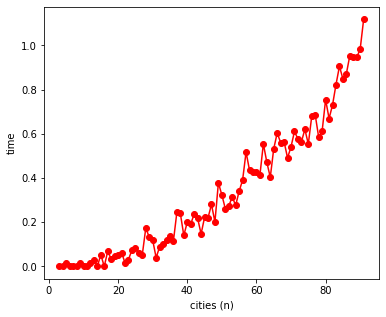

In [7]:
# Determine size of the graph
plt.rcParams["figure.figsize"] = (6,5)
# Plot data
plt.plot(pnts_n, pnts_t, 'ro-')
# Label x and y axis
plt.ylabel('time')
plt.xlabel('cities (n)')
# show graph
plt.show()

References:

Graph Generation
https://gist.github.com/RobertTalbert/9f0879e5ed4b4297fc5f

Tabu Search Algorithm/GraphData
https://github.com/polatbilek/Tabu-search-on-Travelling-Salesman-Problem/blob/master/tabu_search.py 
